# Part 1.5 | Bivariate Relationships

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## GDP and Coffee Production

#### Data

In [20]:
beans = pd.read_csv('data/Coffee_Bean_Production.csv')
beans = beans.drop(columns=['Entity'])

gdp = pd.read_csv('data/GDP.csv')
gdp = gdp.rename(columns={'GDP (output, multiple price benchmarks)': 'GDP'})

data = pd.merge(beans, gdp, on=['Code', 'Year'], how='inner')
data['GDP'] = data['GDP']/1_000_000_000_000
data['coffe_prod'] = data['coffe_prod']/1000000
data = data[data.Entity != 'World']
data = data[data.coffe_prod > 0.01]
data = data[data.GDP < 9]
data.to_csv('data/Beans_GDP.csv')

subdata = data[data['Year'] == 2019]
subdata.to_csv('data/Beans_GDP_2019.csv')

#### Figures

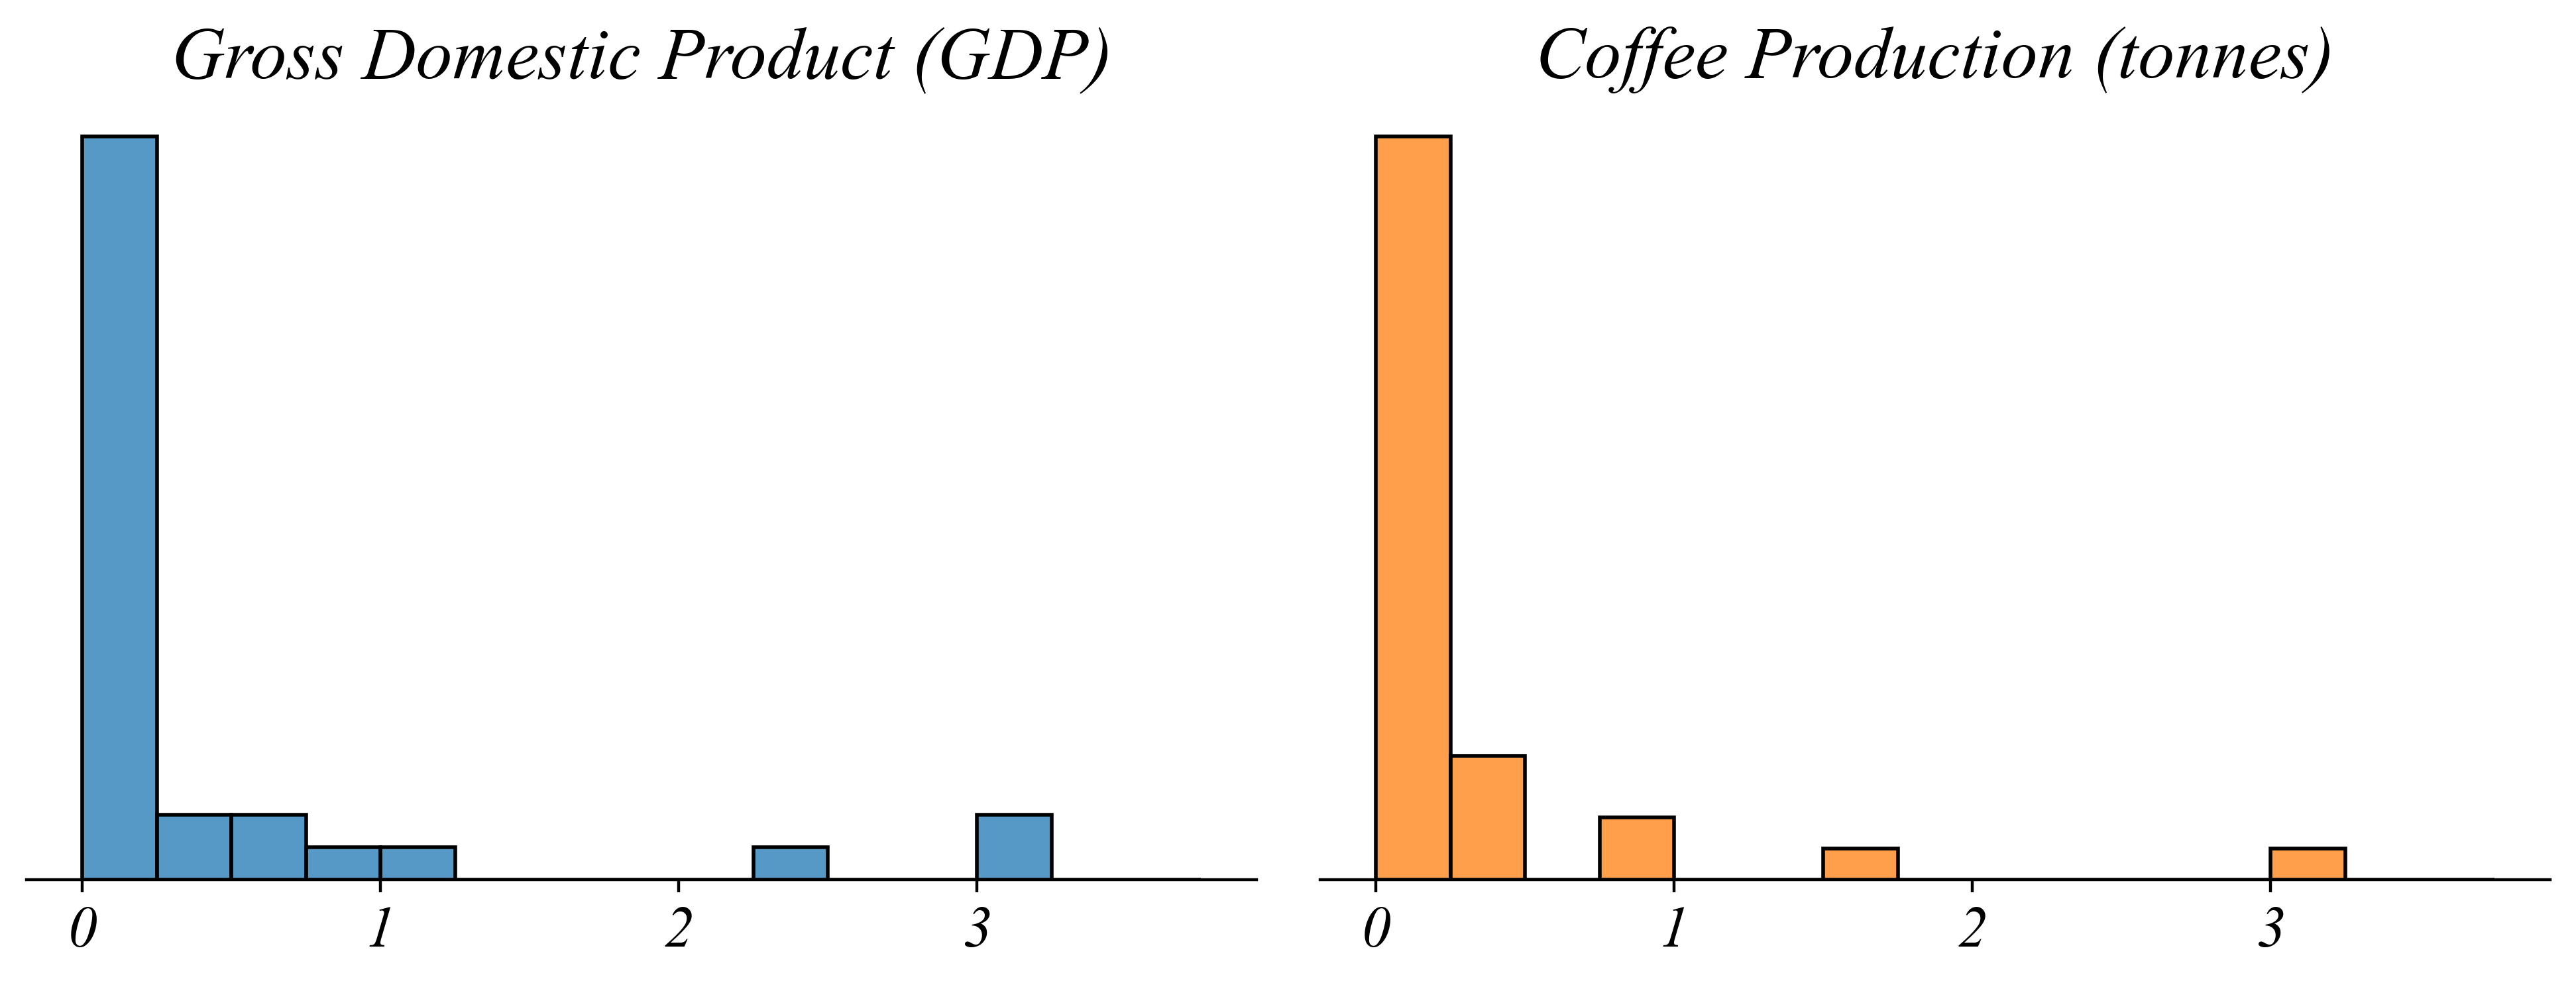

In [4]:
import numpy as np

# Load Dataset
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
bins = np.arange(0, 4, 1/4)

# Figure and Styling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data, x='GDP', bins=bins, color='C0', ax=ax1)
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_title('Gross Domestic Product (GDP)')
sns.despine(ax=ax1, left=True)

sns.histplot(data, x='coffe_prod', bins=bins, color='C1', ax=ax2)
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.set_title('Coffee Production (tonnes)')
sns.despine(ax=ax2, left=True)

plt.tight_layout()

# Save Figure
plt.savefig('i/c_01.png')

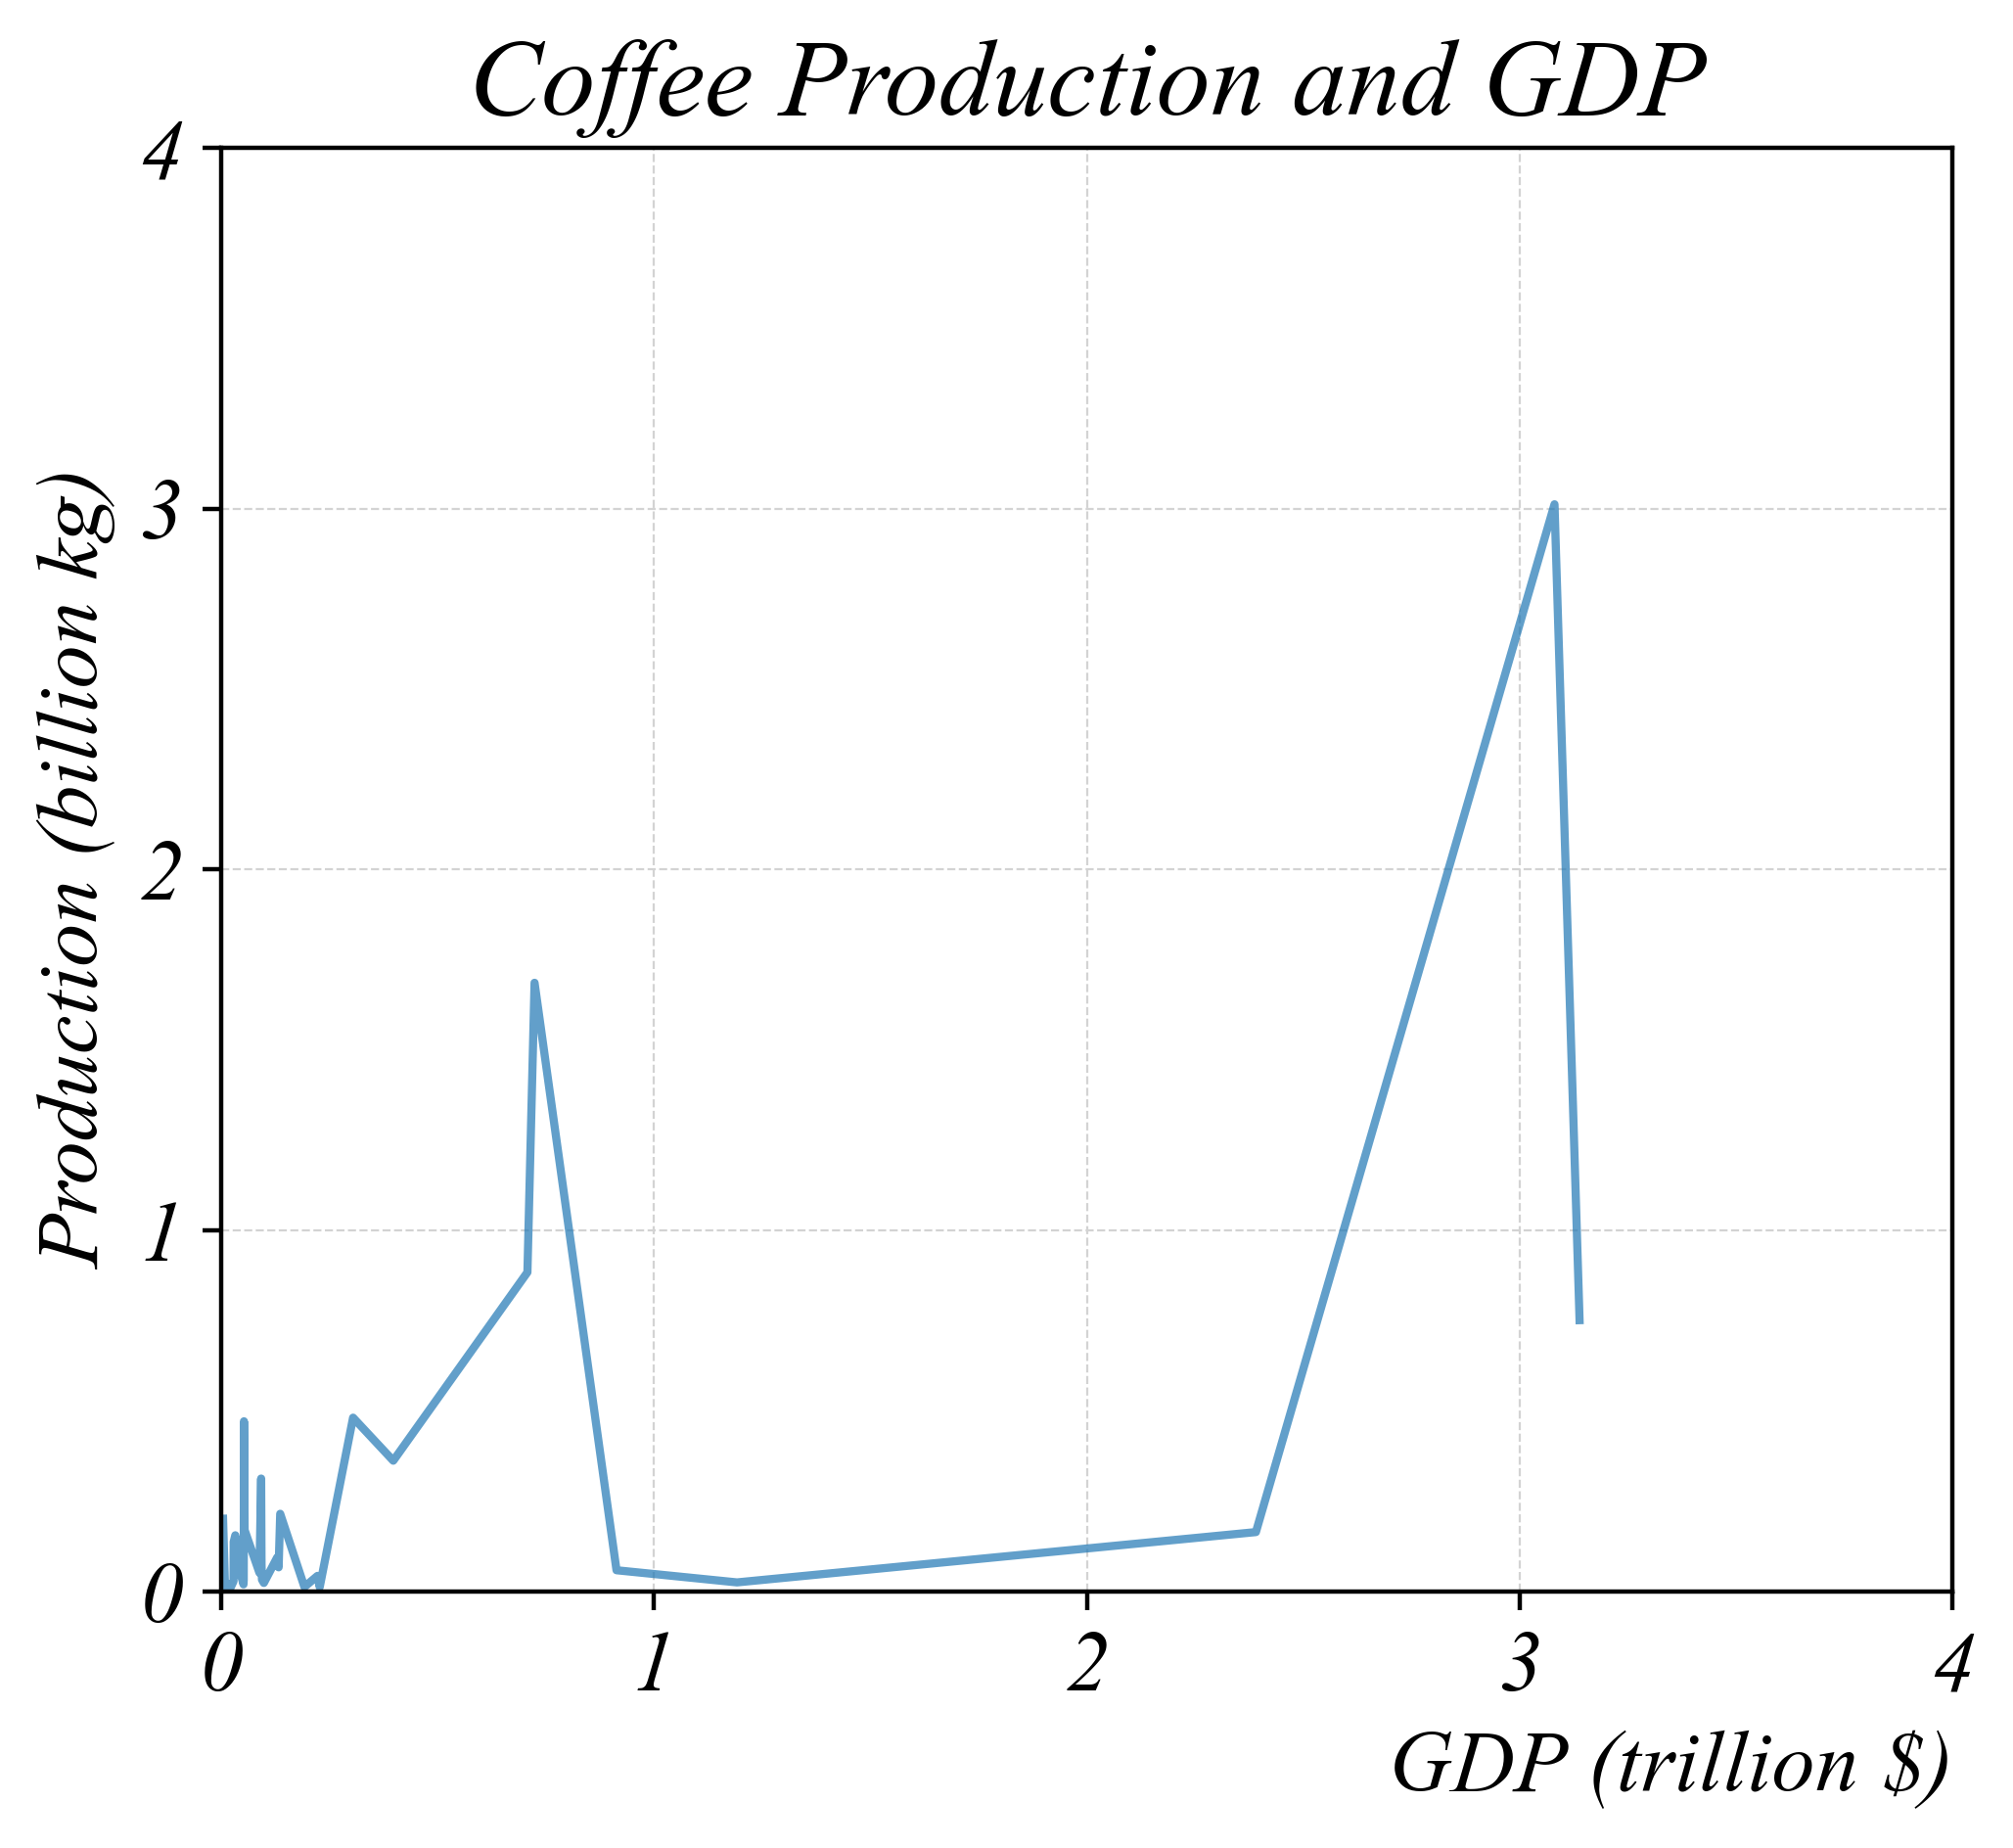

In [2]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.lineplot(data, x='GDP', y='coffe_prod', alpha=0.7)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_02.png')

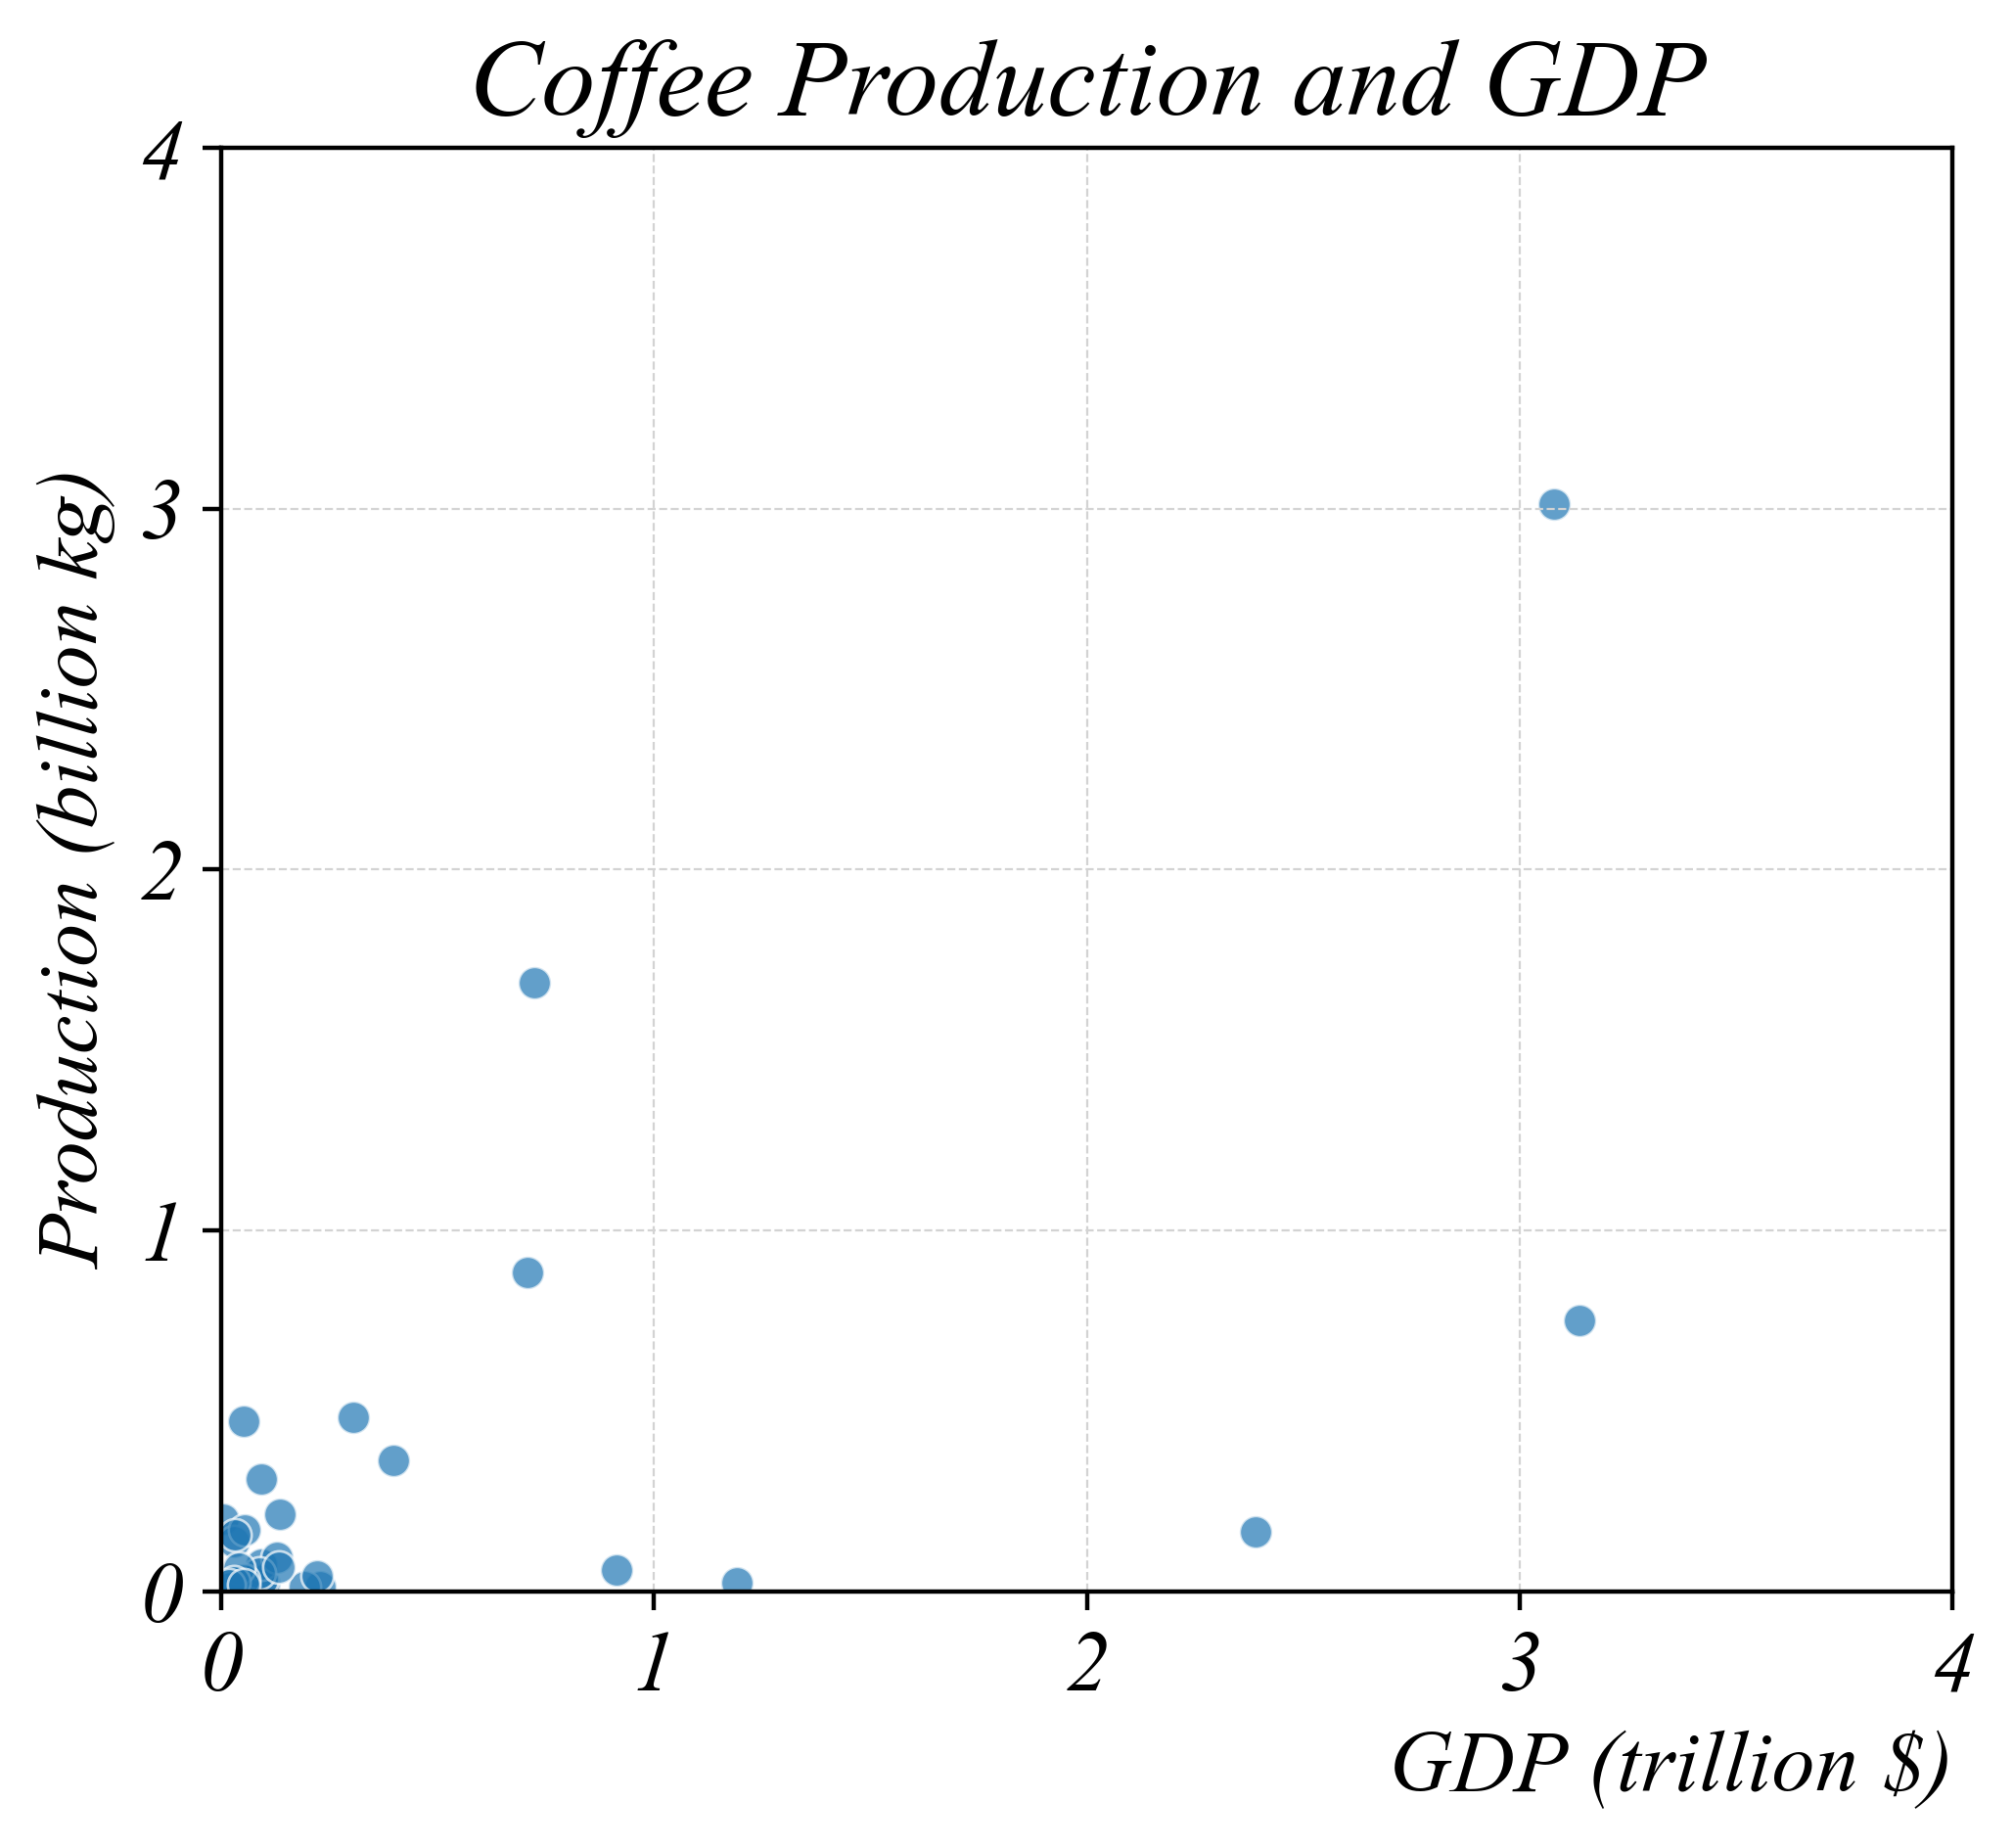

In [3]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', alpha=0.7)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_03.png')

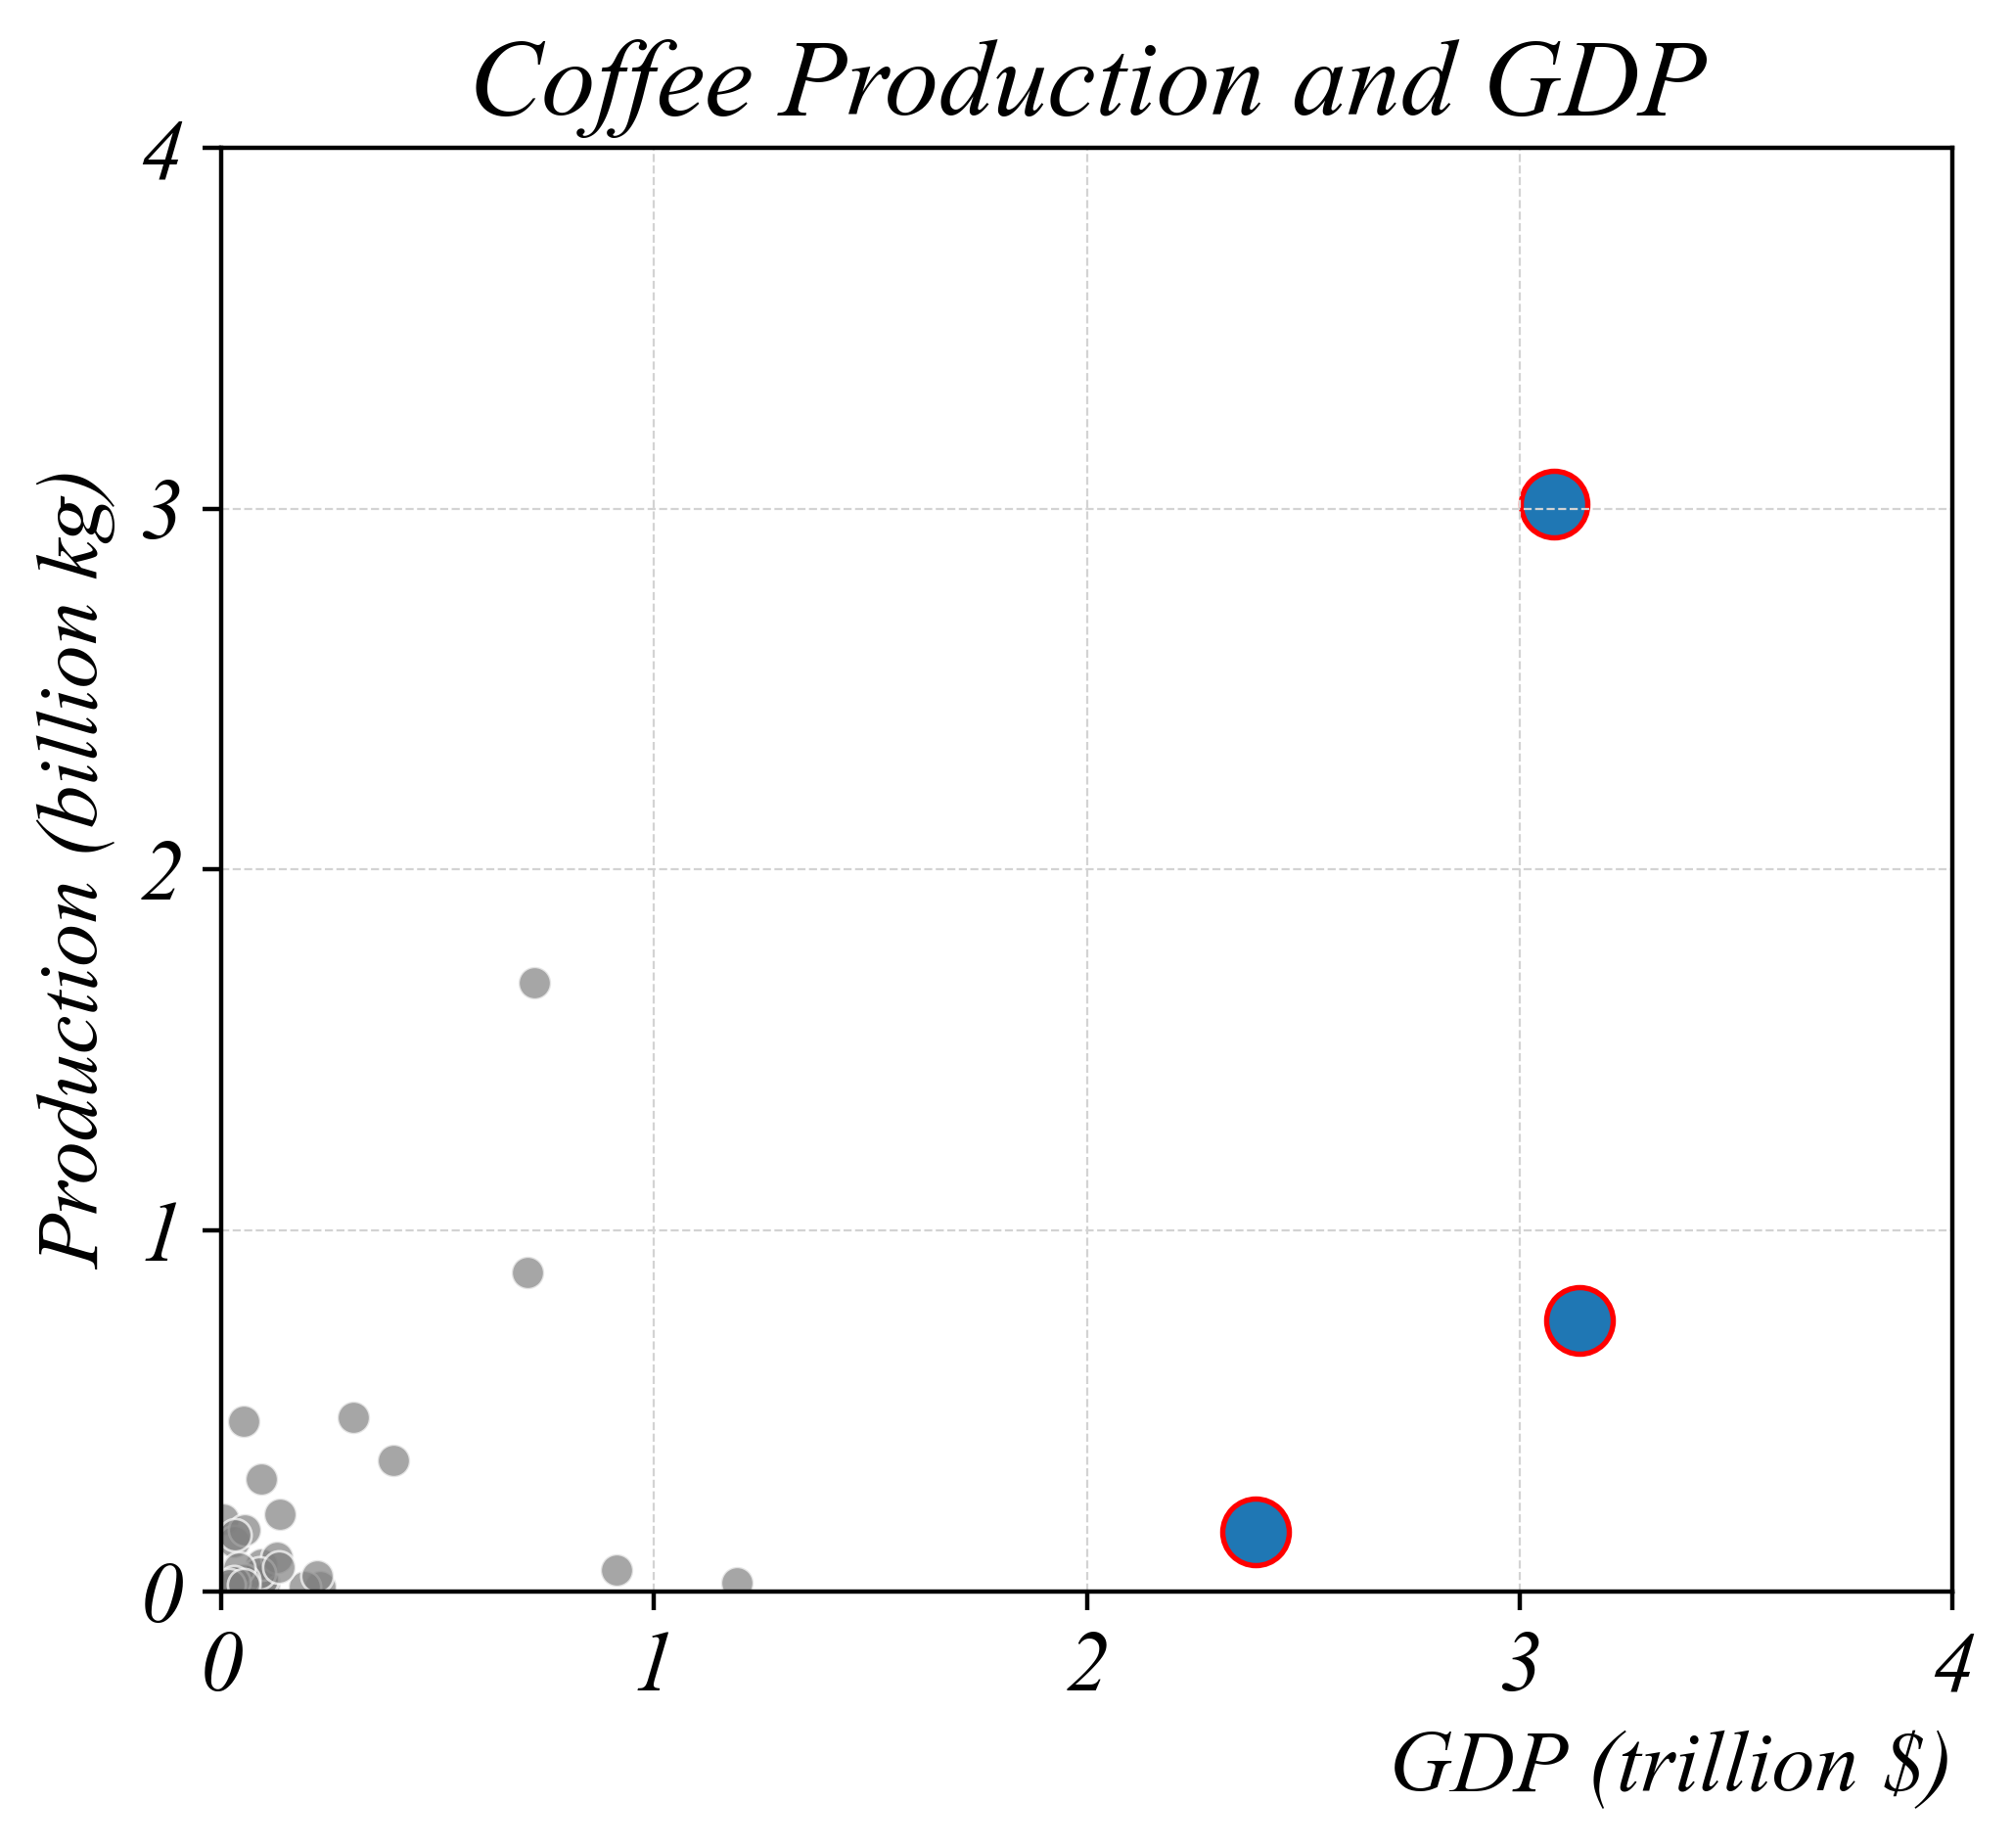

In [4]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
high_gdp = data[data.GDP > 2]
ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', color='grey', alpha=0.7)
sns.scatterplot(high_gdp, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_04.png')

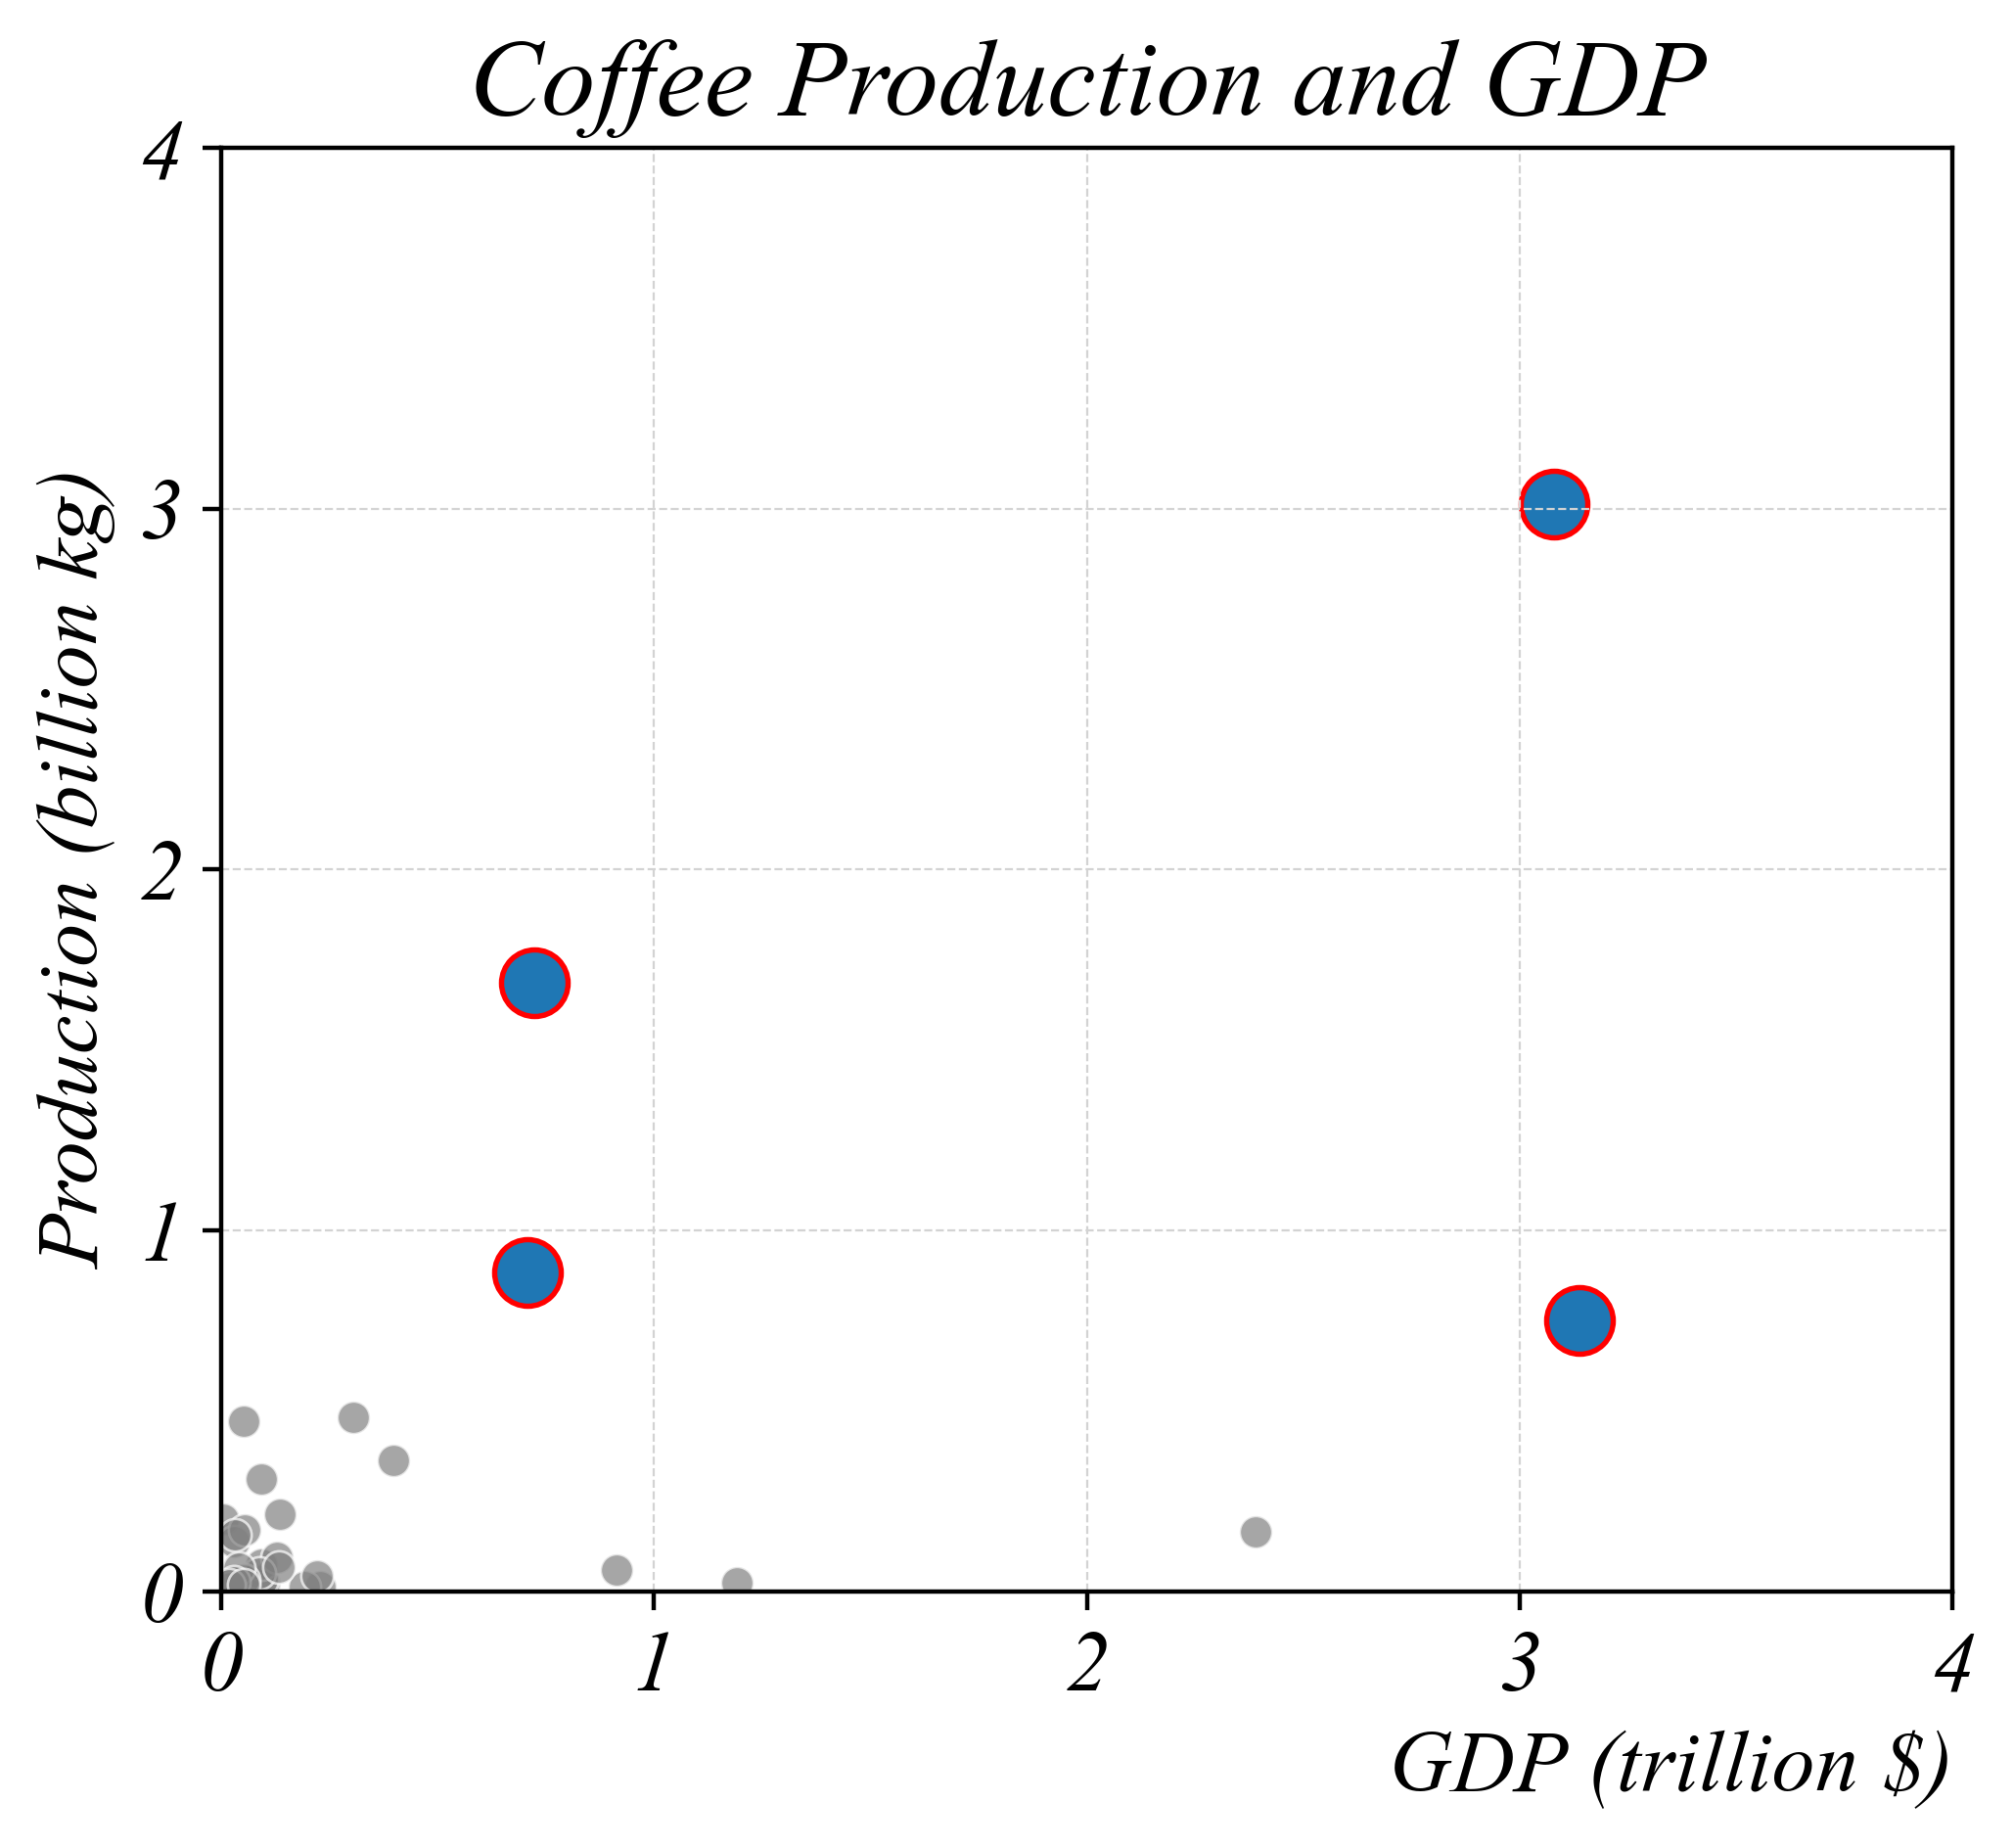

In [5]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
high_production = data[data.coffe_prod > 0.5]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', color='grey', alpha=0.7)
sns.scatterplot(high_production, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_05.png')

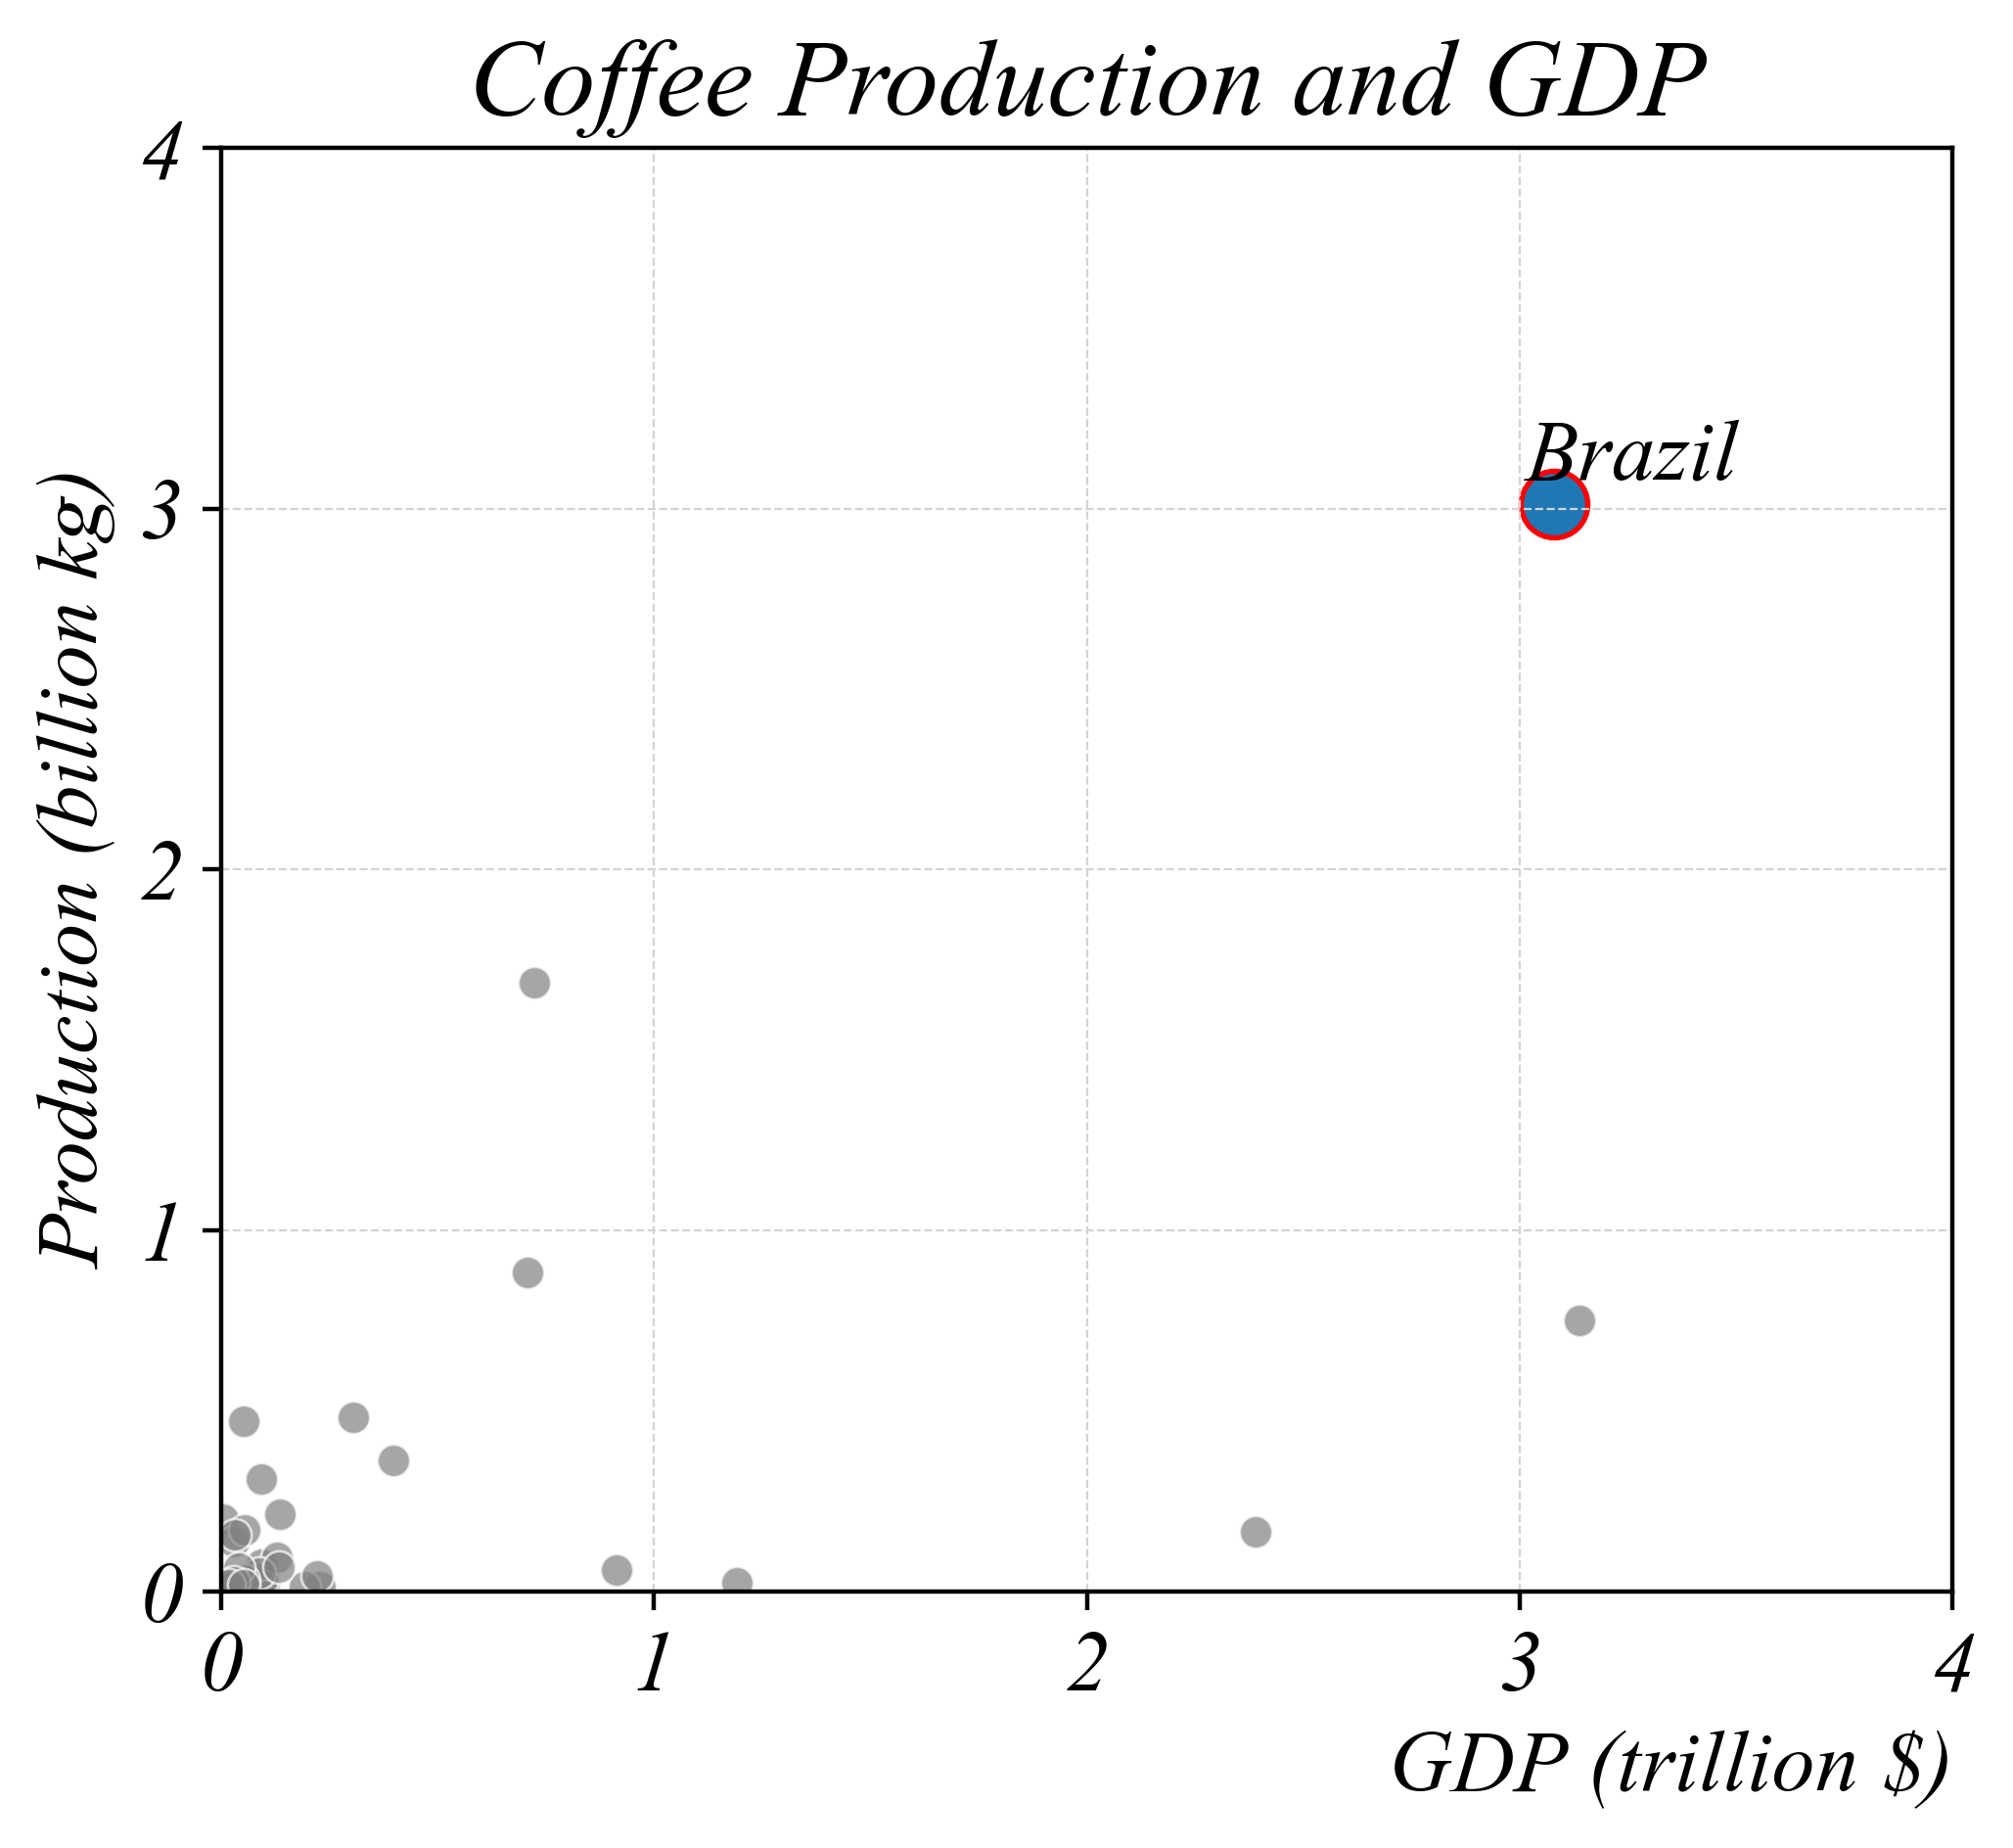

In [6]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
brazil = data[data.coffe_prod == data.coffe_prod.max()]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', color='grey', alpha=0.7)
sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_06.png')

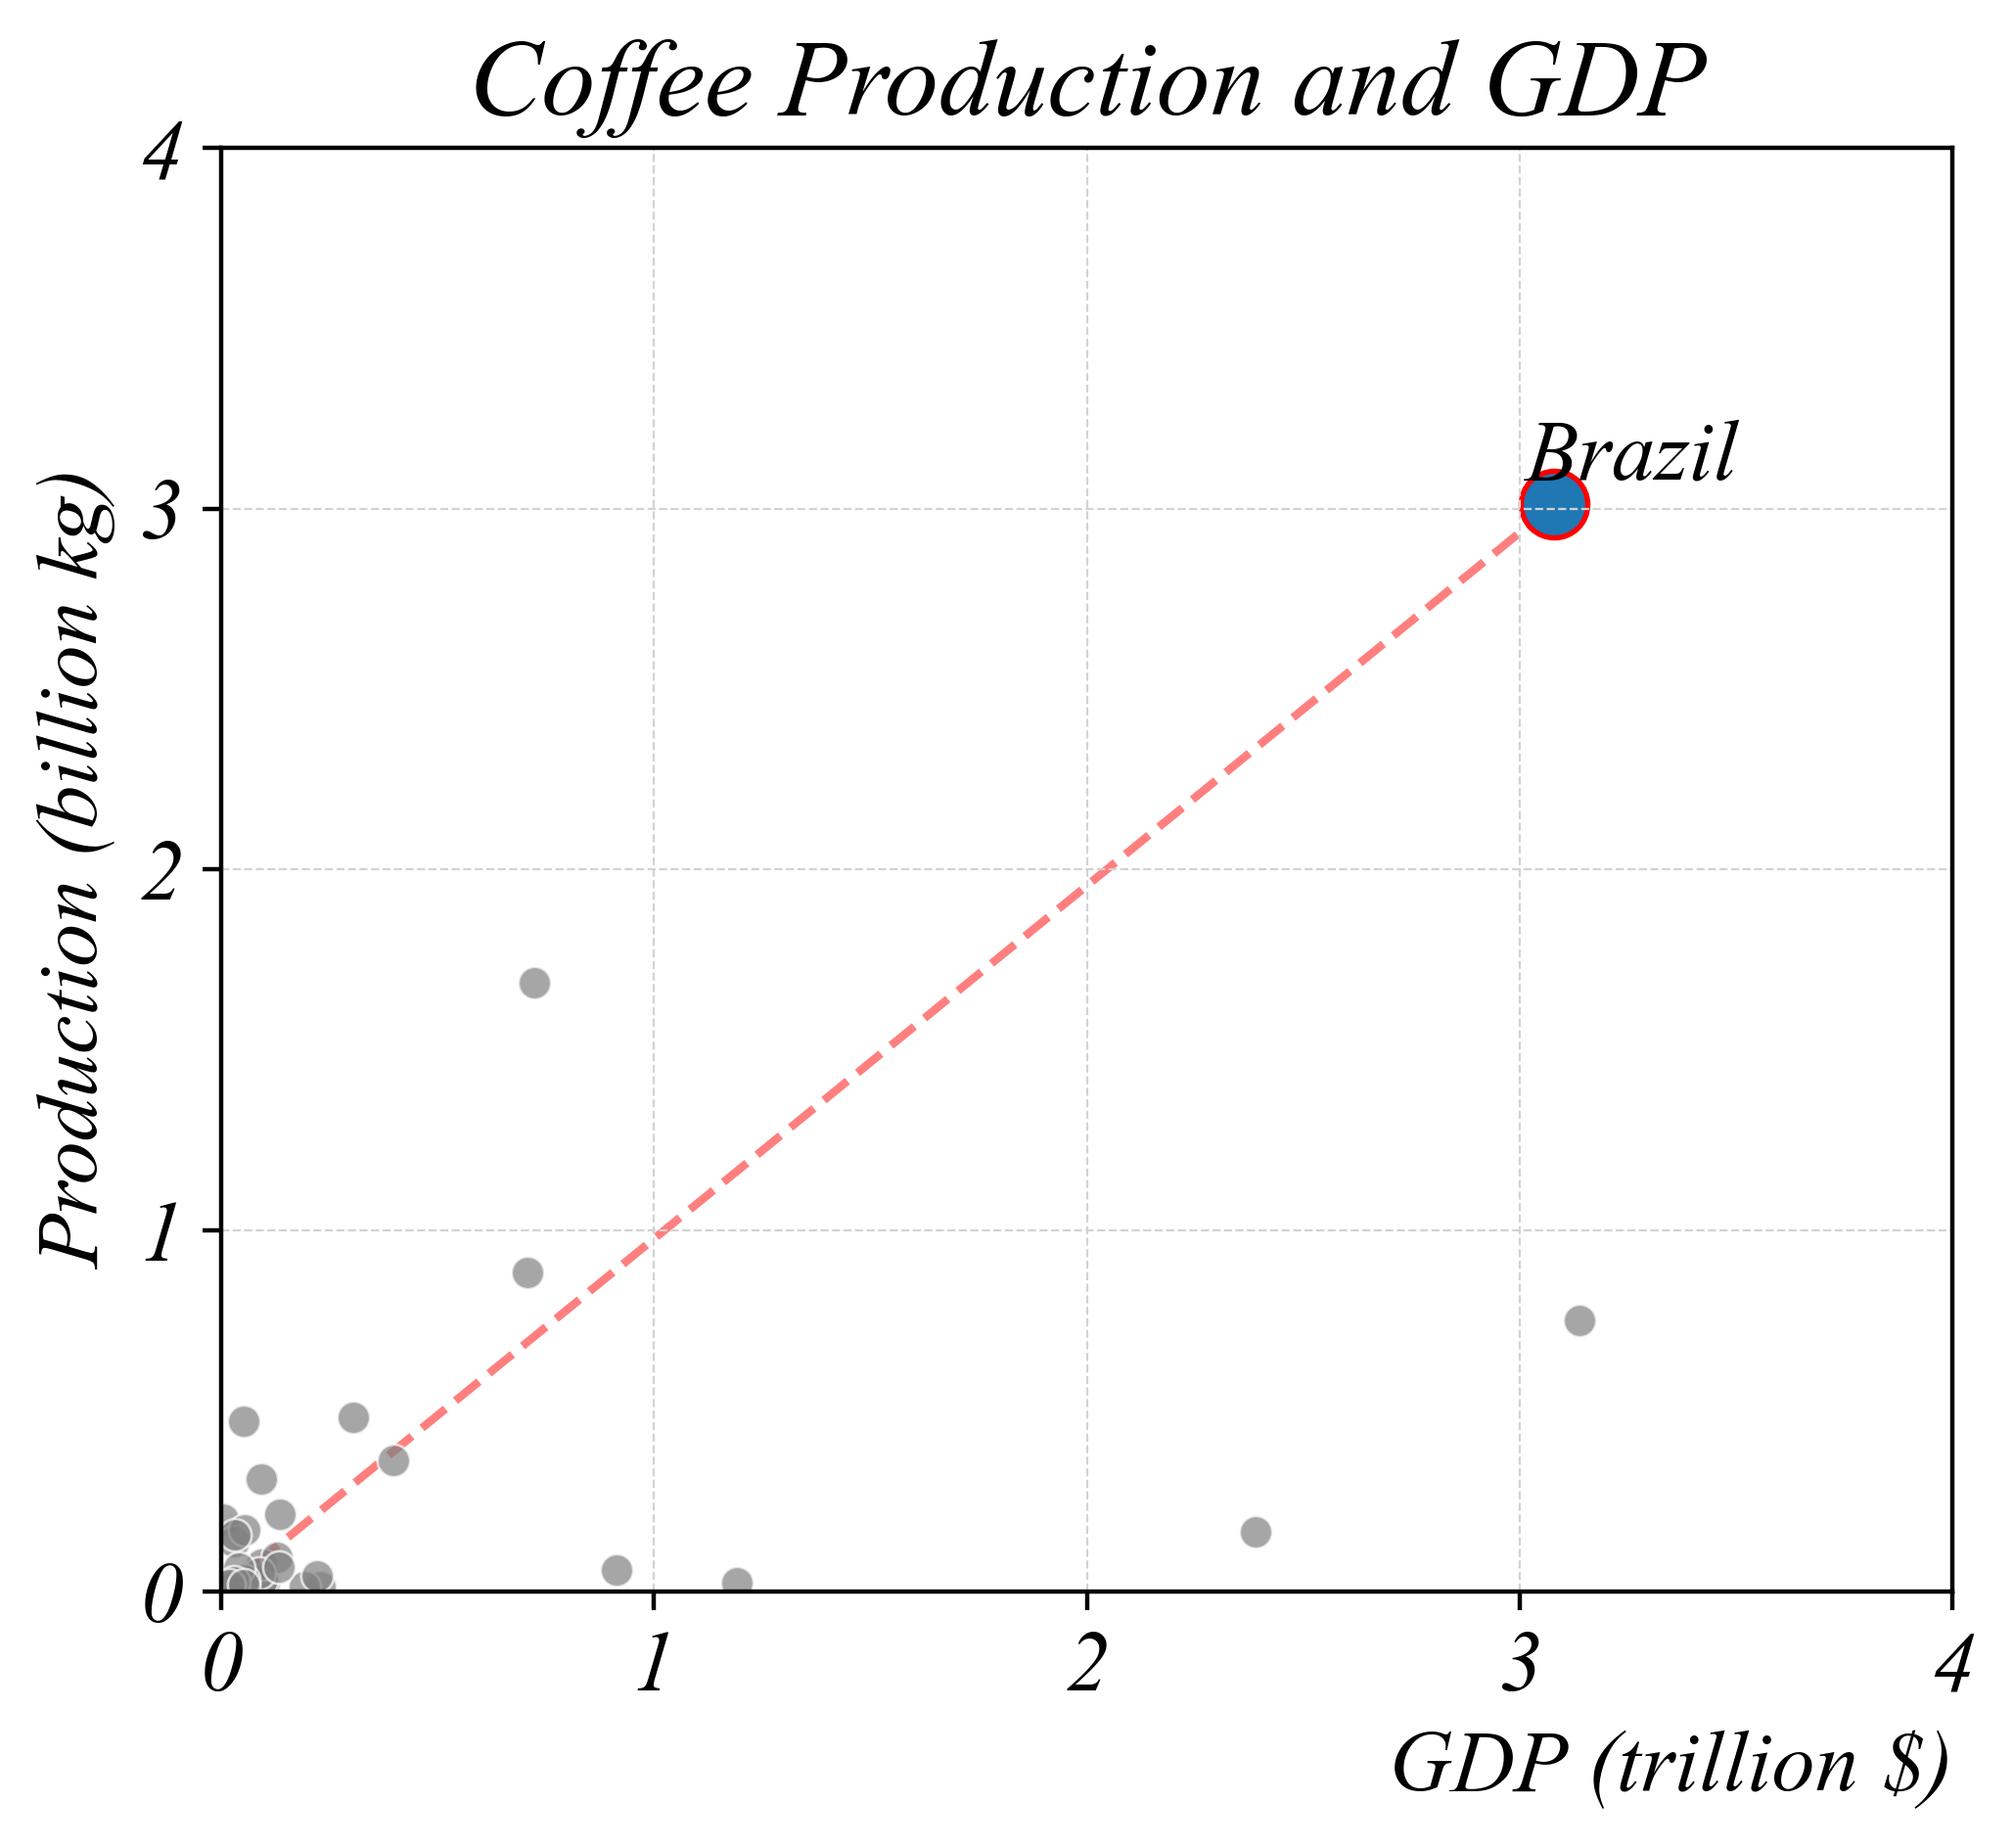

In [8]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
brazil = data[data.coffe_prod == data.coffe_prod.max()]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='GDP', y='coffe_prod', color='grey', alpha=0.7)
sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_07.png')

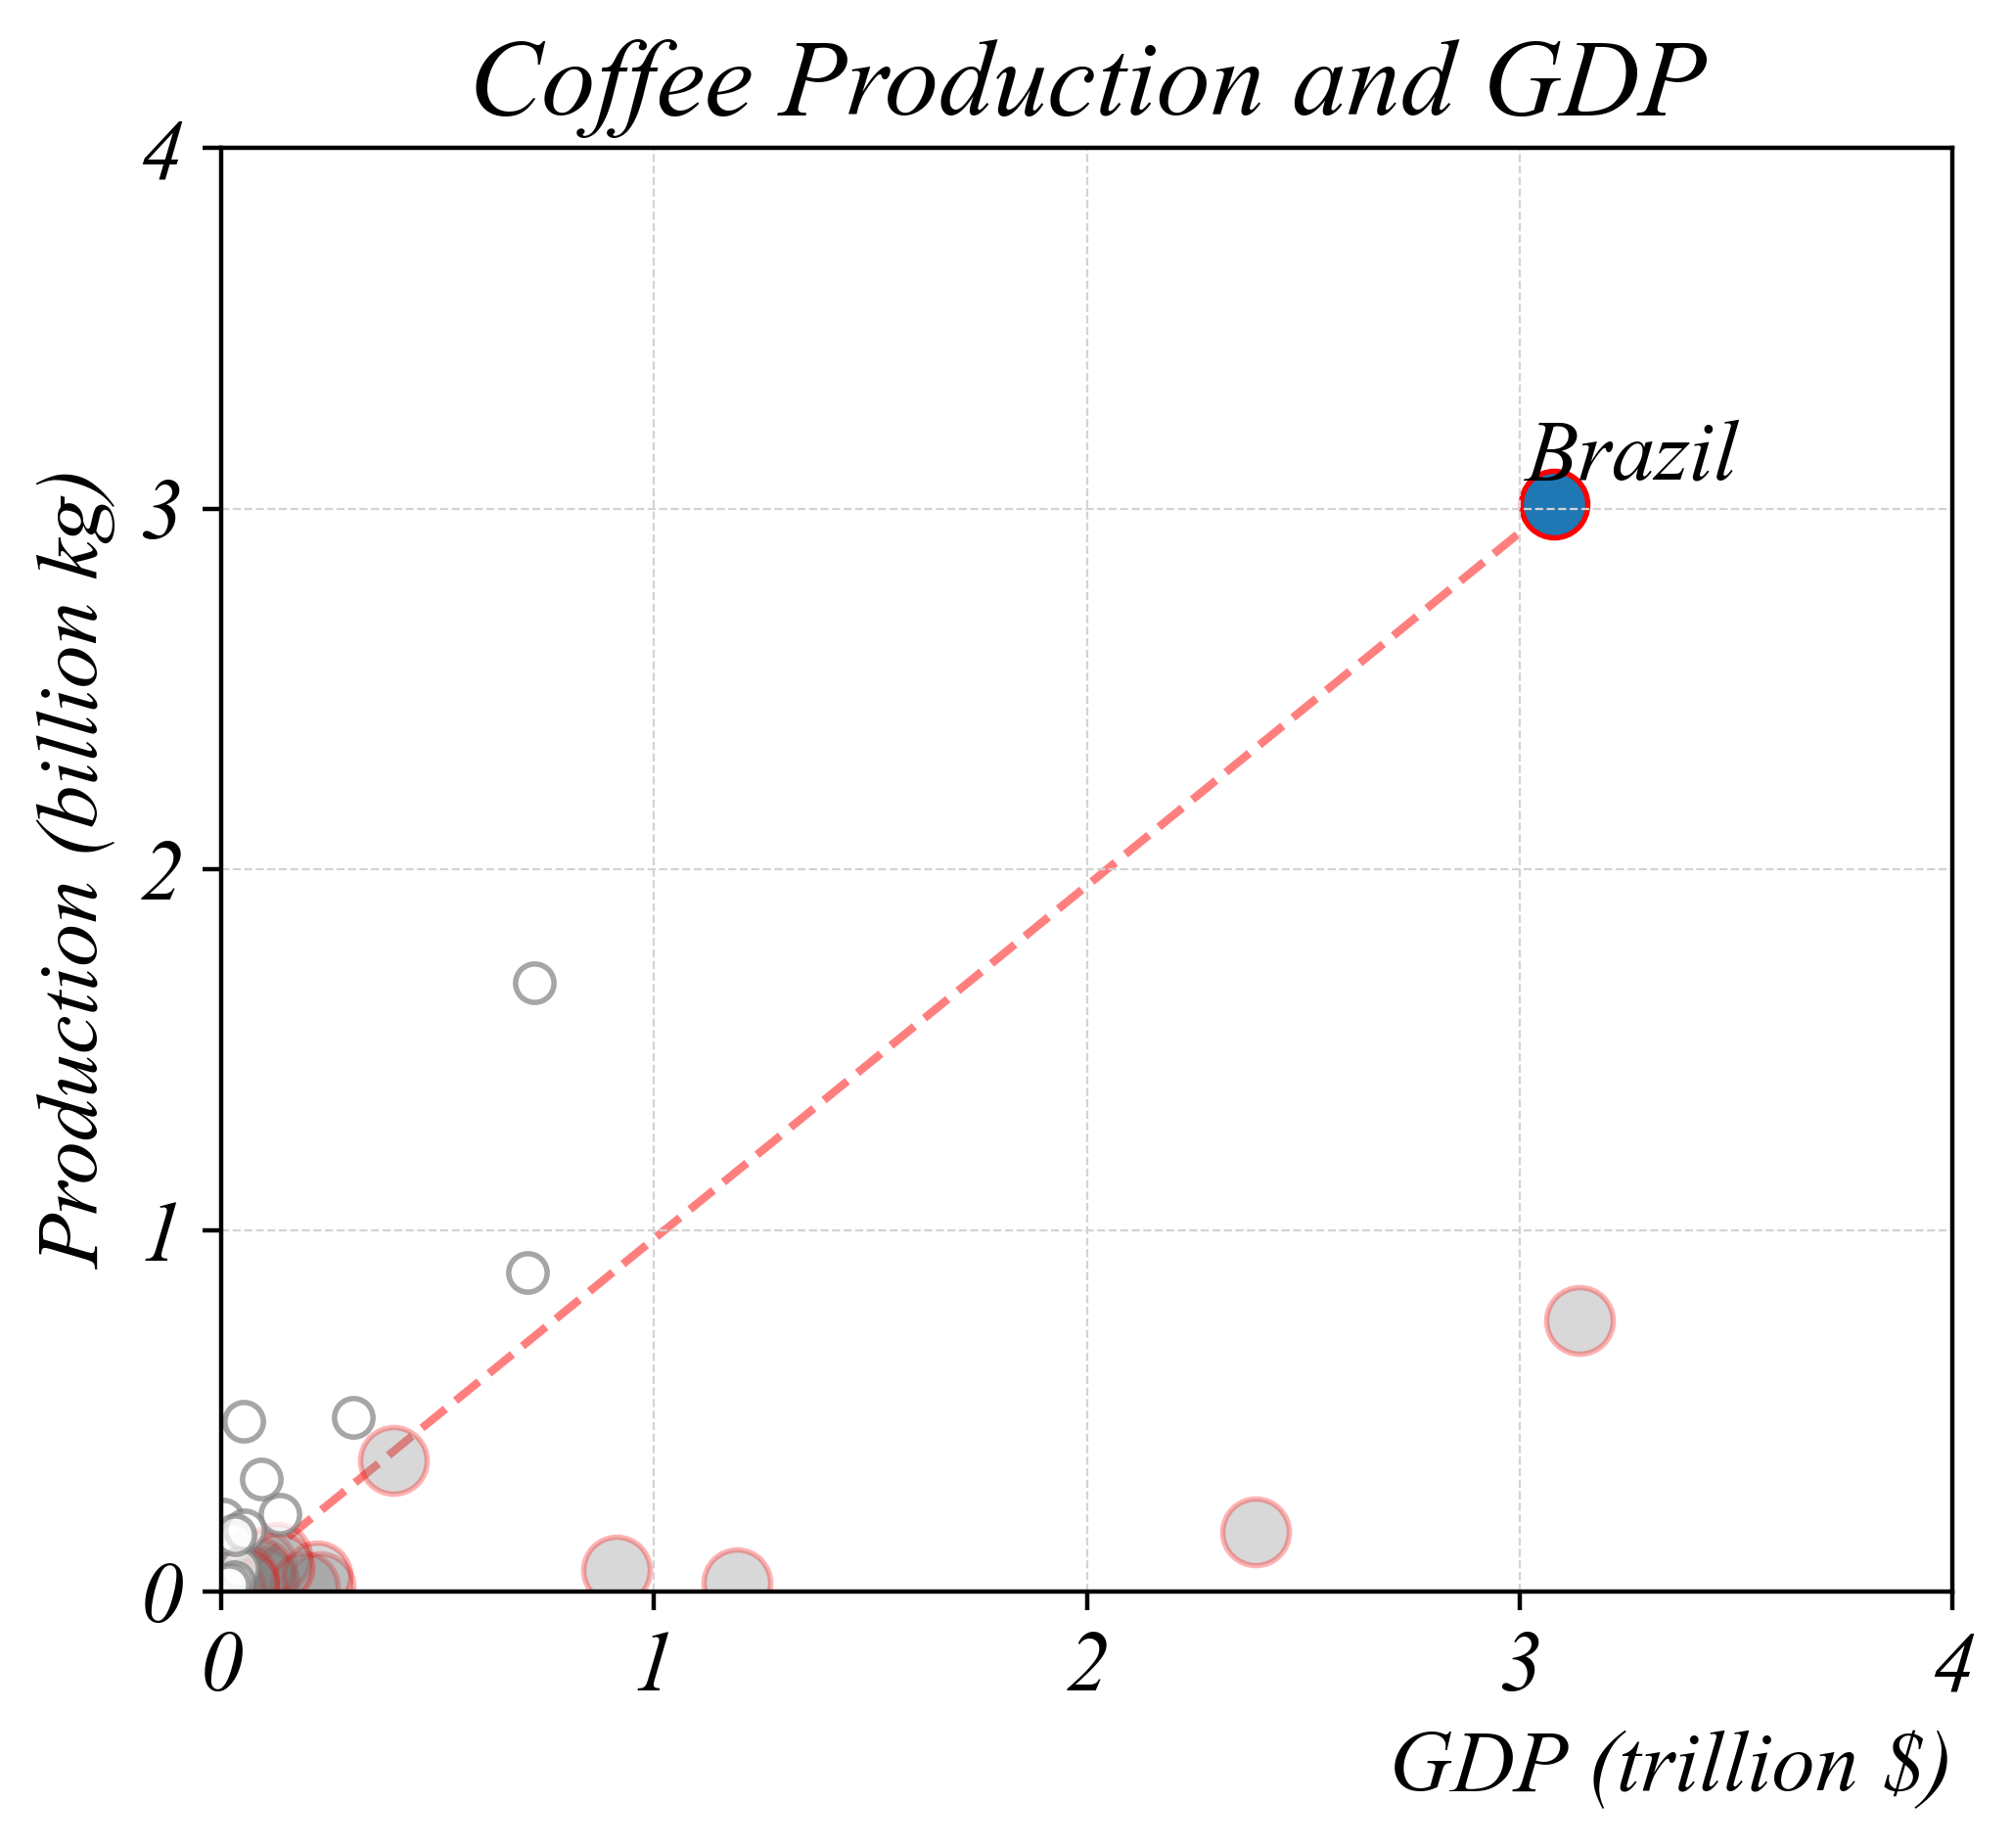

In [11]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='white', edgecolors='grey', alpha=0.7, s=50)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_08.png')

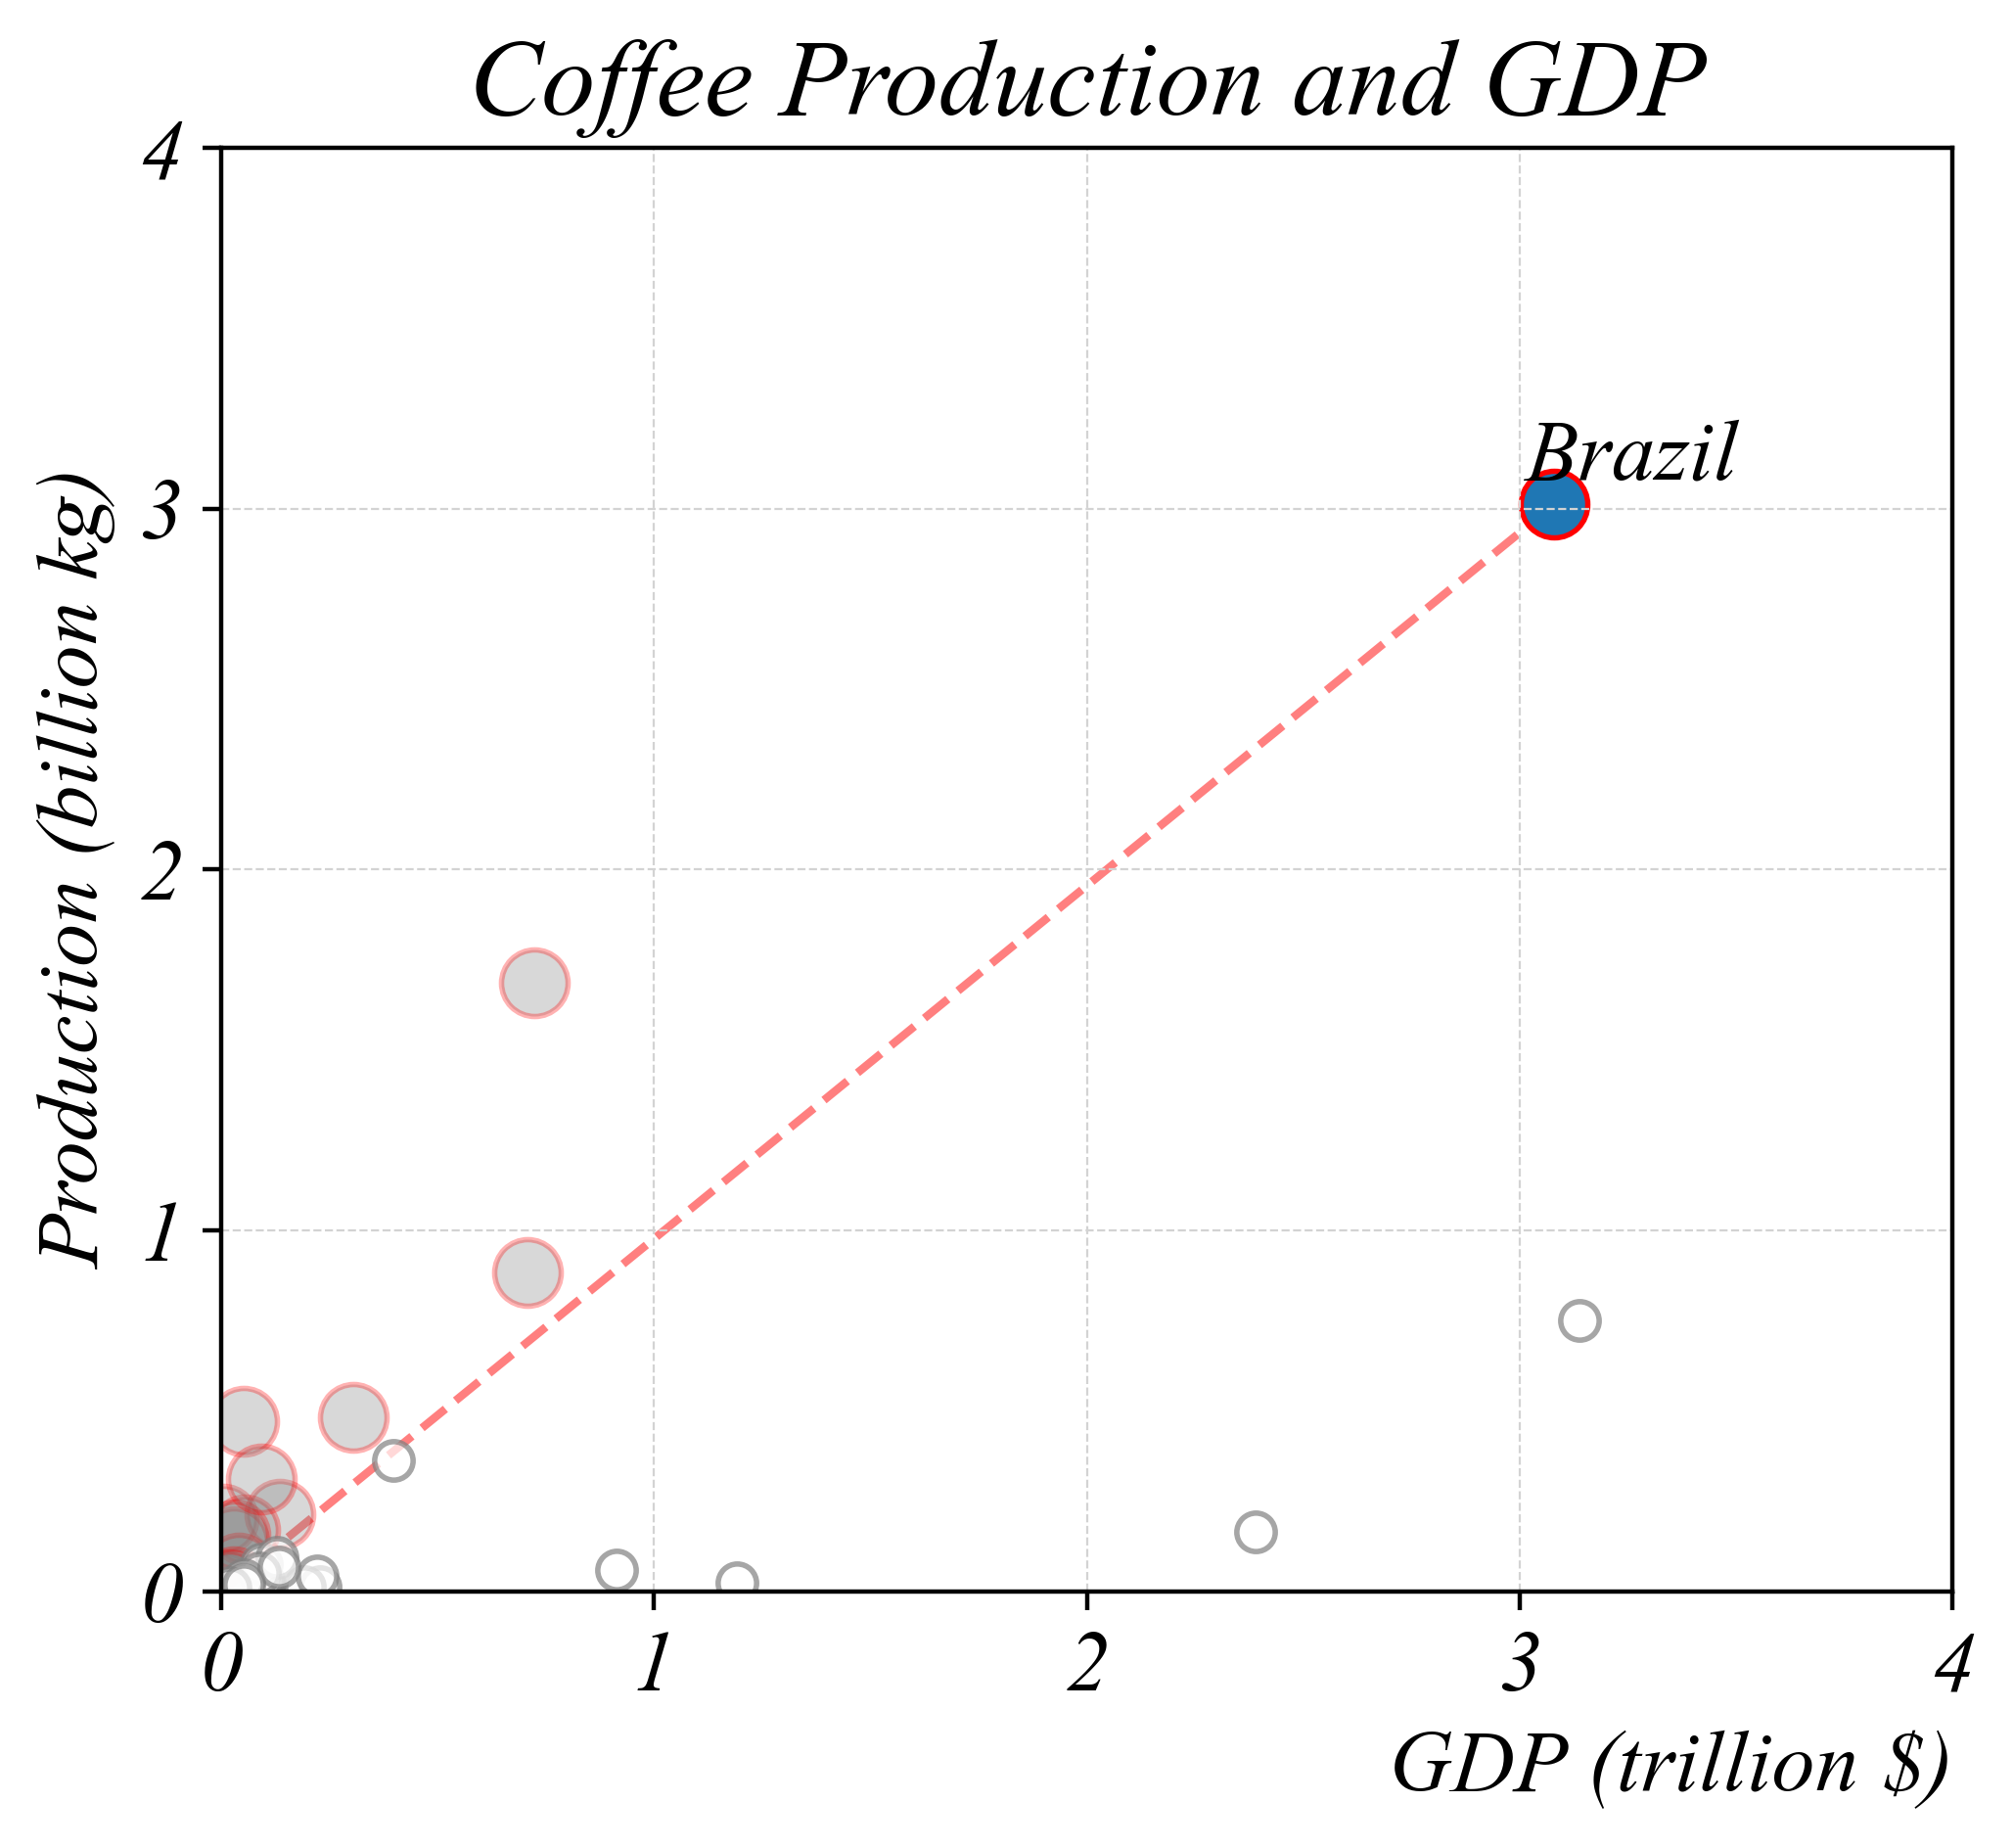

In [12]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='white', edgecolors='grey', alpha=0.7, s=50)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_09.png')

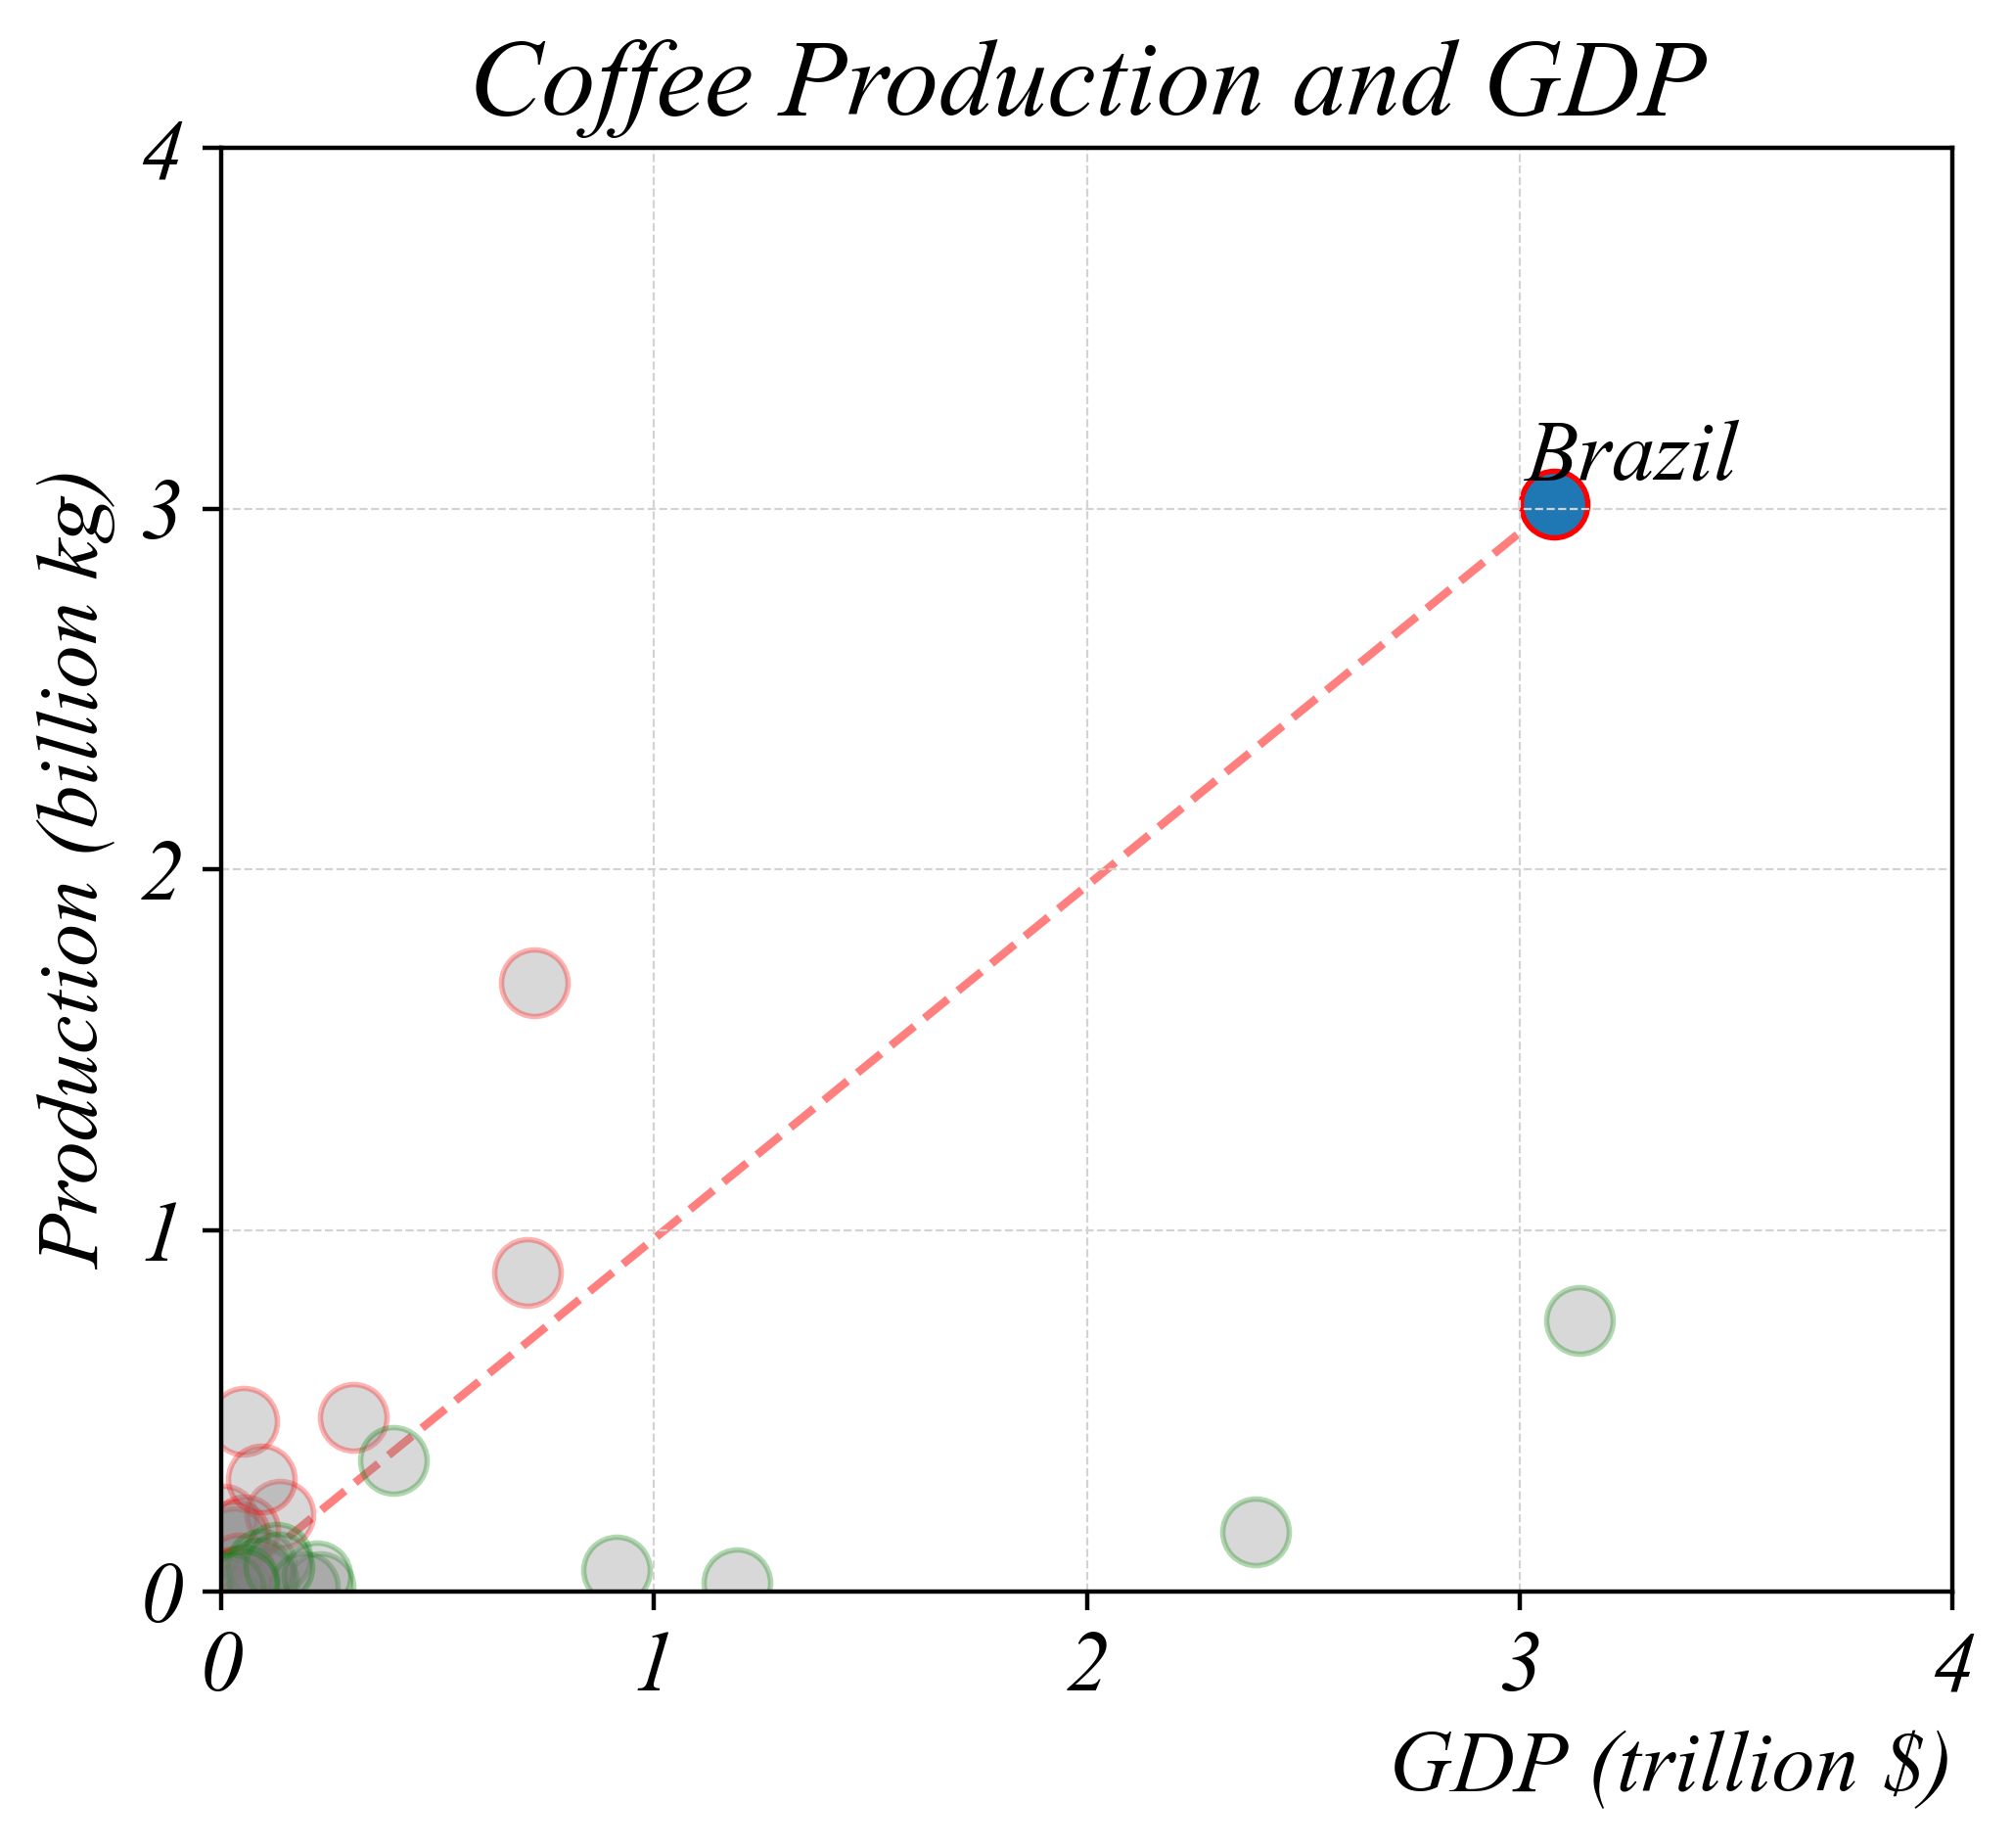

In [5]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['brazil_ratio'] = data['GDP']/data['coffe_prod']

brazil = data[data.coffe_prod == data.coffe_prod.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.coffe_prod.values[0]

greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(brazil, x='GDP', y='coffe_prod', edgecolors='red', alpha=1, s=150)
plt.scatter(lower['GDP'], lower['coffe_prod'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(greater['GDP'], greater['coffe_prod'], color='grey', edgecolors='green', alpha=0.3, s=150)

# Annotation
plt.annotate('Brazil',(brazil.coffe_prod.values[0], brazil.GDP.values[0]))
plt.plot([0,brazil.GDP.values[0]],[0,brazil.coffe_prod.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_10.png')

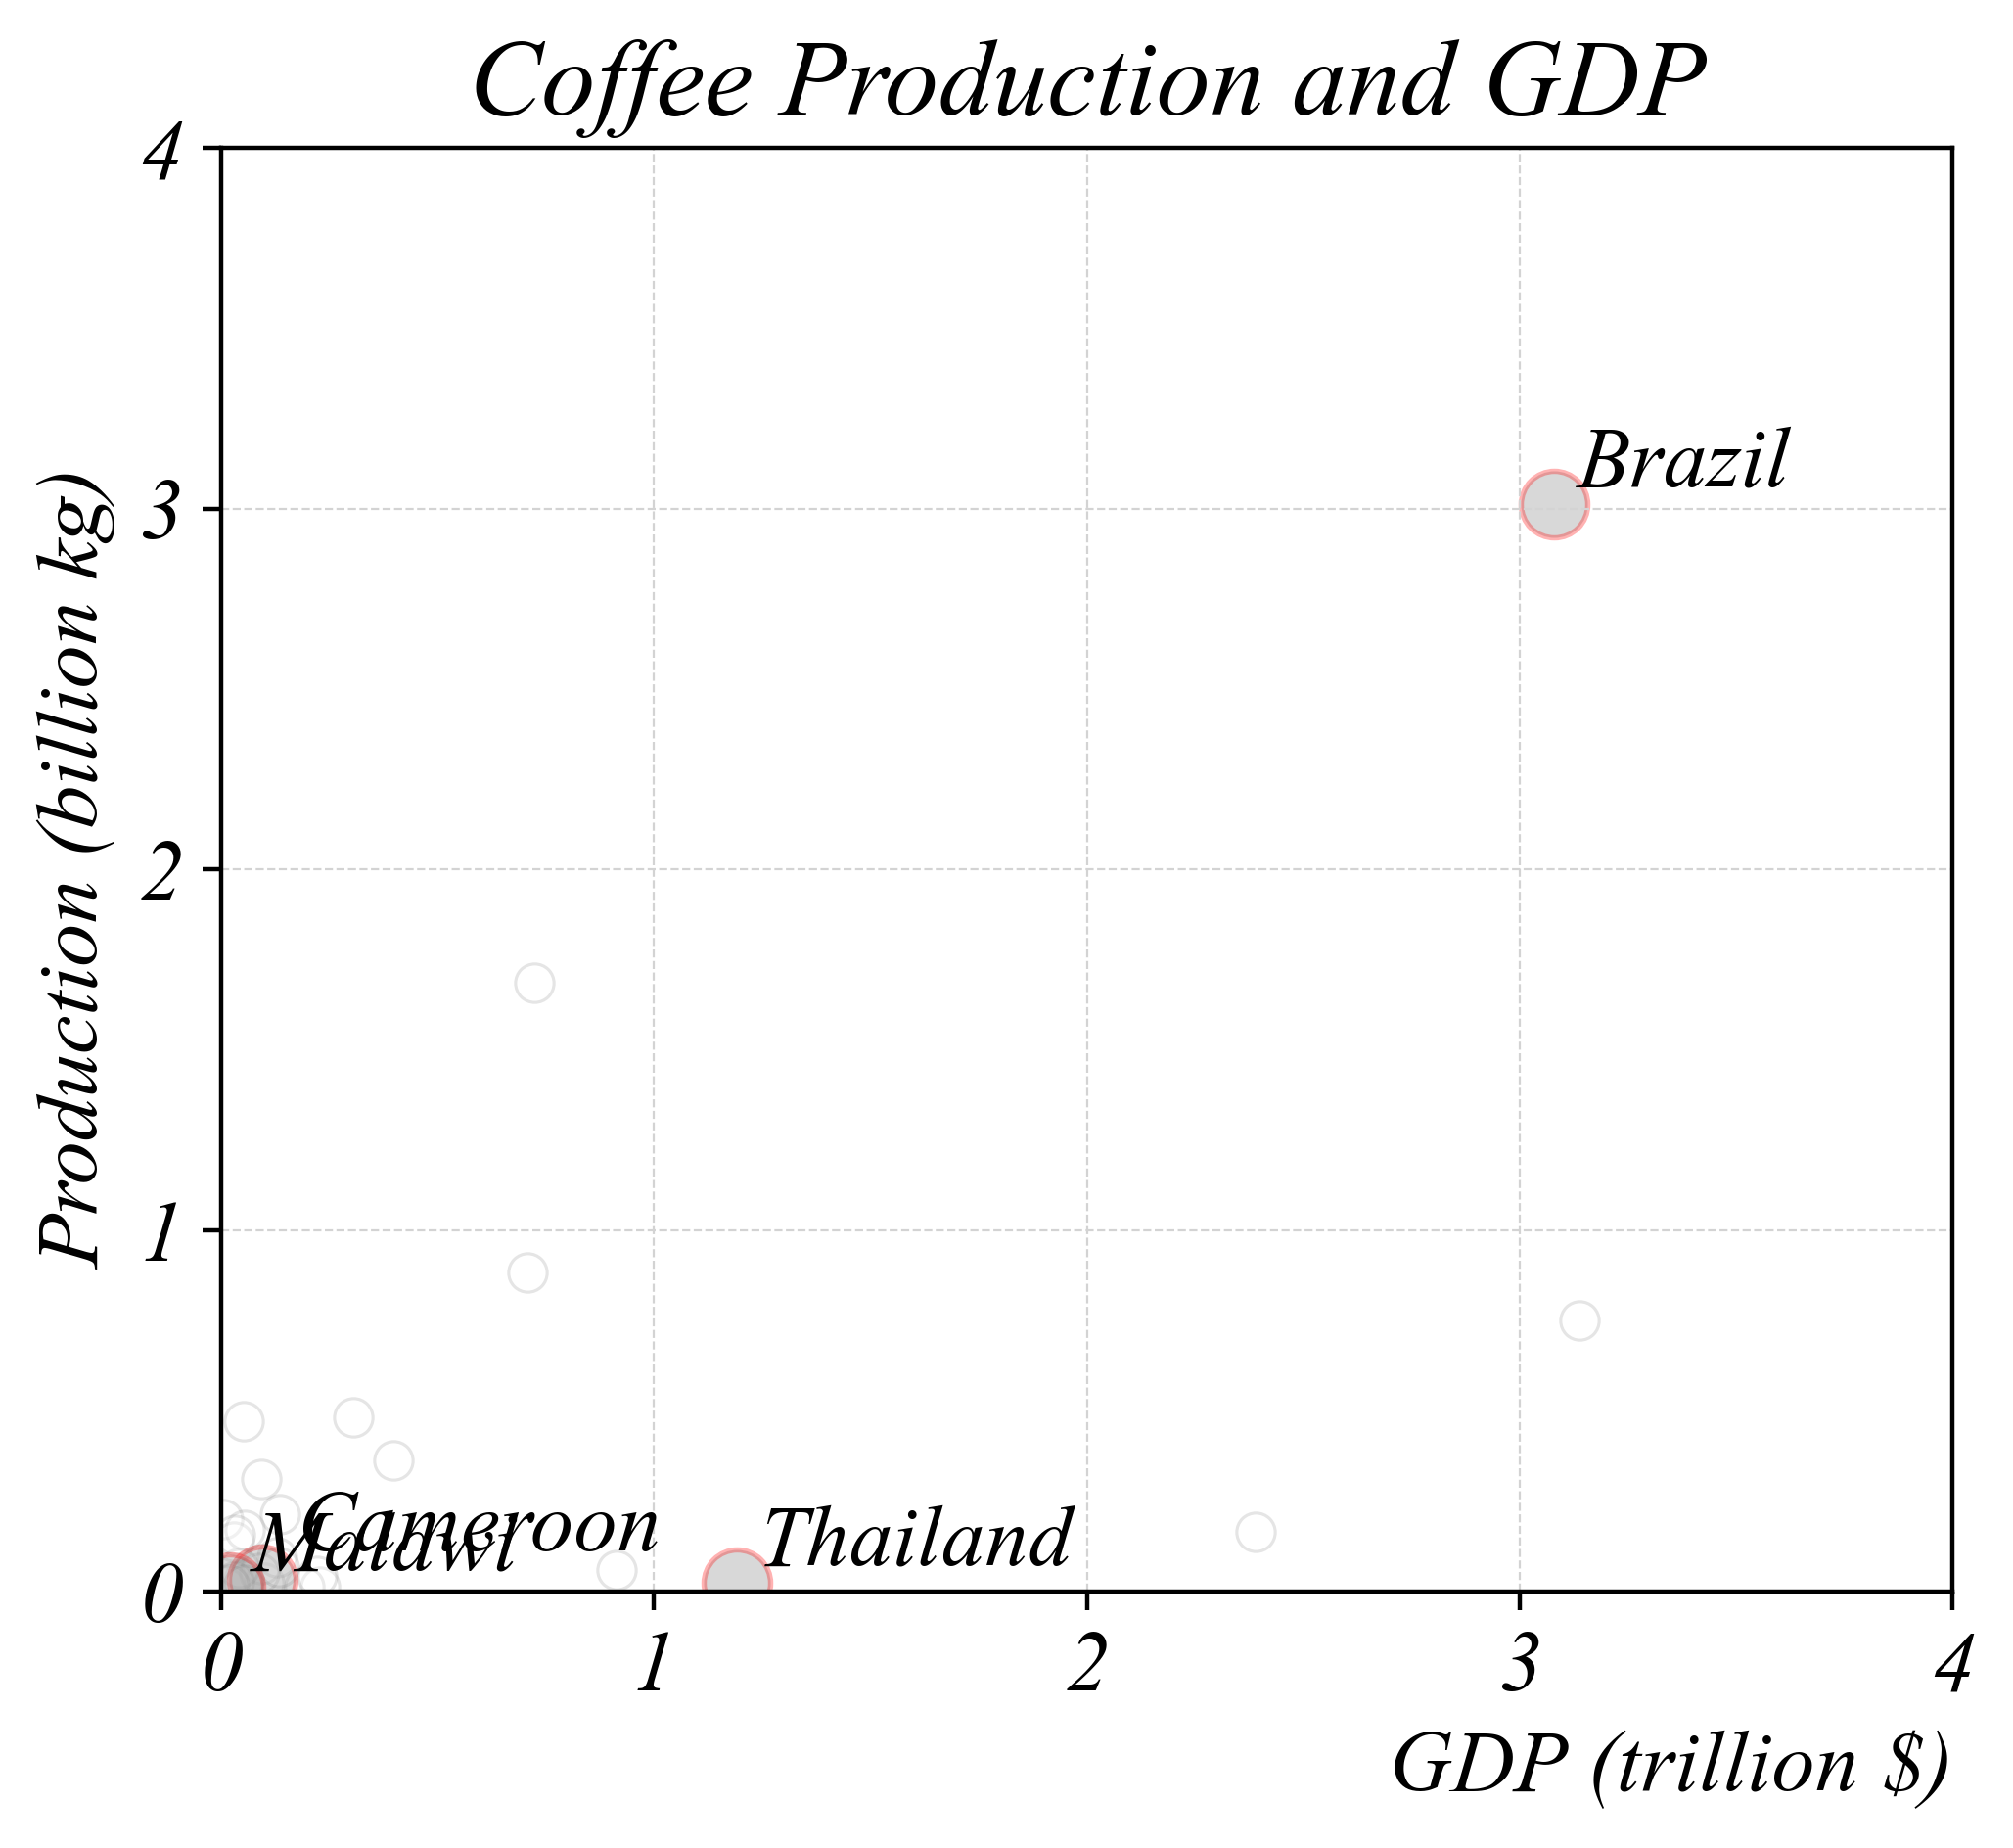

In [14]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]

subset_list = ['BRA', 'THA', 'MWI', 'CMR']
other_data = data[~data.Code.isin(subset_list)]
subset = data[data.Code.isin(subset_list)]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(other_data, x='GDP', y='coffe_prod', color='white', edgecolors='grey', alpha=0.2, s=50)
sns.scatterplot(subset, x='GDP', y='coffe_prod', color='grey', edgecolors='red', alpha=0.3, s=150)

# Annotation
for index, row in subset.iterrows():
    row_gdp = row.GDP
    row_tonnes = row.coffe_prod
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

# Styling
plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks(ticks)
plt.xlim(0,4)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_10.png')

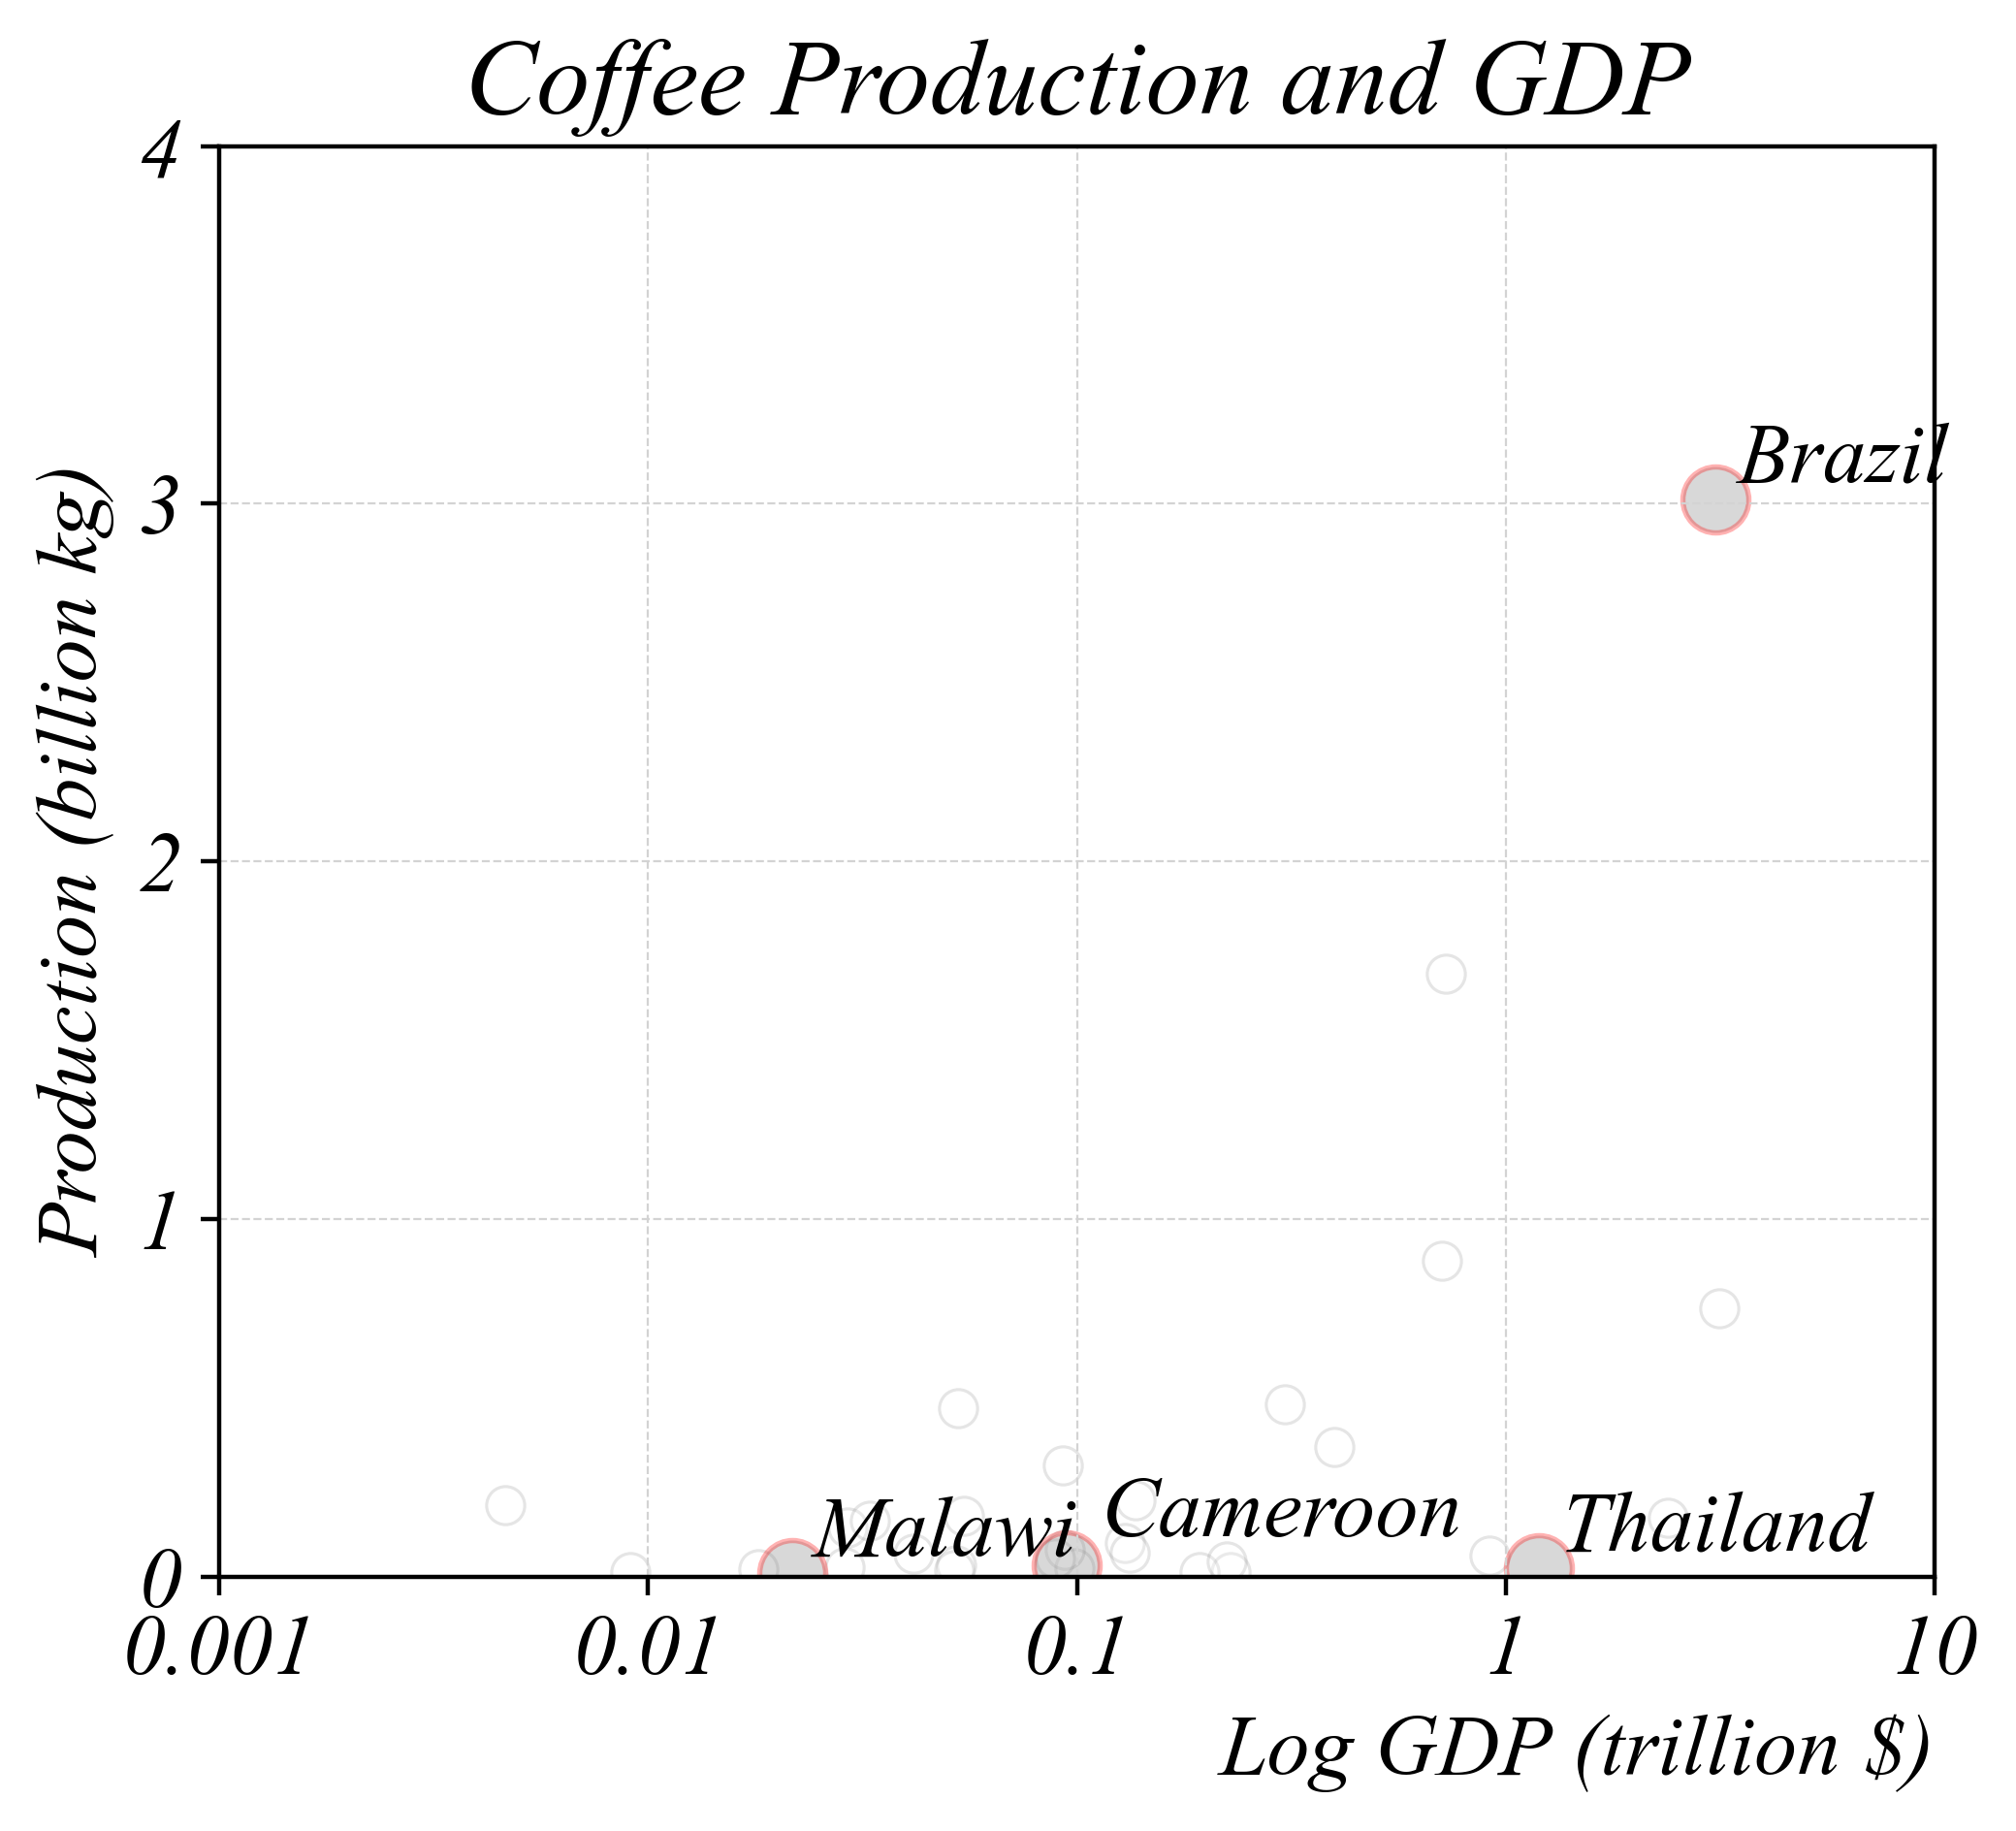

In [15]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)

subset_list = ['BRA', 'THA', 'MWI', 'CMR']
other_data = data[~data.Code.isin(subset_list)]
subset = data[data.Code.isin(subset_list)]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(other_data, x='log10_GDP', y='coffe_prod', color='white', edgecolors='grey', alpha=0.2, s=50)
sns.scatterplot(subset, x='log10_GDP', y='coffe_prod', color='grey', edgecolors='red', alpha=0.3, s=150)

# Annotation
for index, row in subset.iterrows():
    row_gdp = row.log10_GDP
    row_tonnes = row.coffe_prod
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Production (billion kg)')
plt.yticks(ticks)
plt.ylim(0,4)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_11.png')

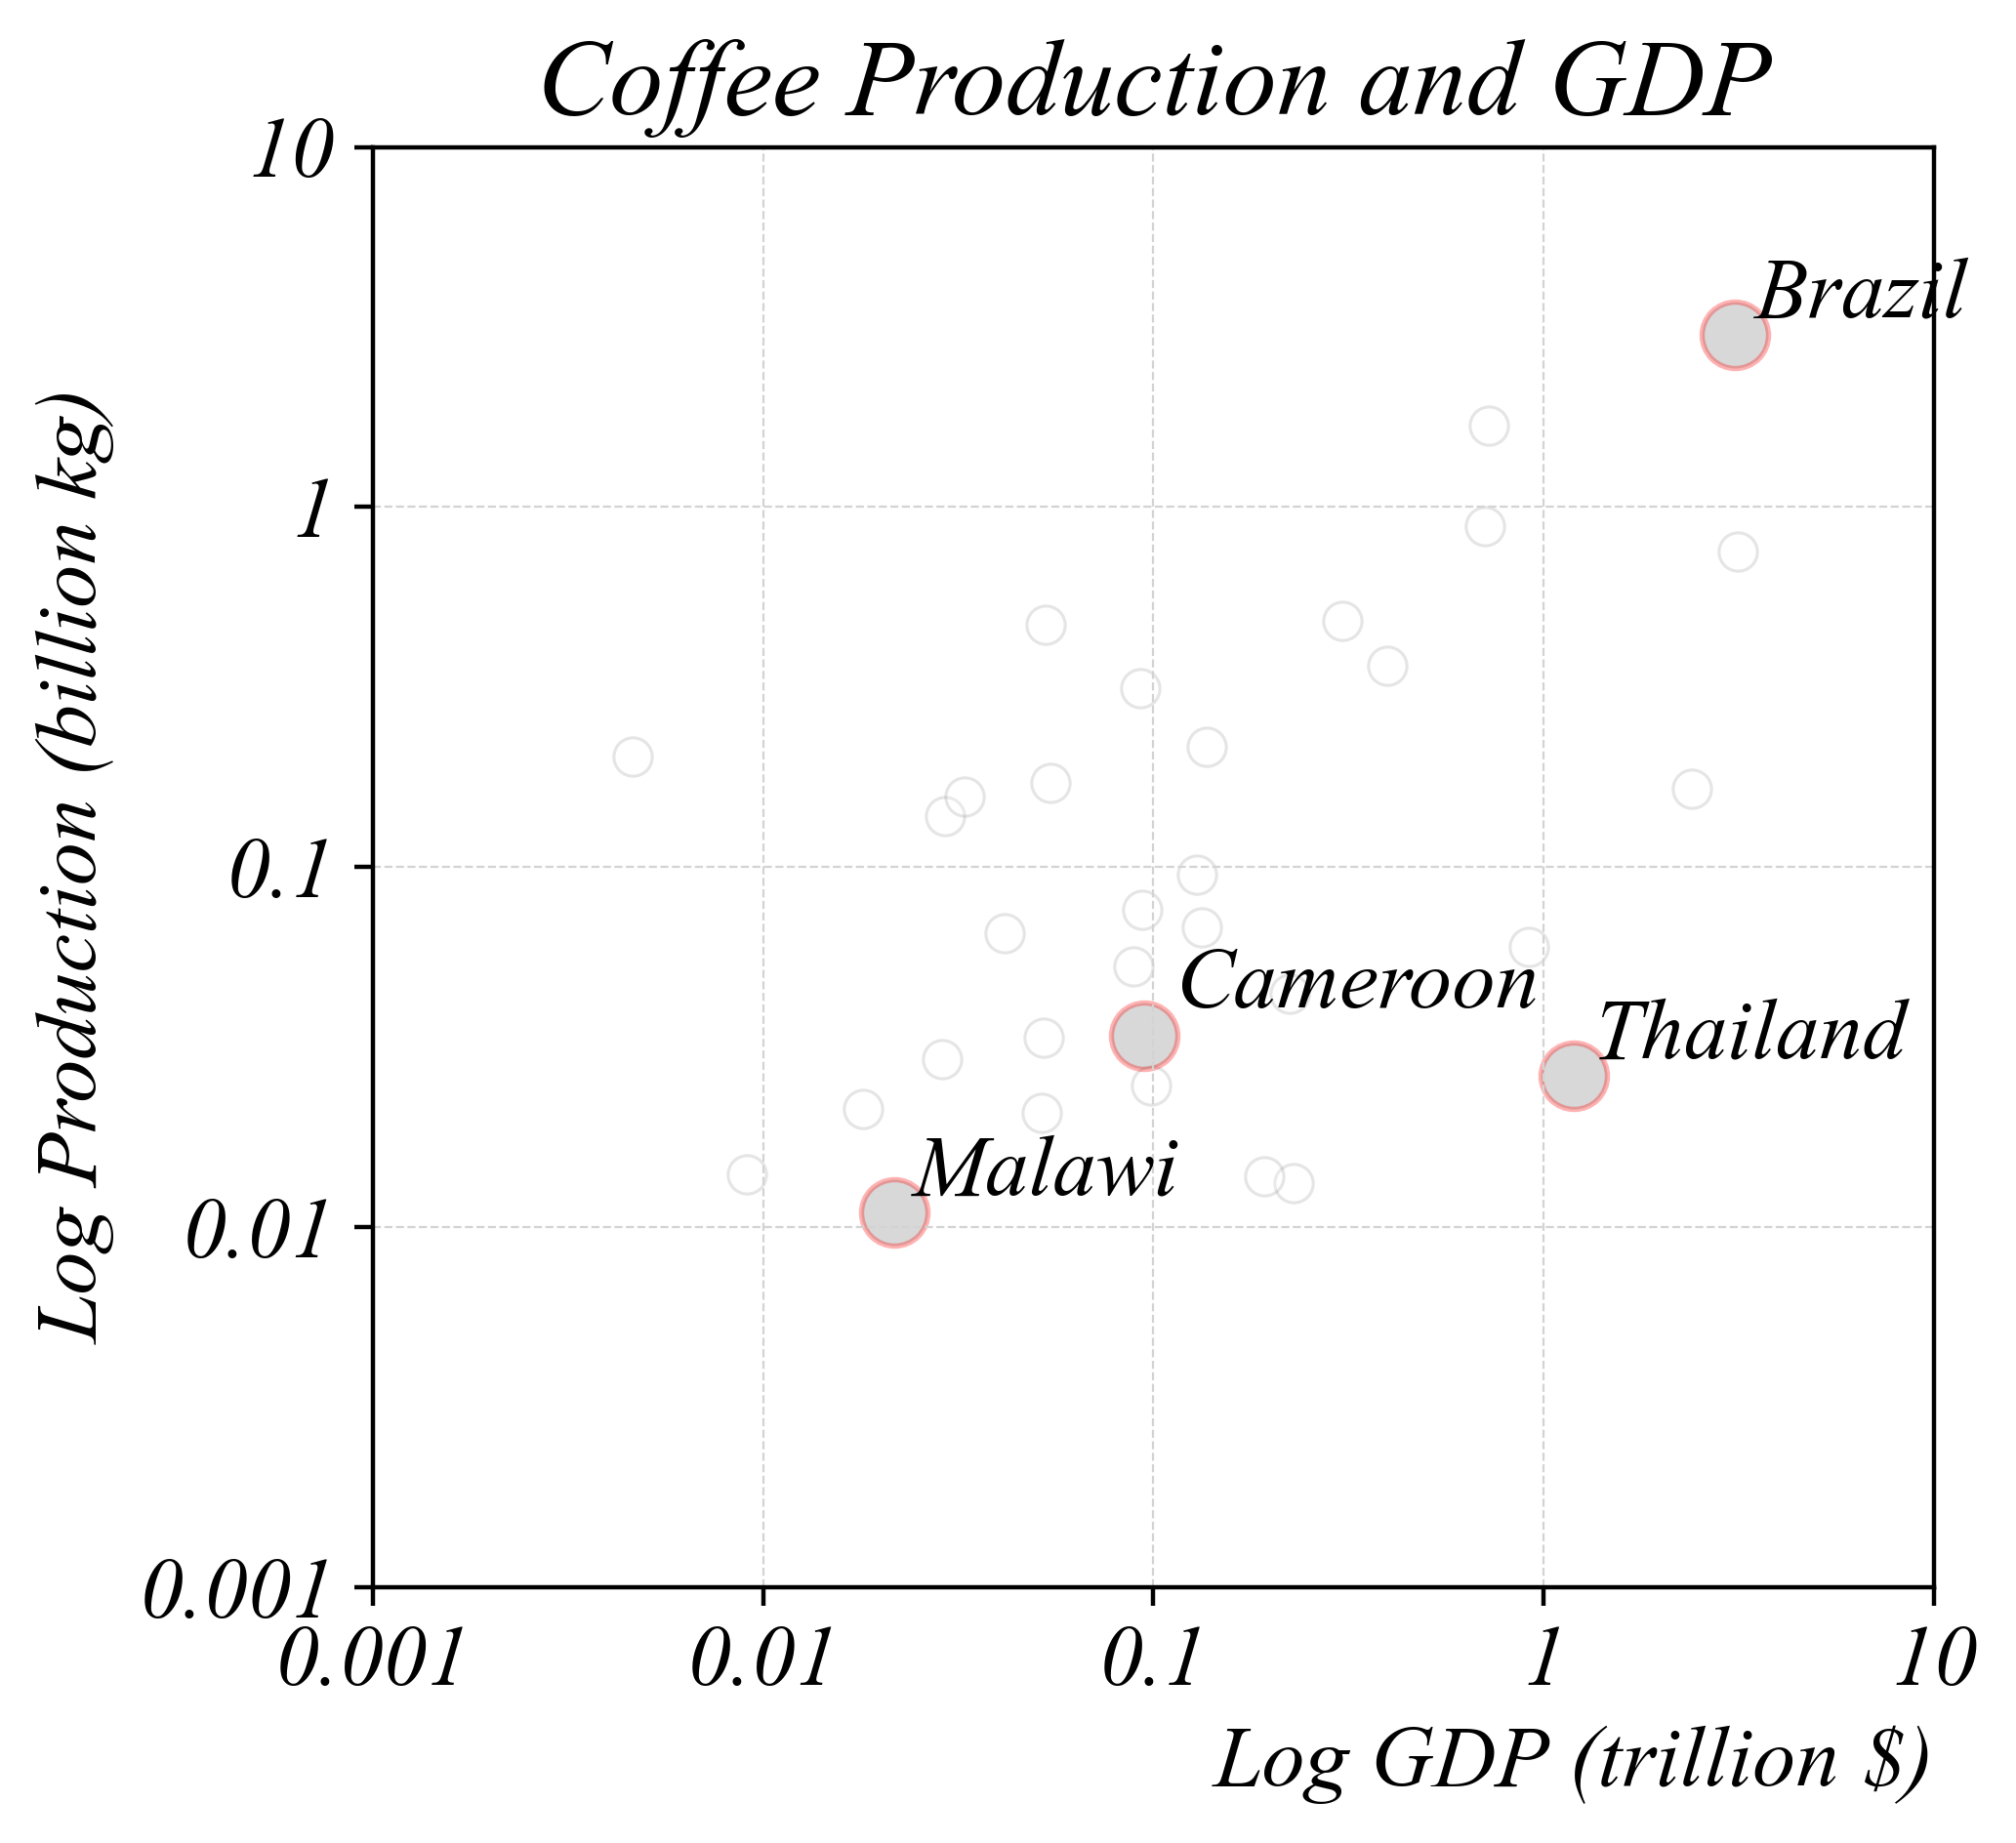

In [16]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

subset_list = ['BRA', 'THA', 'MWI', 'CMR']
other_data = data[~data.Code.isin(subset_list)]
subset = data[data.Code.isin(subset_list)]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(other_data, x='log10_GDP', y='log10_Tonnes', color='white', edgecolors='grey', alpha=0.2, s=50)
sns.scatterplot(subset, x='log10_GDP', y='log10_Tonnes', color='grey', edgecolors='red', alpha=0.3, s=150)

# Annotation
for index, row in subset.iterrows():
    row_gdp = row.log10_GDP
    row_tonnes = row.log10_Tonnes
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_12.png')

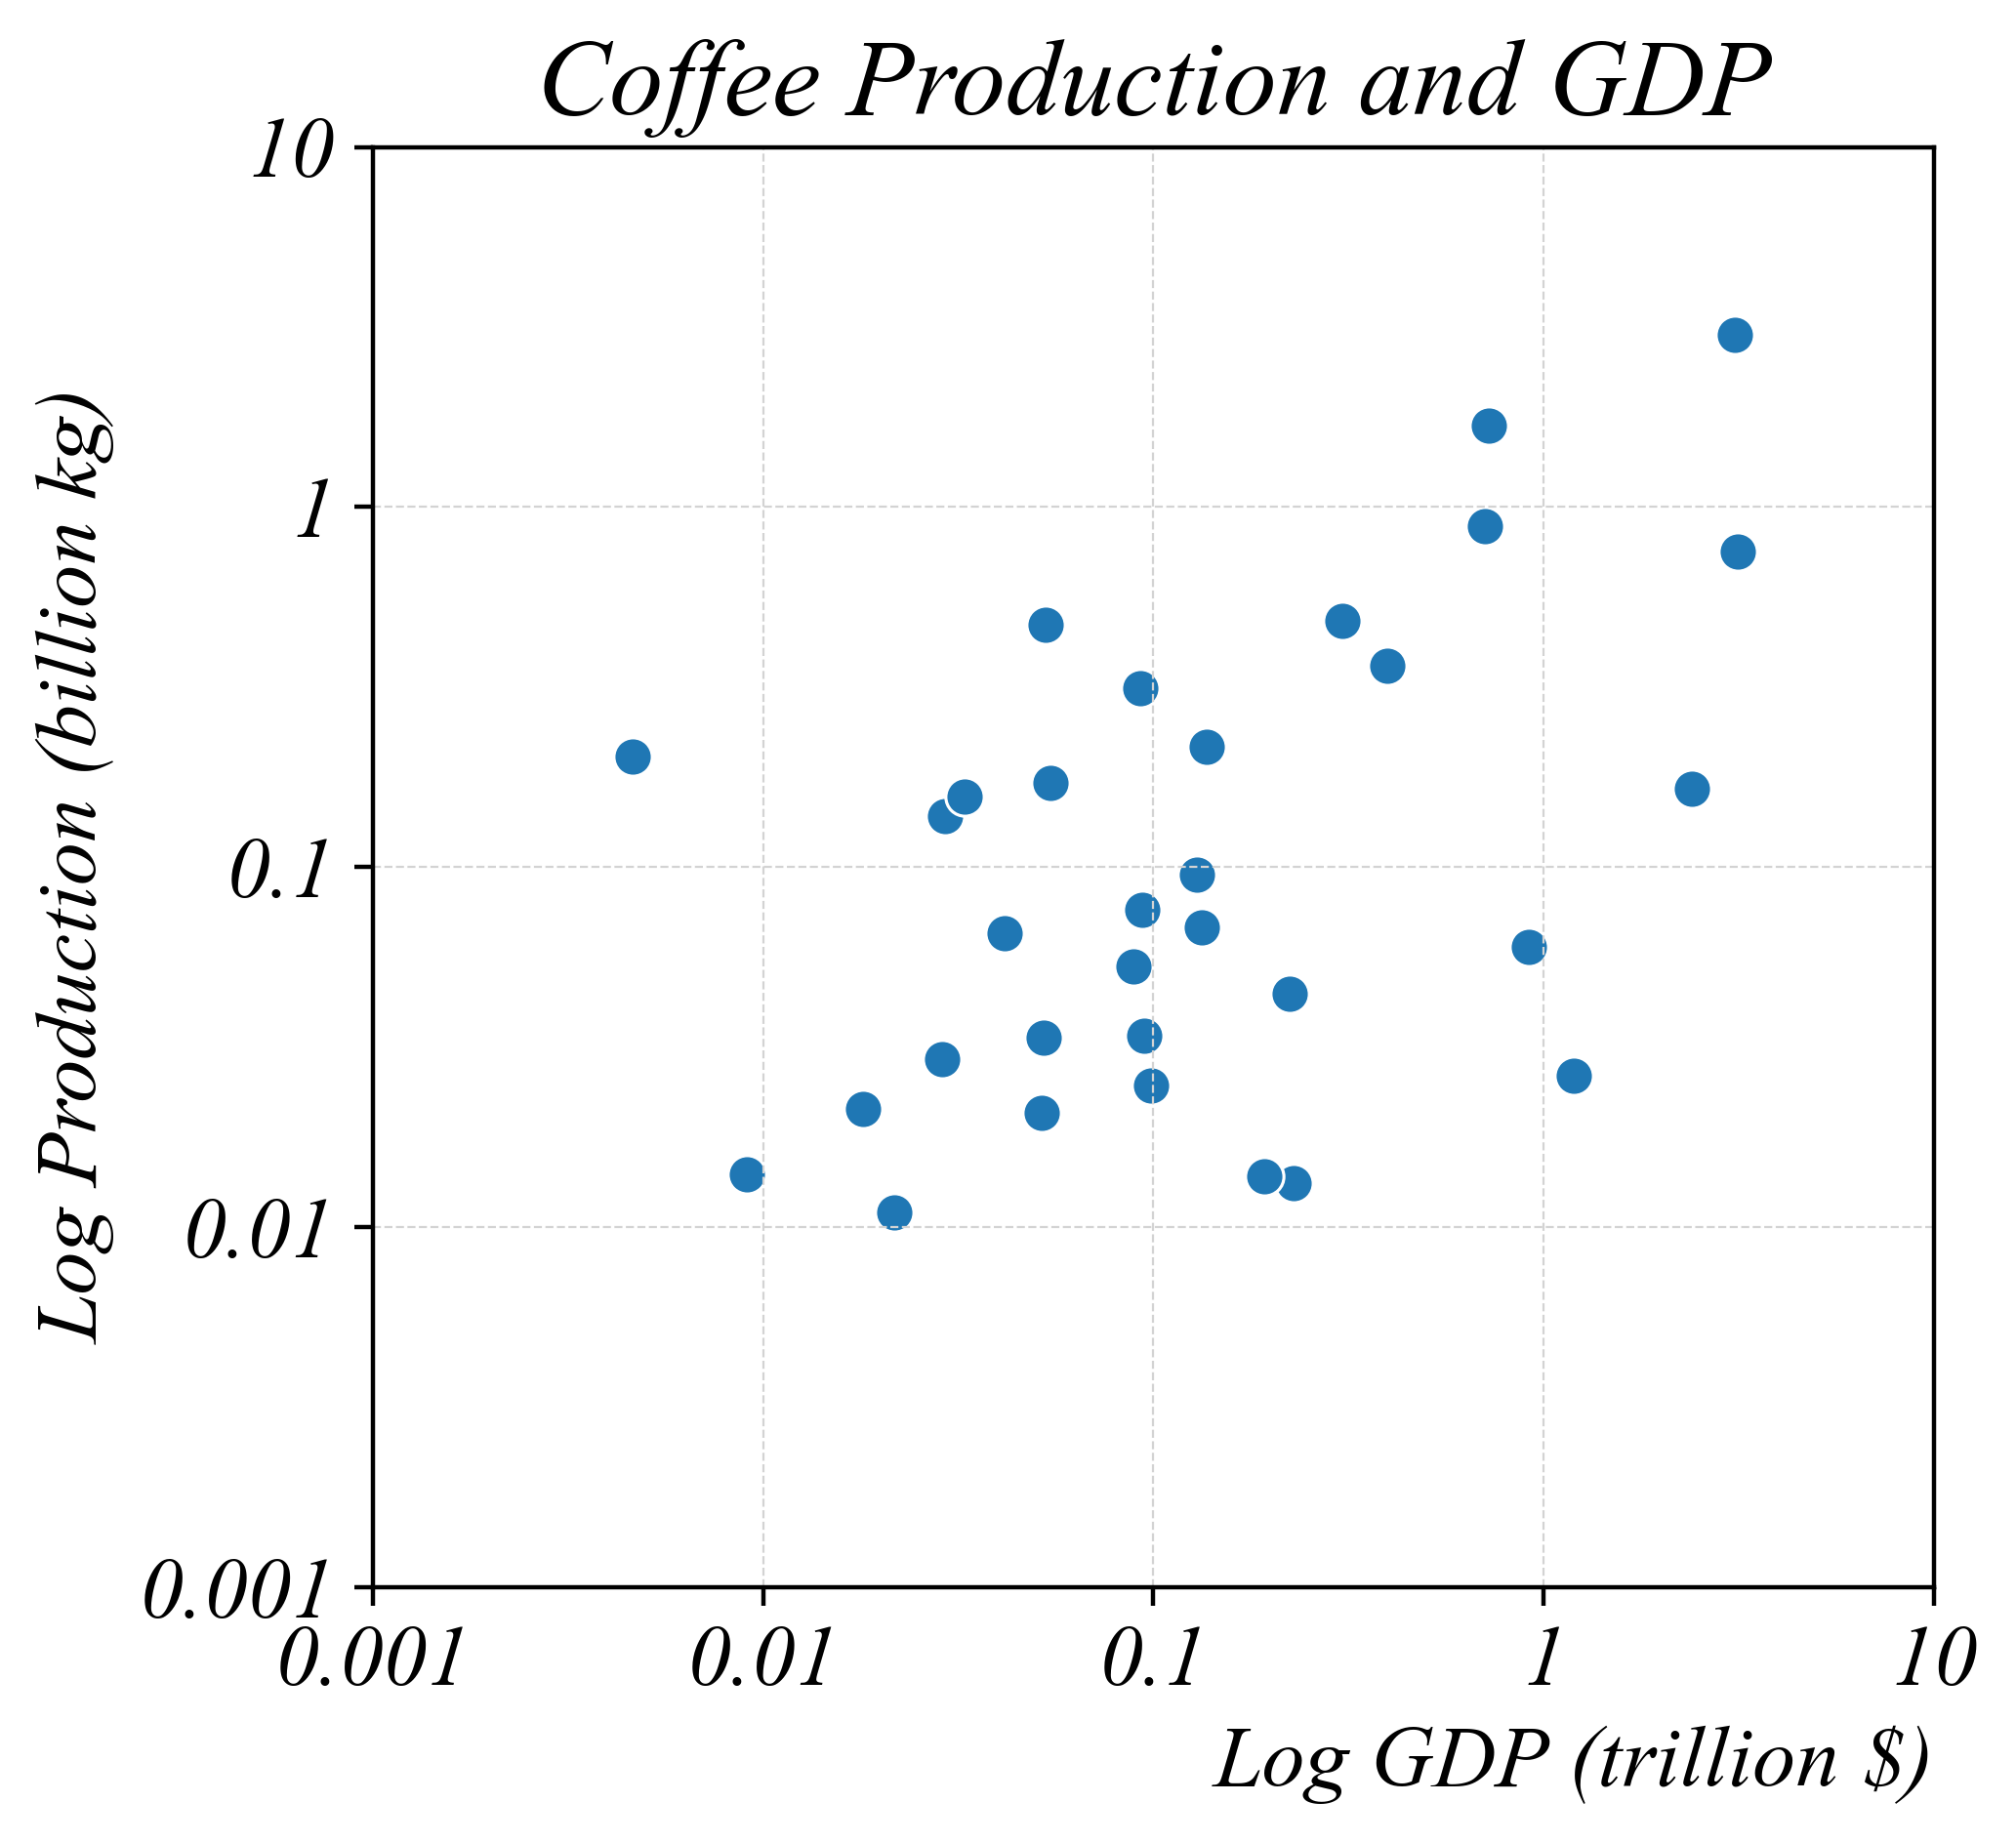

In [17]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_13.png')

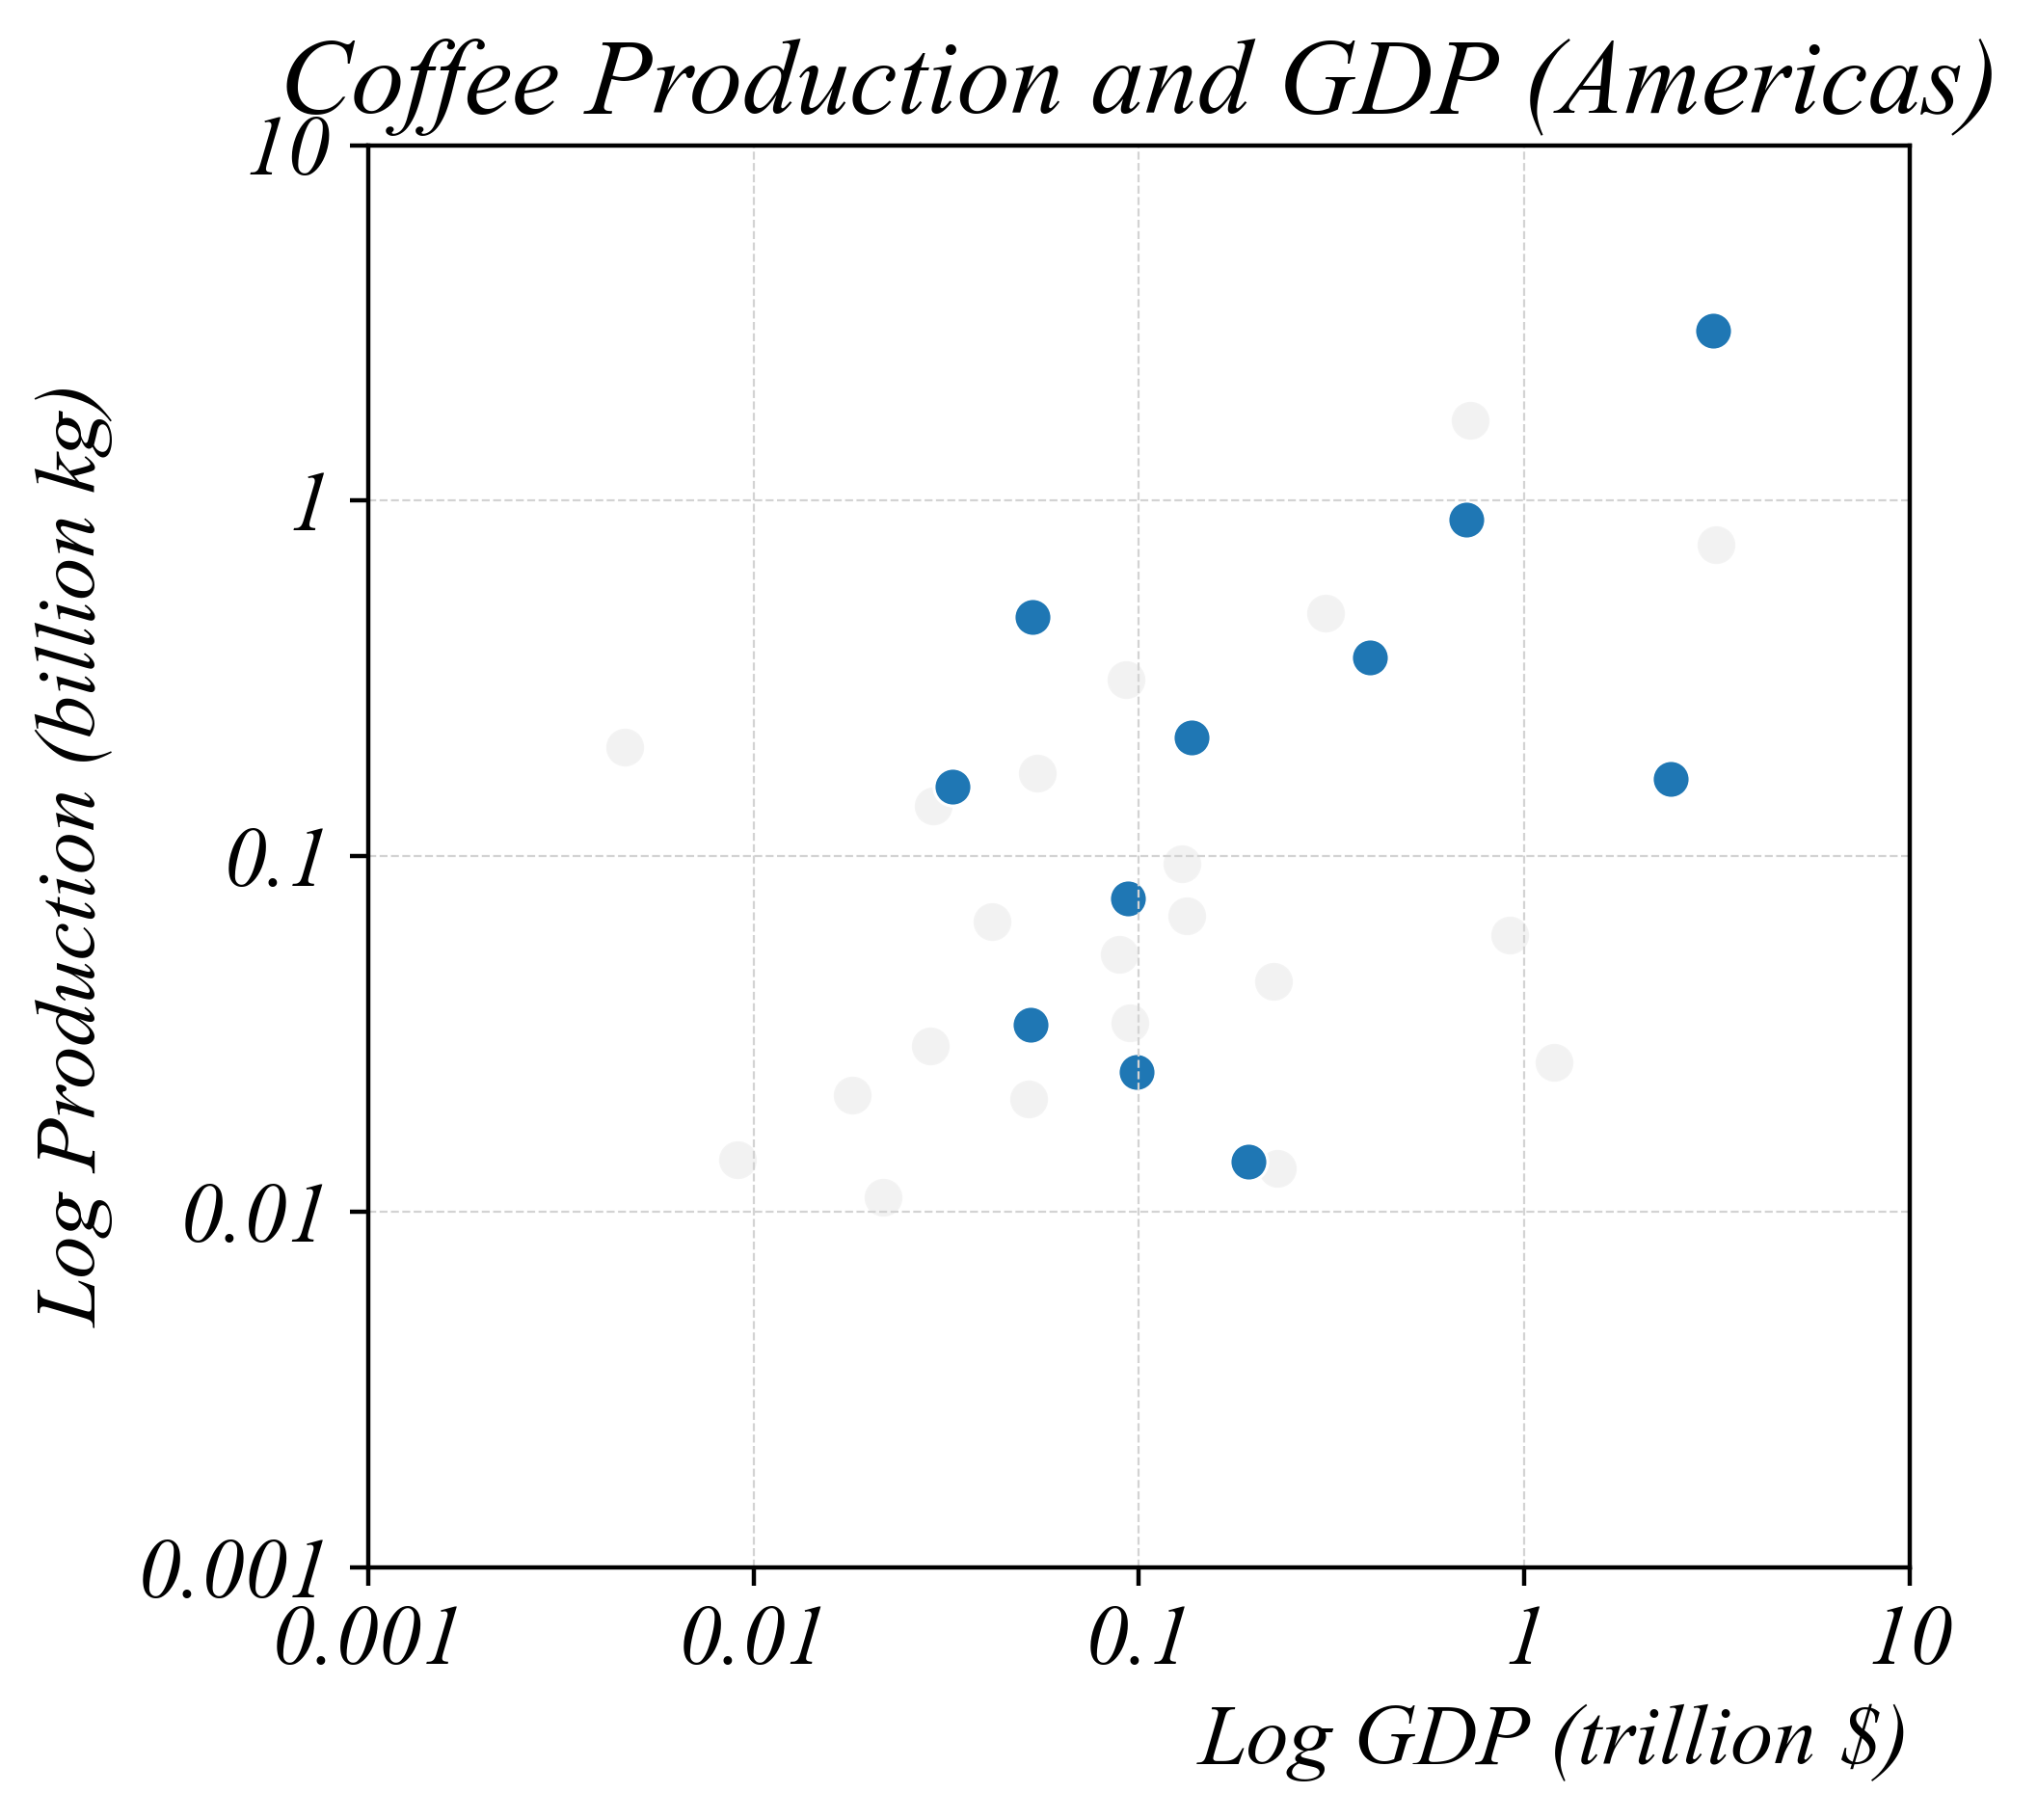

In [18]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]

ticks = [0,1,2,3,4]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='log10_GDP', y='log10_Tonnes', color='grey', alpha=0.1, s=50)
sns.scatterplot(america_data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP (Americas)')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_14.png')

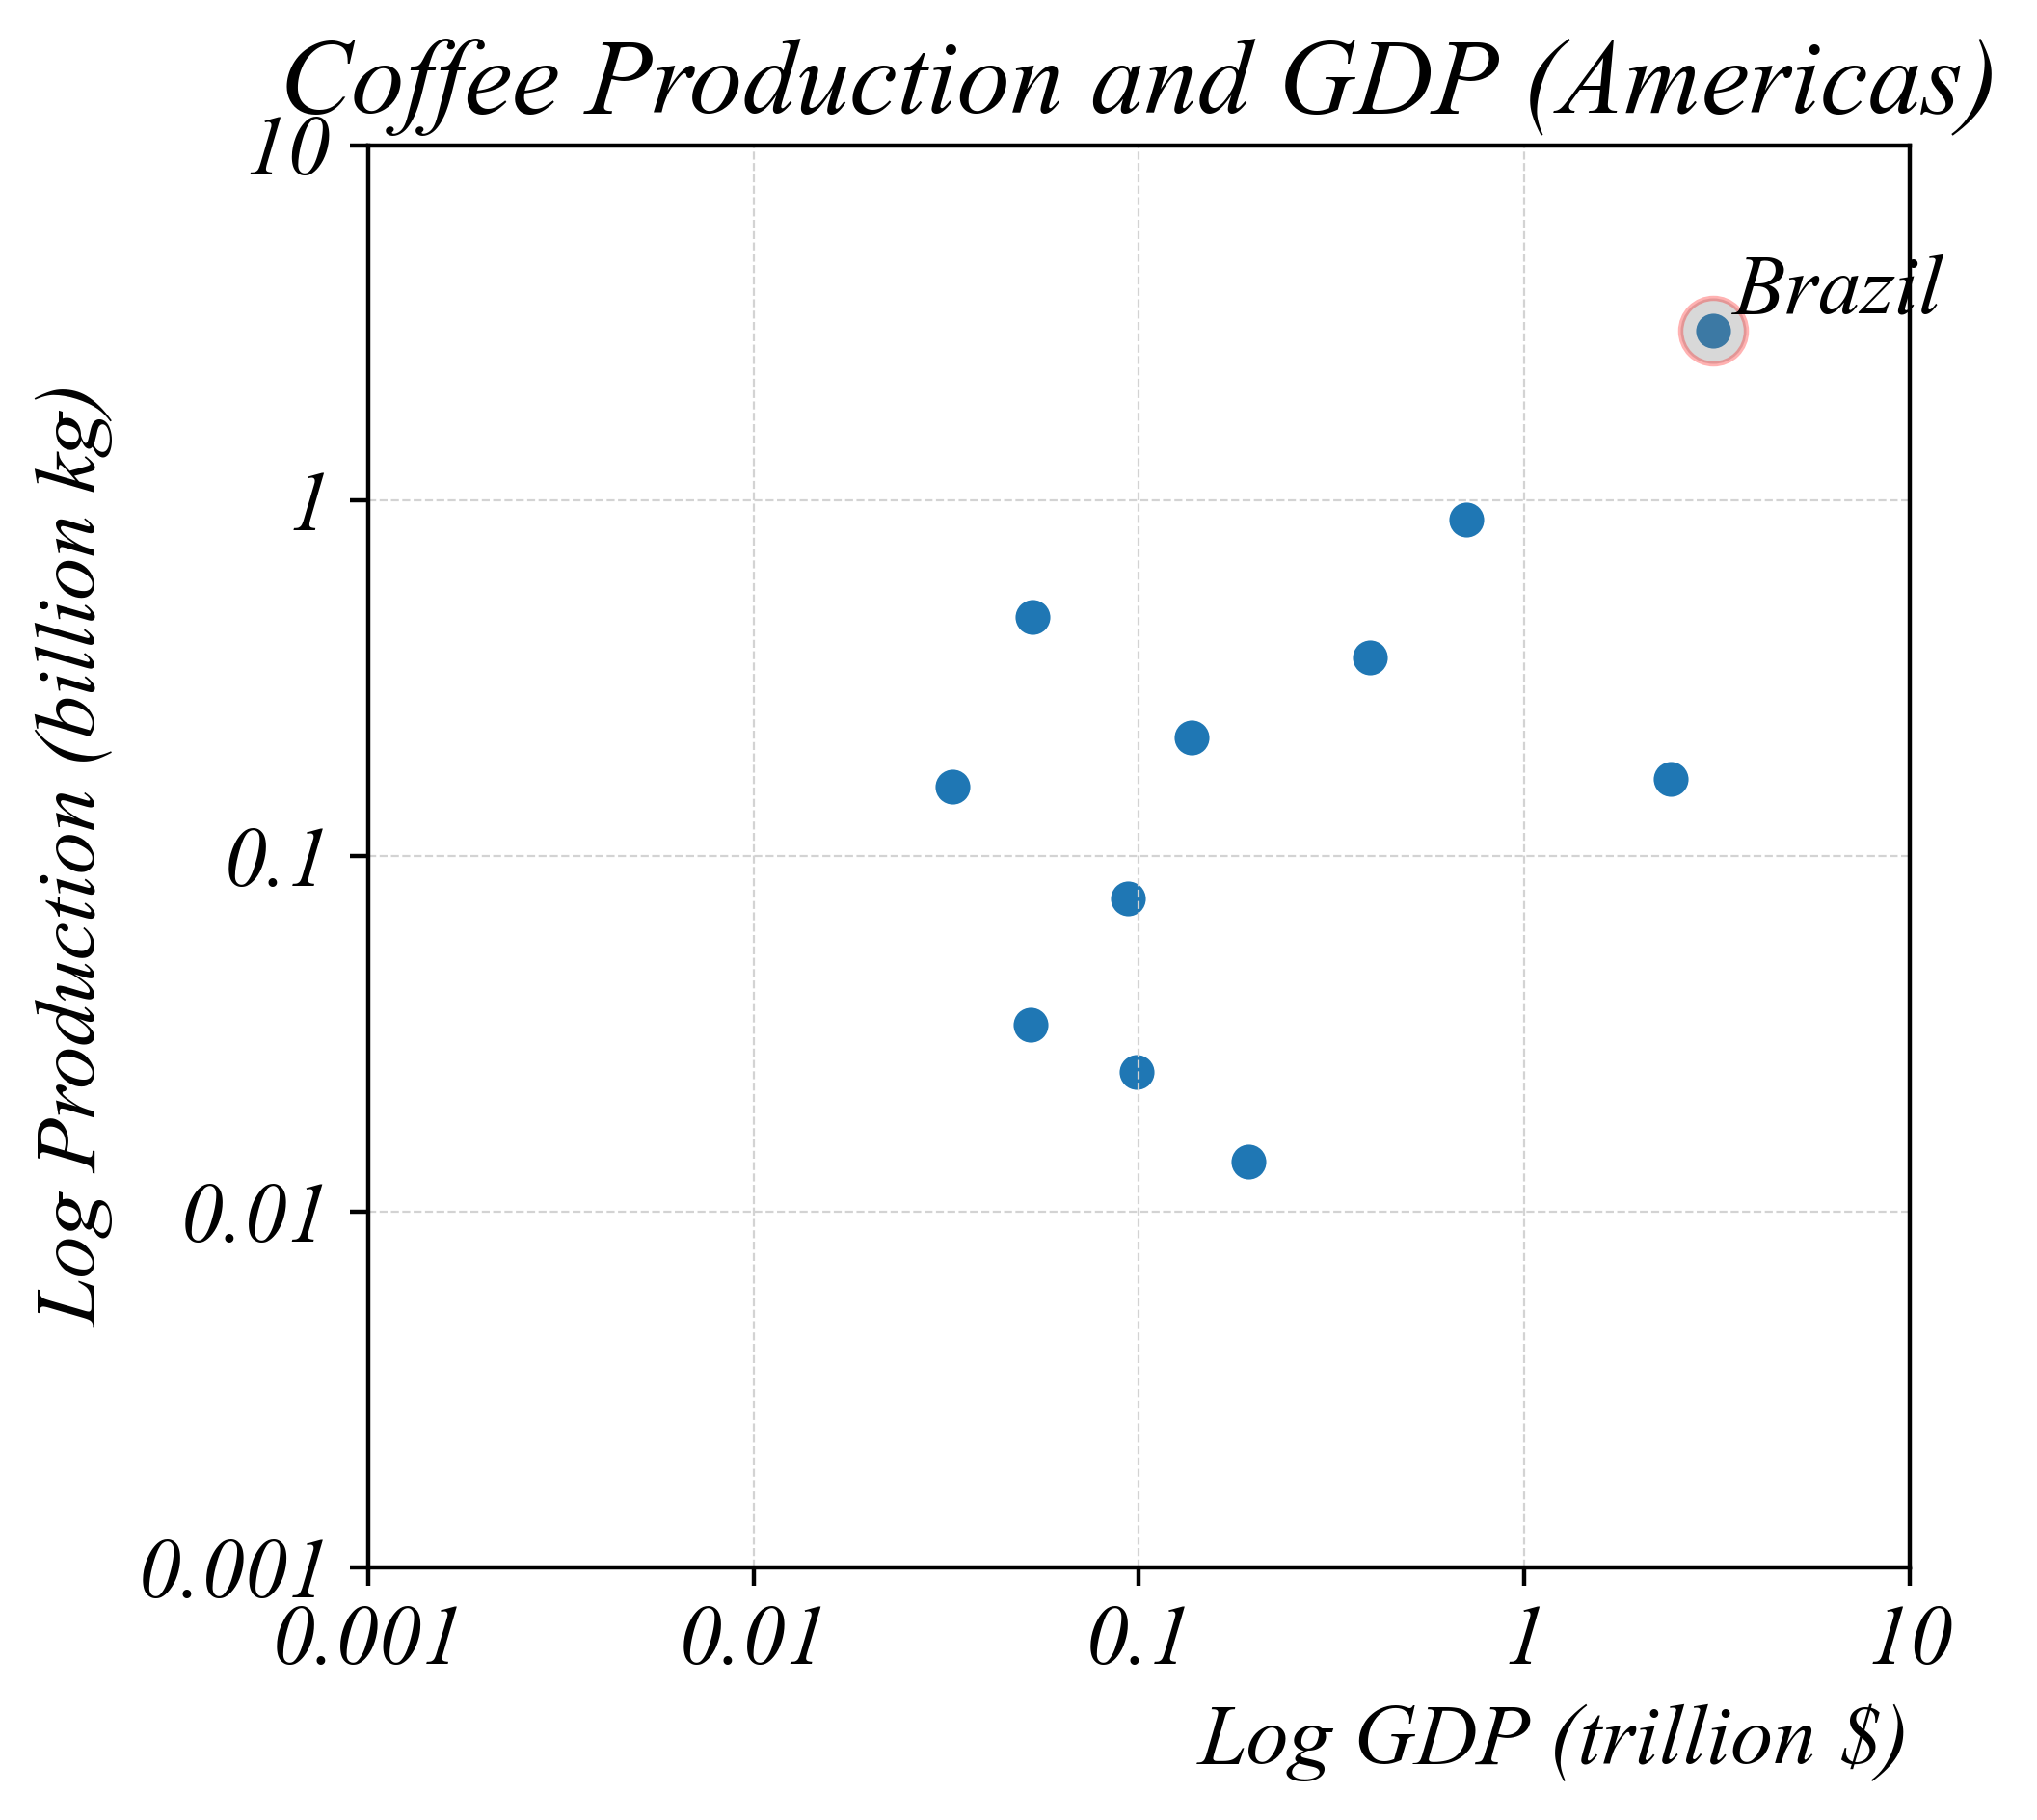

In [19]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]

america_max = america_data[america_data.log10_Tonnes == america_data.log10_Tonnes.max()]

row_gdp = america_max.iloc[0].log10_GDP
row_tonnes = america_max.iloc[0].log10_Tonnes
row_entity = america_max.iloc[0].Entity

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(america_data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)
sns.scatterplot(america_max, x='log10_GDP', y='log10_Tonnes', color='grey', edgecolors='red', alpha=0.3, s=150)

# Annotation
plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP (Americas)')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_15.png')

/var/folders/xc/wlq2_w5j6zncfqys5_nfww4w0000gn/T/ipykernel_57163/1784404148.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america_data['GDP_dif'] = np.abs(america_data.log10_GDP - row_gdp)


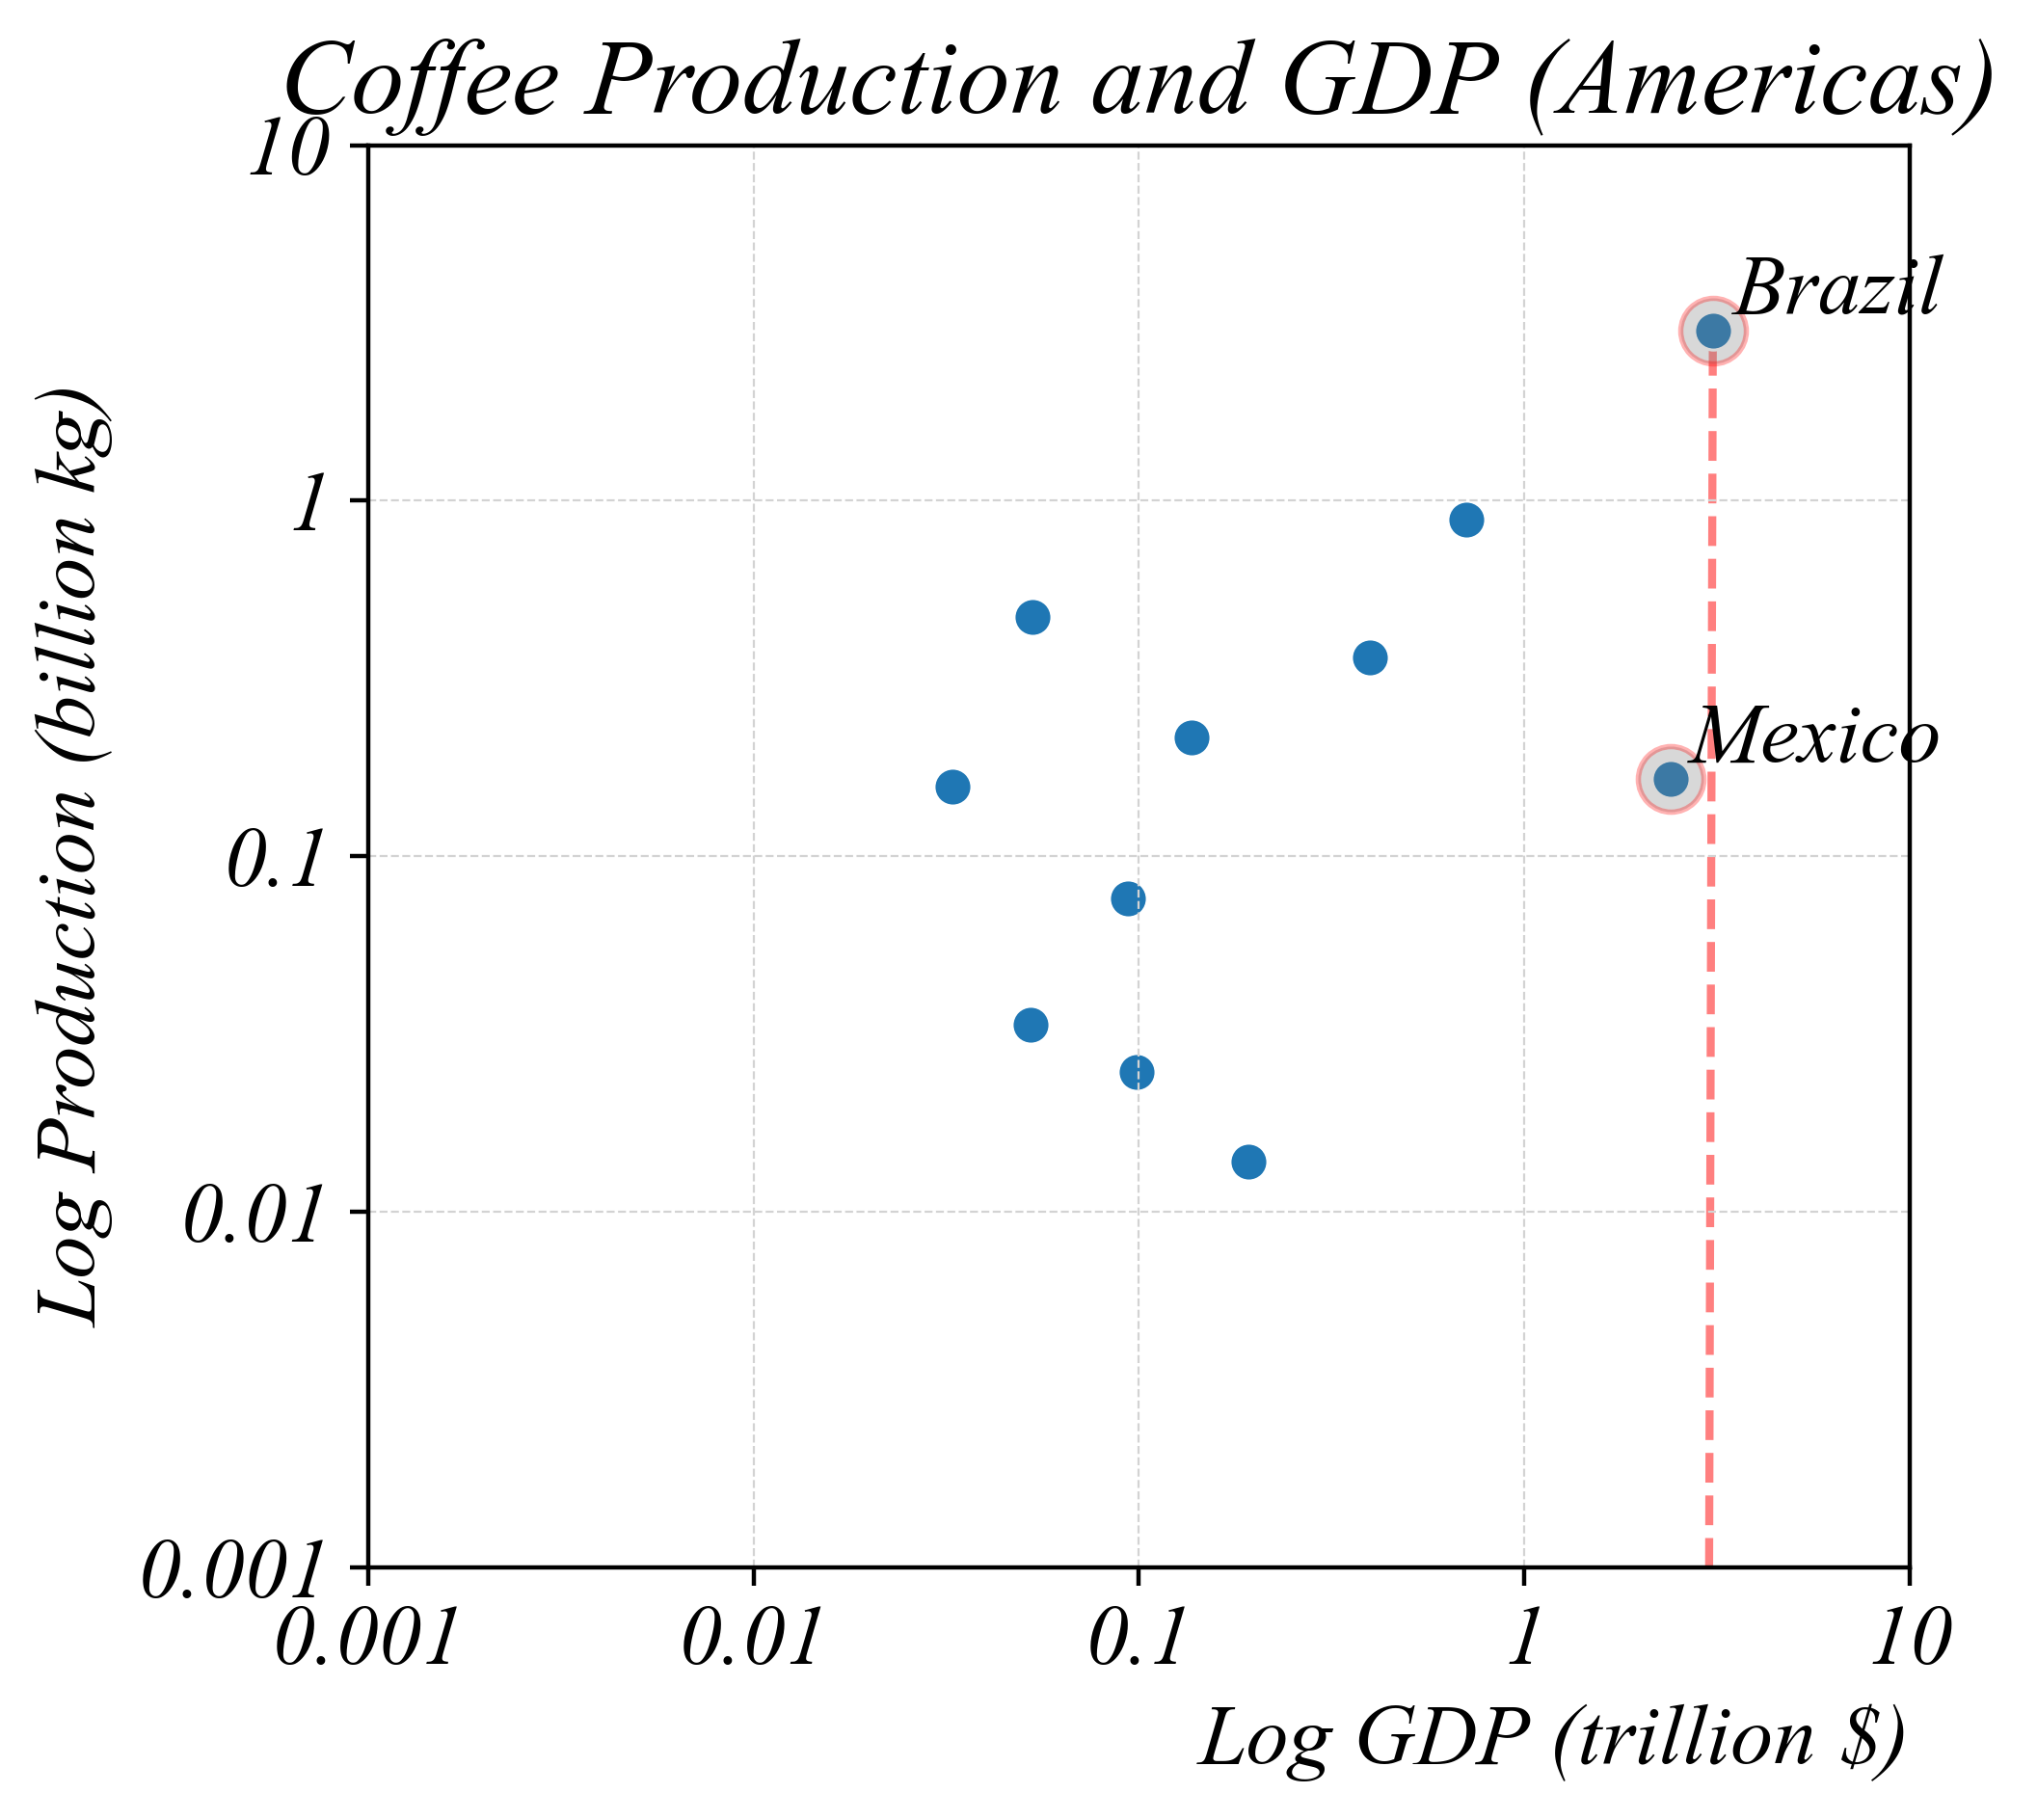

In [20]:
# Data
data = pd.read_csv('data/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['coffe_prod'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(america_data, x='log10_GDP', y='log10_Tonnes', color='C0', s=50)

america_max = america_data[america_data.log10_Tonnes == america_data.log10_Tonnes.max()]

row_gdp = america_max.iloc[0].log10_GDP
row_tonnes = america_max.iloc[0].log10_Tonnes
row_entity = america_max.iloc[0].Entity

sns.scatterplot(america_max, x='log10_GDP', y='log10_Tonnes', color='grey', edgecolors='red', alpha=0.3, s=150)
plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

plt.plot([row_tonnes,row_gdp],[-3,row_gdp], linestyle='--', color='red', zorder=-1, alpha=0.5)

america_data['GDP_dif'] = np.abs(america_data.log10_GDP - row_gdp)
america_dif_min = america_data[america_data['GDP_dif'] == america_data[america_data['GDP_dif'] >0]['GDP_dif'].min()]
plt.scatter(america_dif_min['log10_GDP'], america_dif_min['log10_Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

row_gdp = america_dif_min.iloc[0].log10_GDP
row_tonnes = america_dif_min.iloc[0].log10_Tonnes
row_entity = america_dif_min.iloc[0].Entity

plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

# Styling
plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)

plt.ylabel('Log Production (billion kg)')
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.ylim(-3,1)
plt.title('Coffee Production and GDP (Americas)')

plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_16.png')

## Coffee Consumption

#### Datasets

In [2]:
cpi = pd.read_csv('data/CPI_raw.csv')

cpi.Year = cpi.Year.astype(int)
cpi = cpi[cpi.Year >= 1970]
cpi['I'] = cpi['Annual Percent Change (rate of inflation)'].str.replace('%', '').astype(float)/100
cpi['cpi'] = cpi['Annual Average CPI(-U)'].astype(float)

""" 1970's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[0]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['base'] = values

""" Today's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[-1]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['today'] = values

cpi.to_csv('data/CPI.csv')

In [ ]:
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

cpi = pd.read_csv('data/CPI.csv')

today_list = []
cpi_list = []
for i,row in data.iterrows():
    cpi_year = cpi[cpi.Year == row.year]
    year = row.year
    today_list.append(cpi_year.today.iloc[0])
    cpi_list.append(cpi_year.cpi.iloc[0])
    
data['today'] = today_list
data['cpi'] = cpi_list
data.to_csv('data/Coffee_Prices_CPI.csv')

In [ ]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['date'] = data['date'].dt.to_period('M')

monthly_avg = data.groupby('date')['price'].mean().reset_index()

monthly_avg.to_csv('data/Monthly_Coffee_Prices.csv')

In [ ]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data.to_csv('data/Daily_Coffee_Prices.csv')

#### Figures

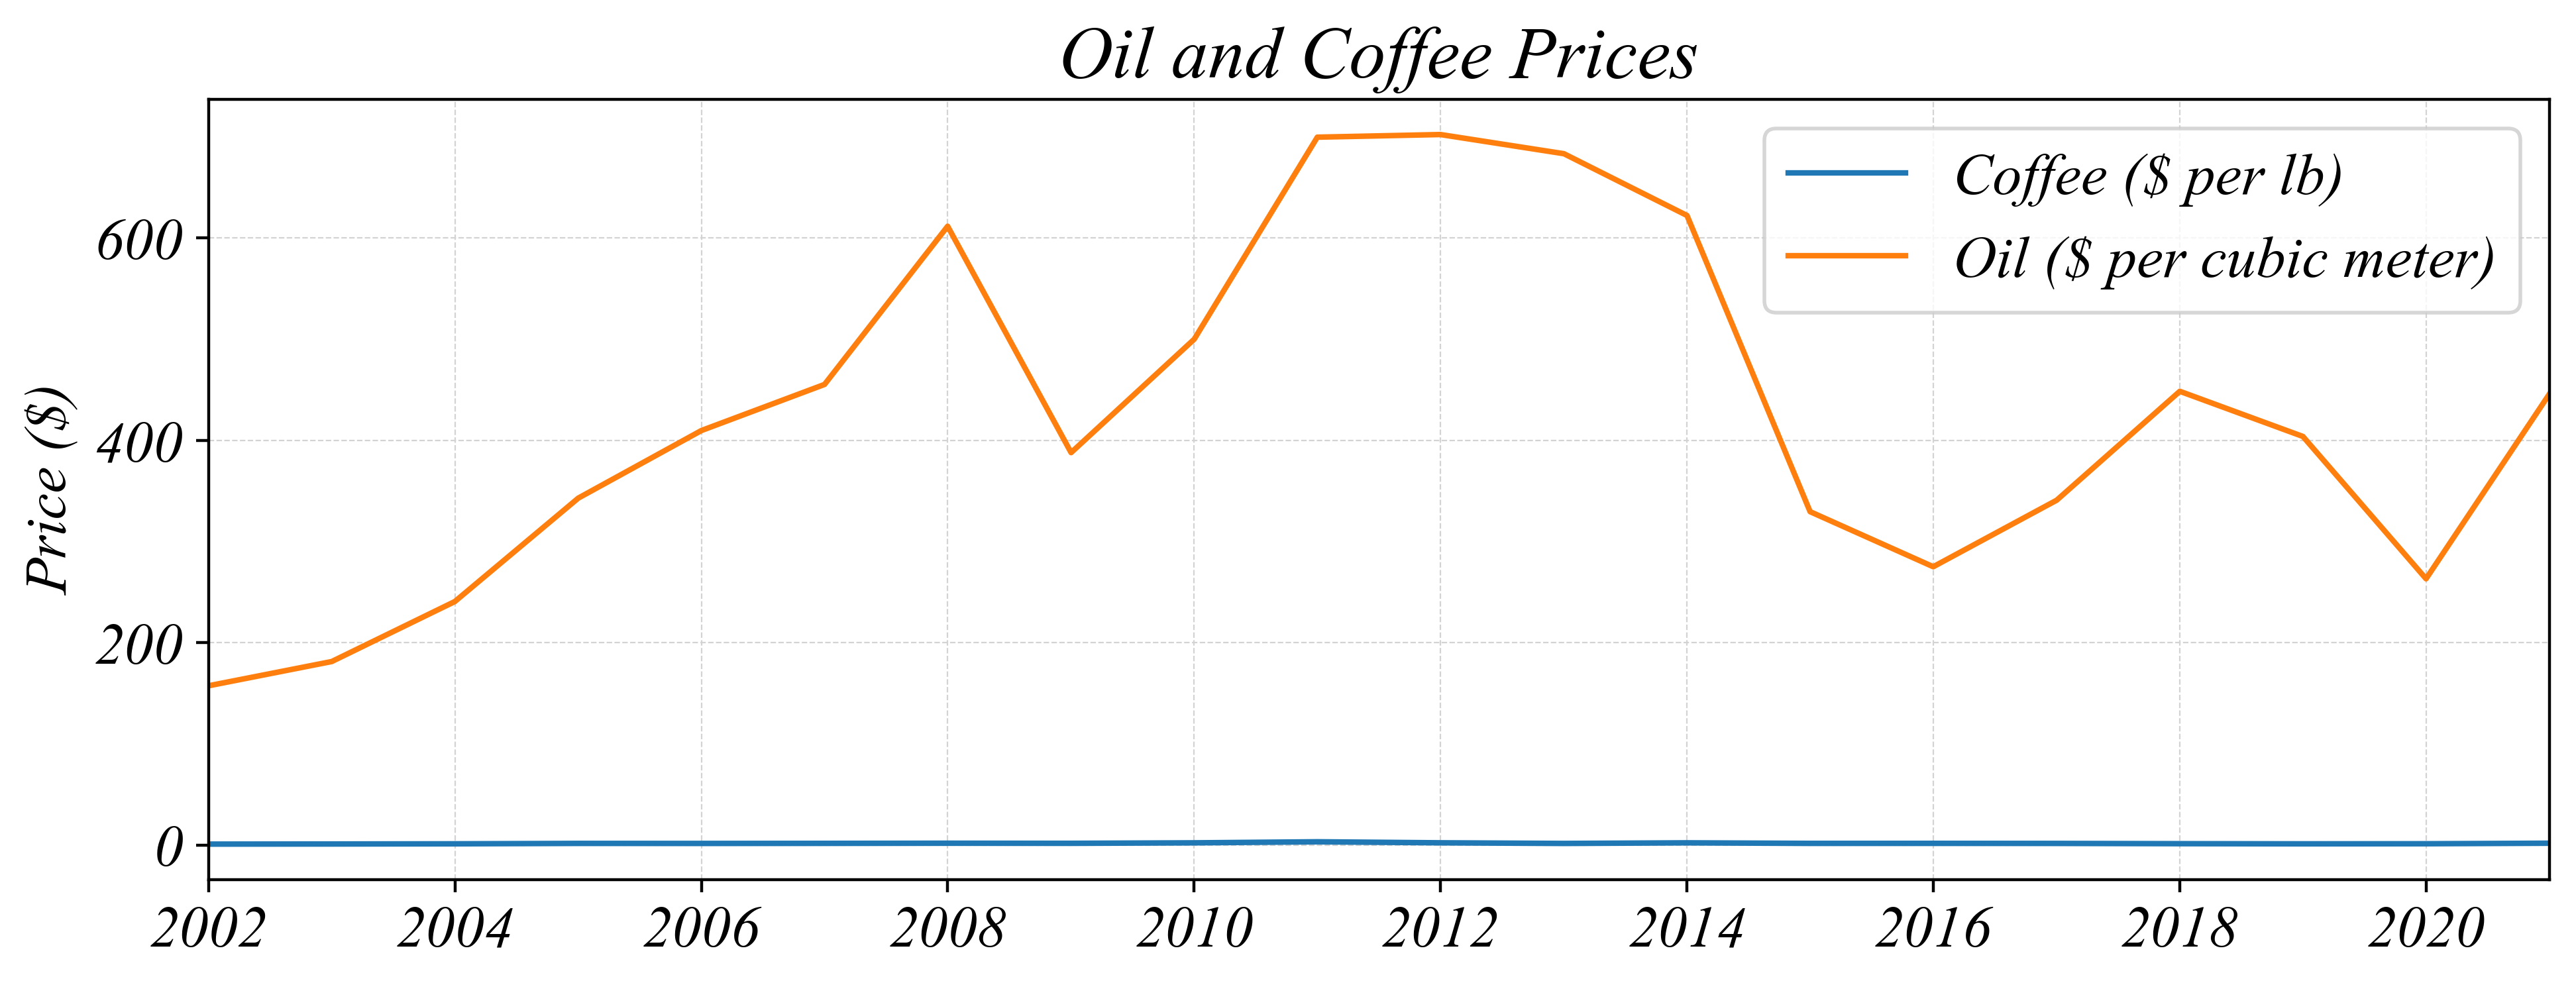

In [16]:
import matplotlib.dates as mdates

# Data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Figure
plt.figure(figsize=(10, 4))

sns.lineplot(data, x='date_column', y='Coffee', label='Coffee ($ per lb)')
sns.lineplot(data, x='date_column', y='Oil', label='Oil ($ per cubic meter)')

# Styling
plt.xlabel('')
plt.xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2021-01-01'))
plt.ylabel('Price ($)')

plt.title('Oil and Coffee Prices')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.legend()
plt.tight_layout()

plt.savefig('i/c_18.png')

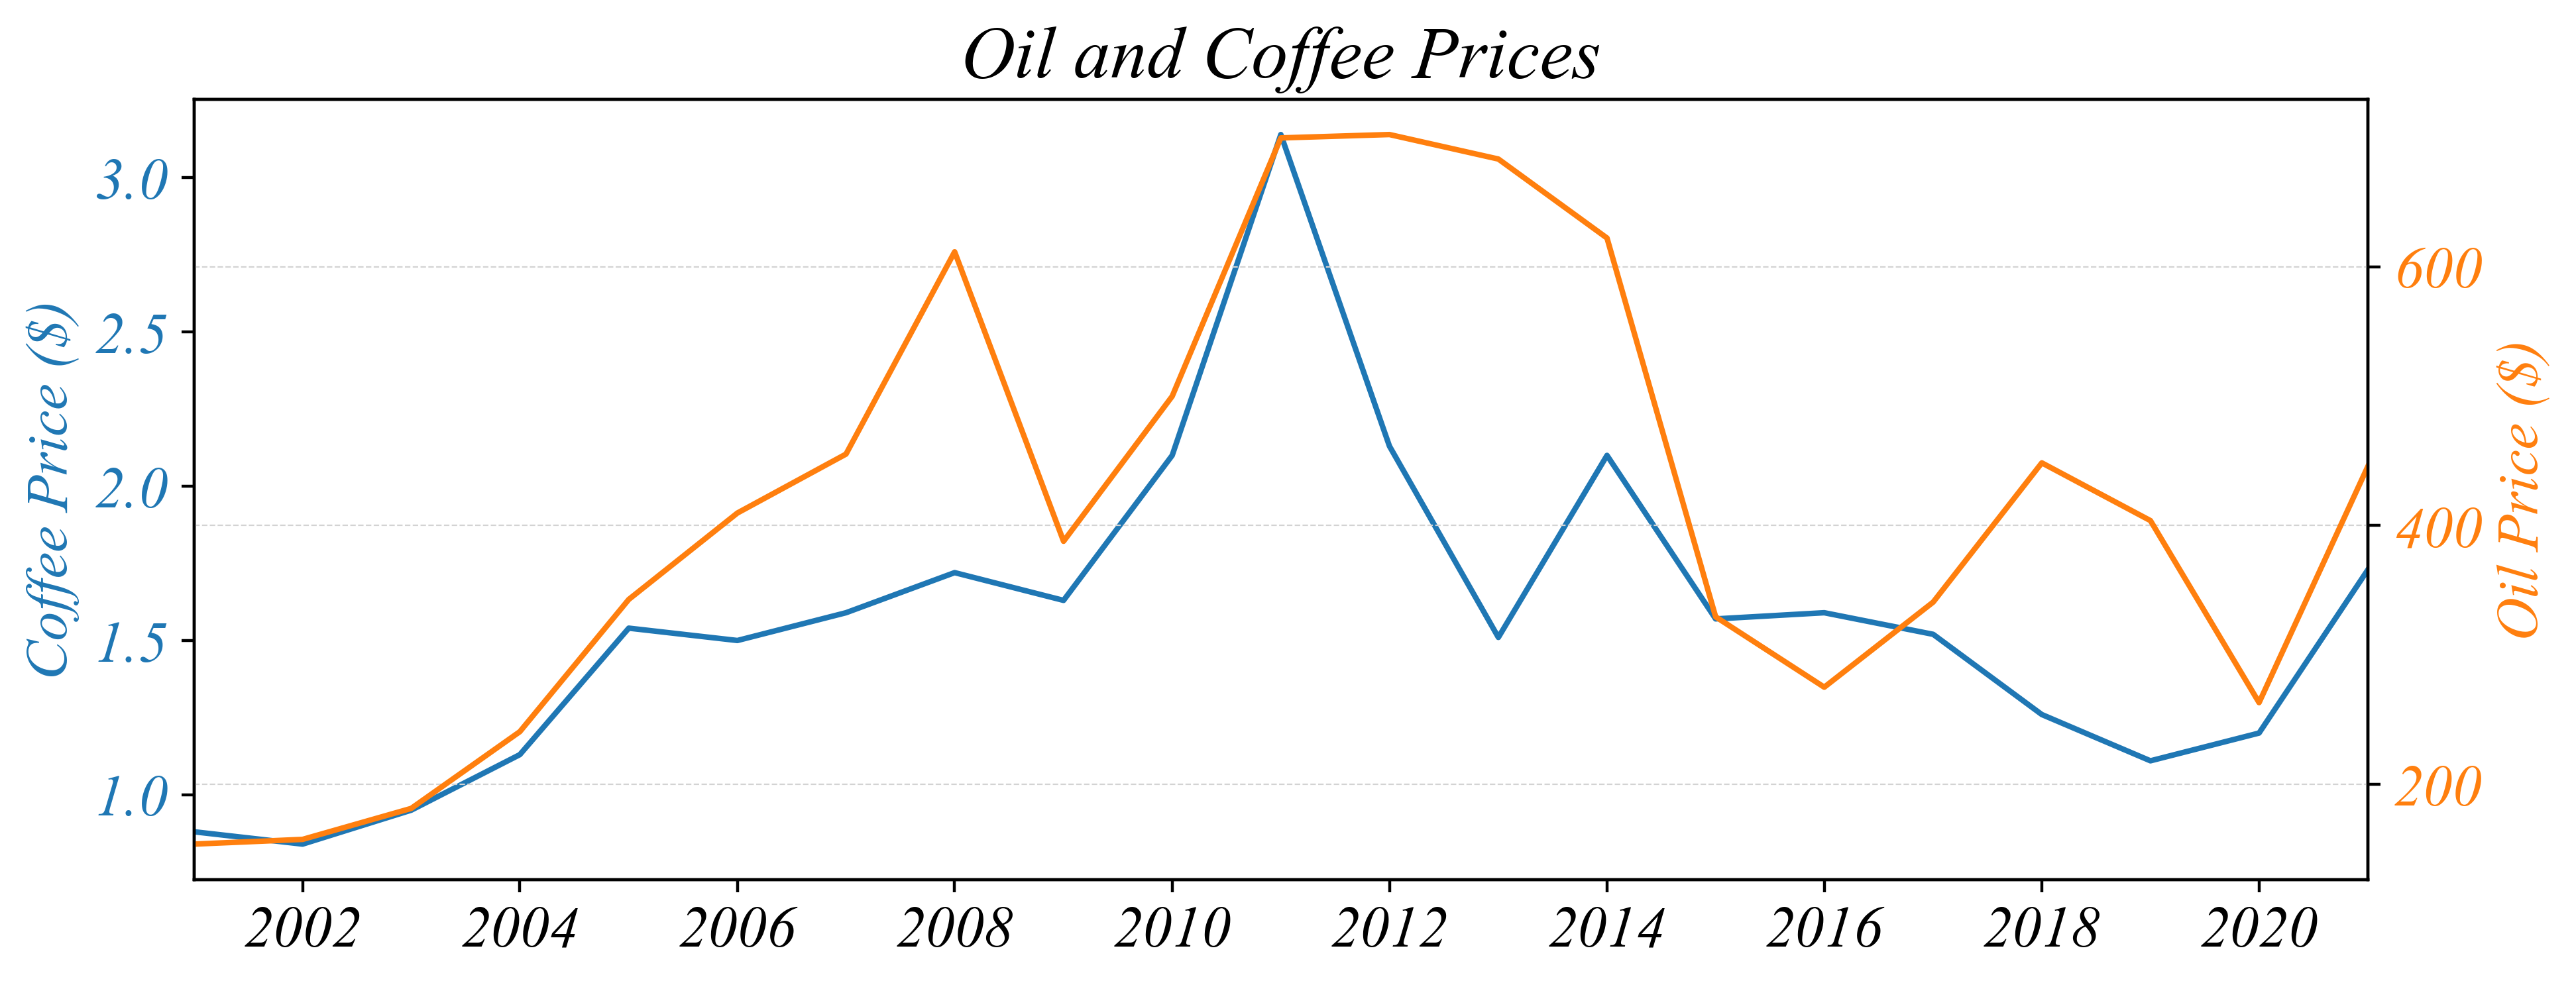

In [17]:
import matplotlib.dates as mdates

# Data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Figure
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and legend
plt.title('Oil and Coffee Prices')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
fig.tight_layout()  # Adjust layout to prevent overlap

# Save Figure
plt.savefig('i/c_19.png')

<Axes: xlabel='date_column', ylabel='Oil'>

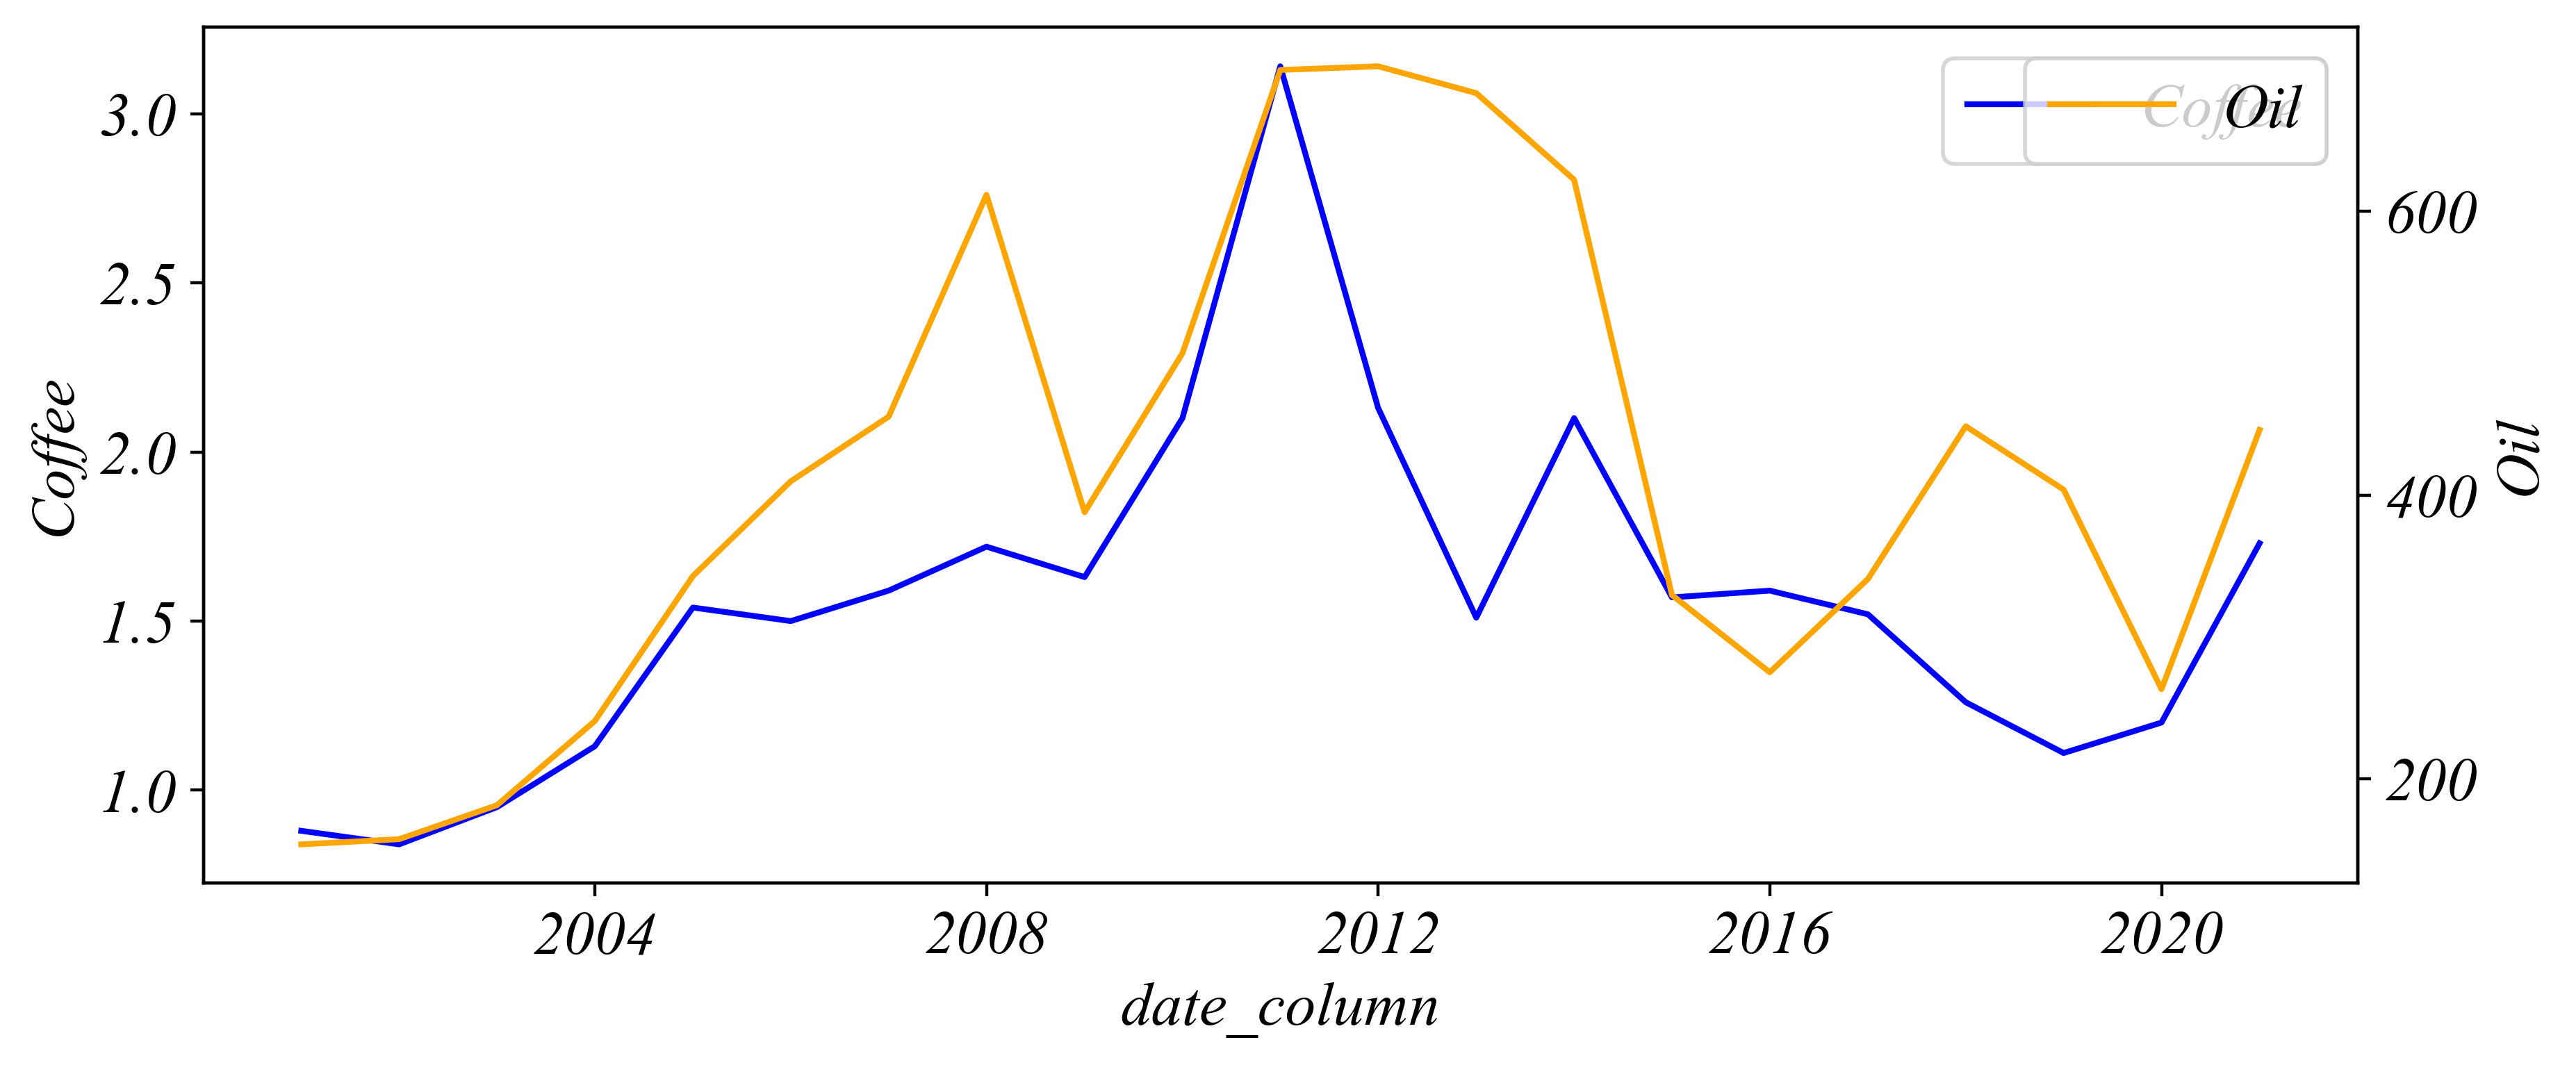

In [21]:
import matplotlib.dates as mdates

# Data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot with seaborn styling but still need matplotlib for twin axes
sns.lineplot(data=data, x='date_column', y='Coffee', ax=ax1, color='blue', label='Coffee')
ax2 = ax1.twinx()
sns.lineplot(data=data, x='date_column', y='Oil', ax=ax2, color='orange', label='Oil')


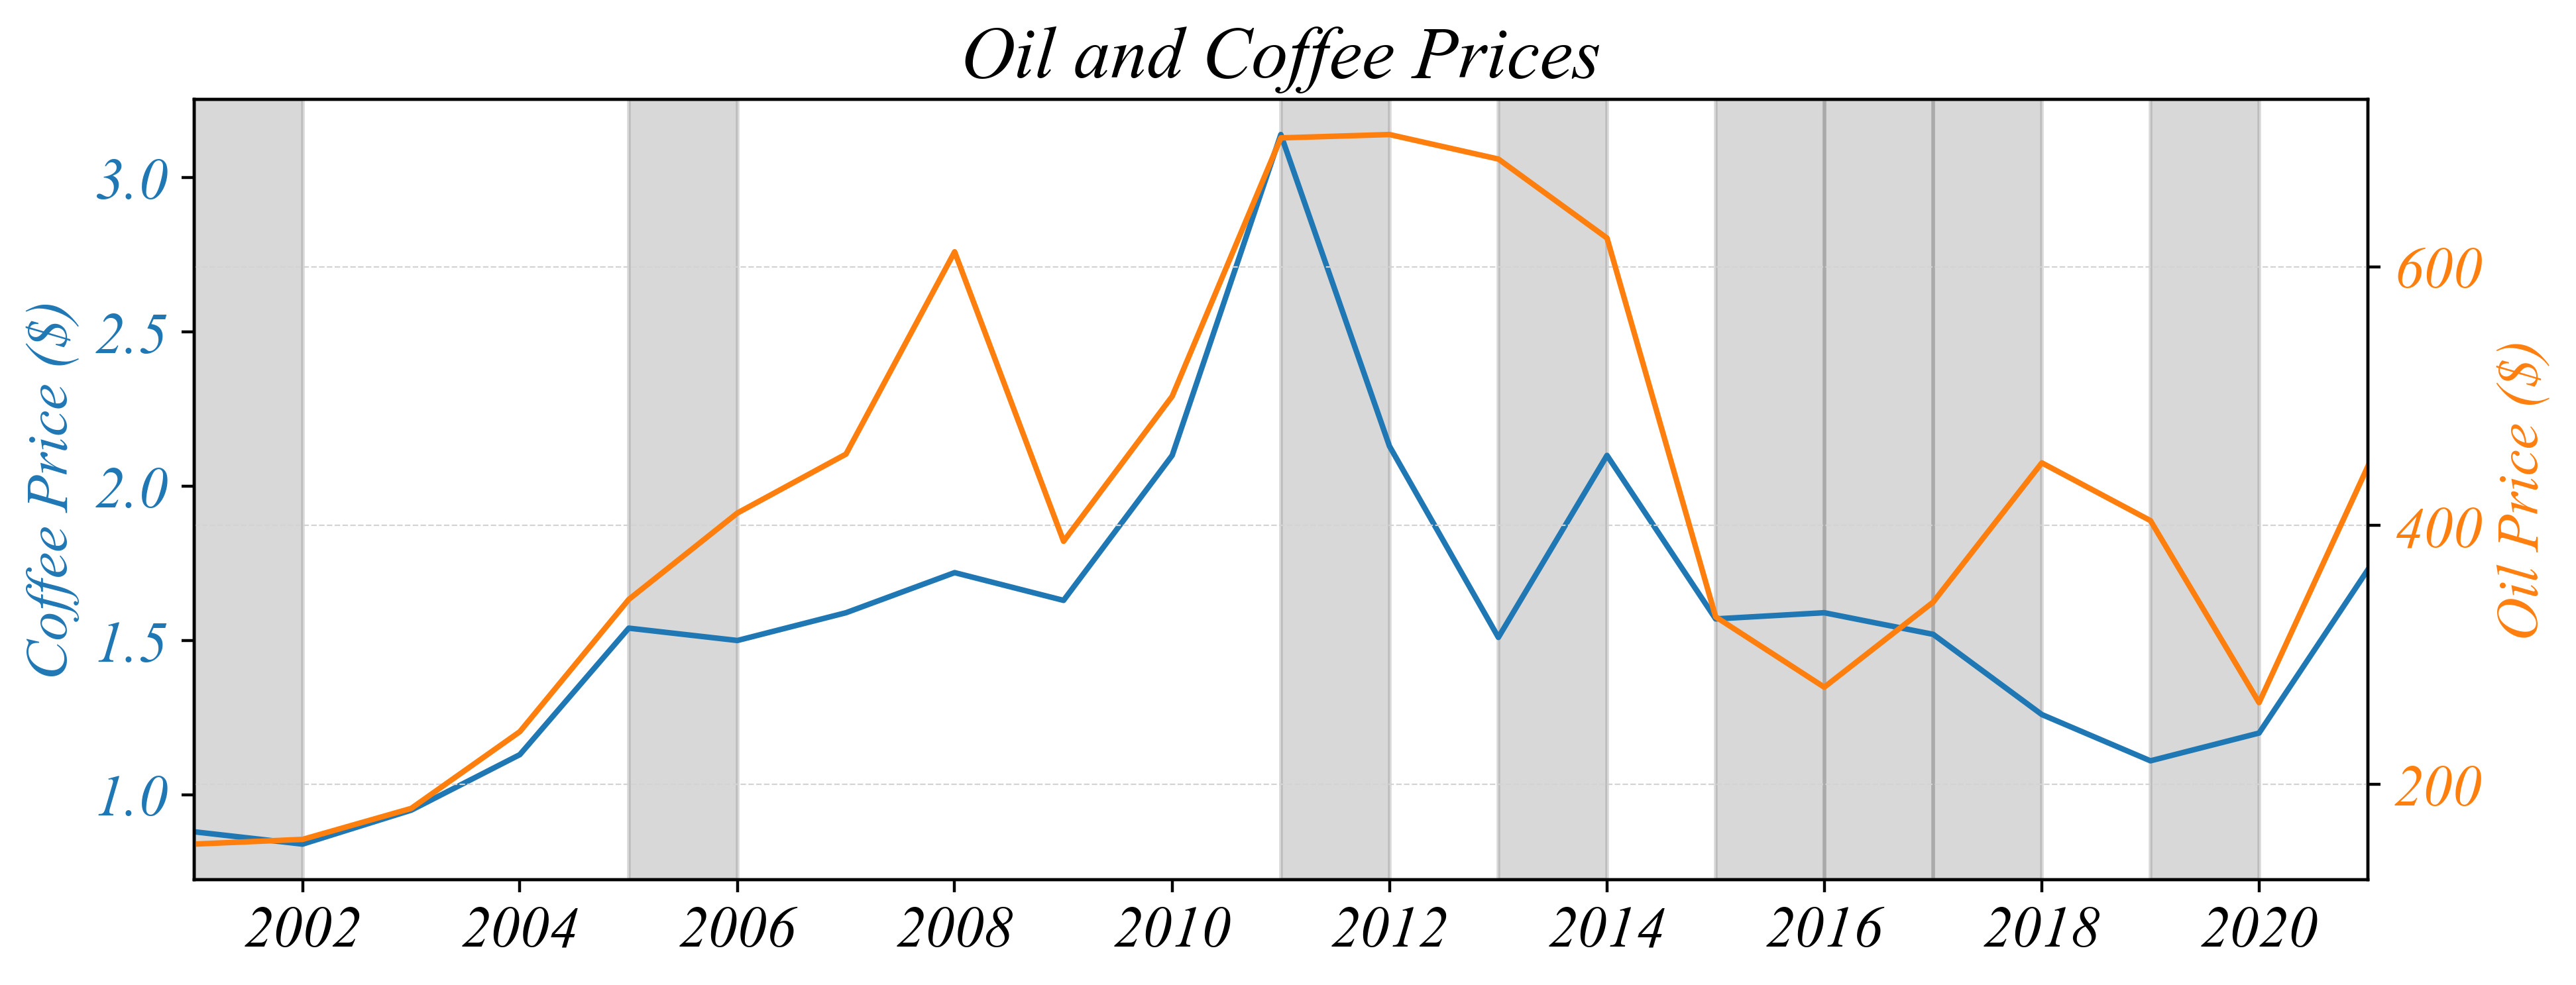

In [18]:
import matplotlib.dates as mdates

# Data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Figure
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Determine where both prices increase or decrease together
# Create a mask for where both prices are increasing or decreasing
increasing = (data['Coffee'].diff() < 0) & (data['Oil'].diff() > 0)
decreasing = (data['Coffee'].diff() > 0) & (data['Oil'].diff() < 0)

# Plot grey bars where both prices increase or decrease
for i in range(1, len(data)):
    if increasing[i] or decreasing[i]:
        ax1.axvspan(data['date_column'].iloc[i-1], data['date_column'].iloc[i], color='grey', alpha=0.3)

# Add title and legend
plt.title('Oil and Coffee Prices')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
fig.tight_layout()  # Adjust layout to prevent overlap

# Save Figure
plt.savefig('i/c_20.png')

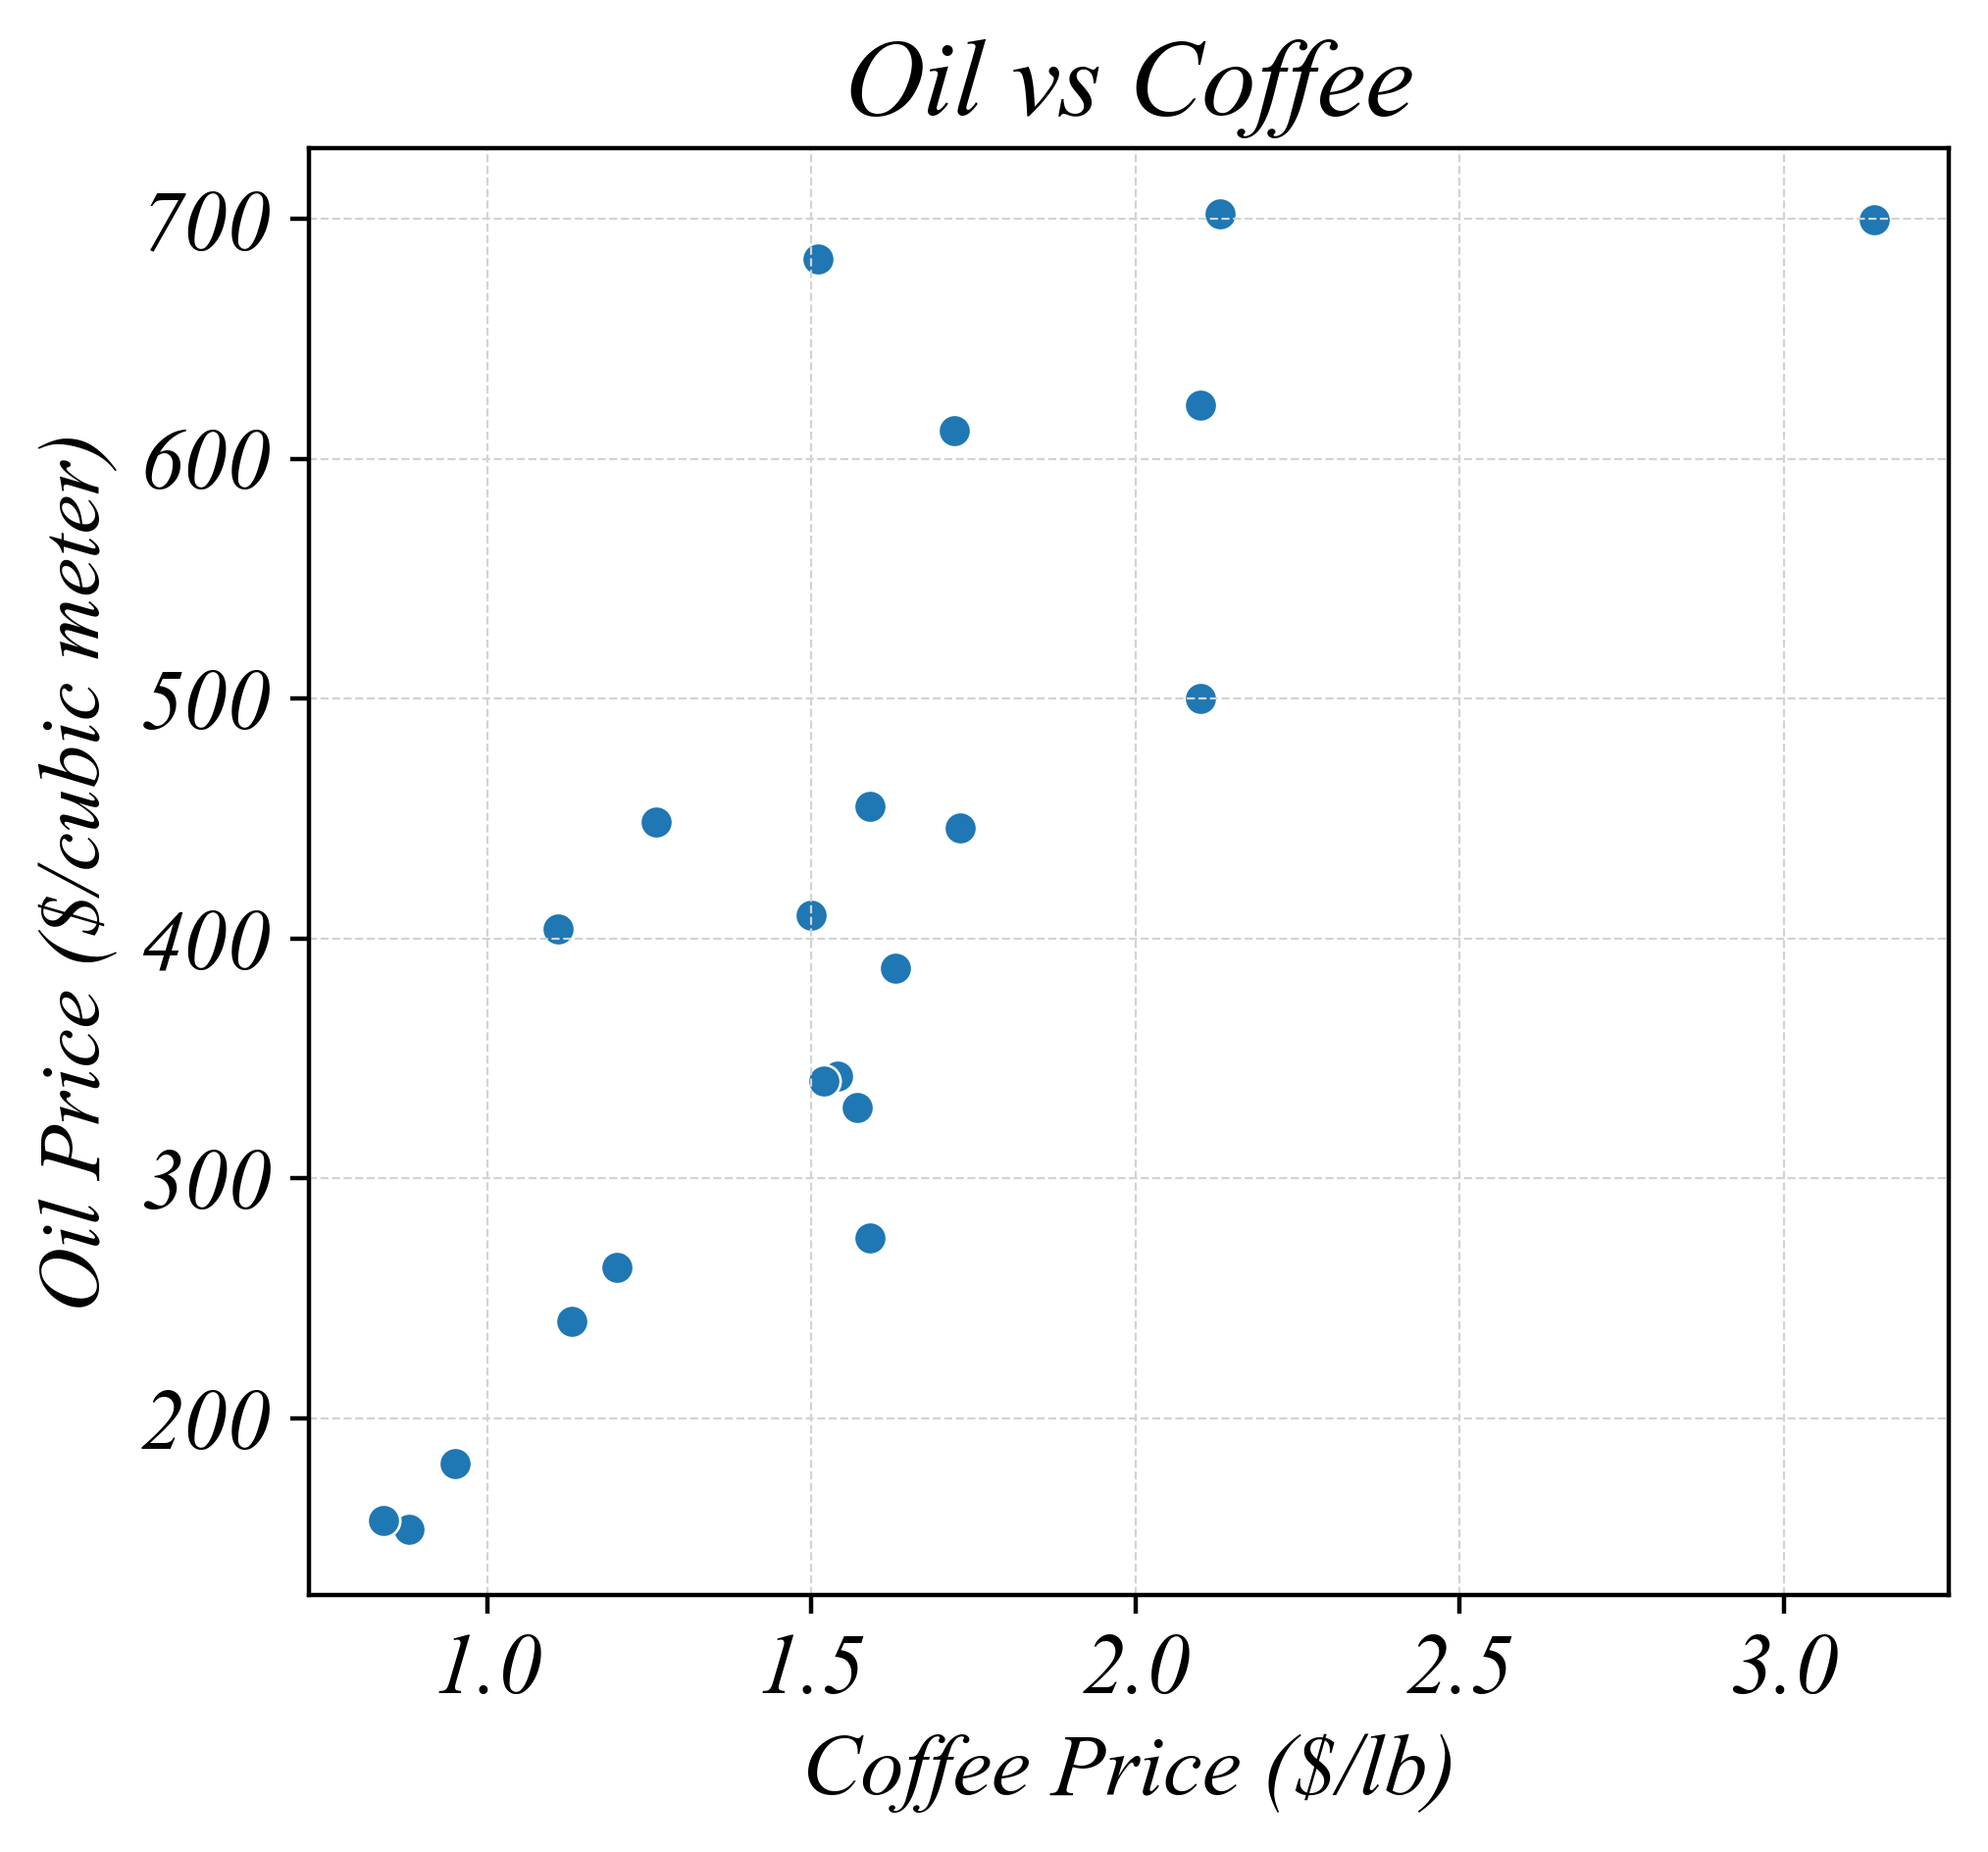

In [21]:
import matplotlib.dates as mdates

data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data, x='Coffee', y='Oil')

# Styling
plt.xlabel('Coffee Price ($/lb)')
plt.ylabel('Oil Price ($/cubic meter)')
plt.title('Oil vs Coffee')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)

plt.tight_layout()

# Save Figure
plt.savefig('i/c_21.png')

## Homework

In [6]:
heath = pd.read_csv('data/Heathrow.txt', sep='\s+', engine='python')
heath.to_csv('data/Heathrow.csv')

In [7]:
hires = pd.read_csv('data/Hires.csv')
hires.Hires = hires.Hires.str.replace(',', '').astype(int)

In [8]:
hires = pd.read_csv('data/Hires.csv')

# Example of cleaning up a column (if needed) - assuming 'Hires' is a column with commas
hires['Hires'] = hires['Hires'].str.replace(',', '').astype(int)

# Convert 'date_column' to datetime format (assuming there's a date column in your dataset)
# If there's no 'date_column' or different date format, adjust accordingly
hires['date_column'] = pd.to_datetime(hires['Day'], format='%m/%d/%y')

# Extract month and year into separate columns
hires['mm'] = hires['date_column'].dt.month
hires['yyyy'] = hires['date_column'].dt.year

# Group by month and year
grouped_hires = hires.groupby(['mm', 'yyyy']).agg({'Hires': 'sum'}).reset_index()

# Load the heath dataset
heath = pd.read_csv('data/Heathrow.csv', index_col=False)

merged_df = pd.merge(grouped_hires, heath, on=['mm', 'yyyy'], how='inner')
merged_df['sun'] = merged_df['sun'].replace(r'[^\d.]', '', regex=True)
merged_df['sun'] = pd.to_numeric(merged_df['sun'], errors='coerce')  # Convert to numeric, setting errors='coerce' will turn invalid parsing into NaN

merged_df.to_csv('data/Bike_Weather.csv')

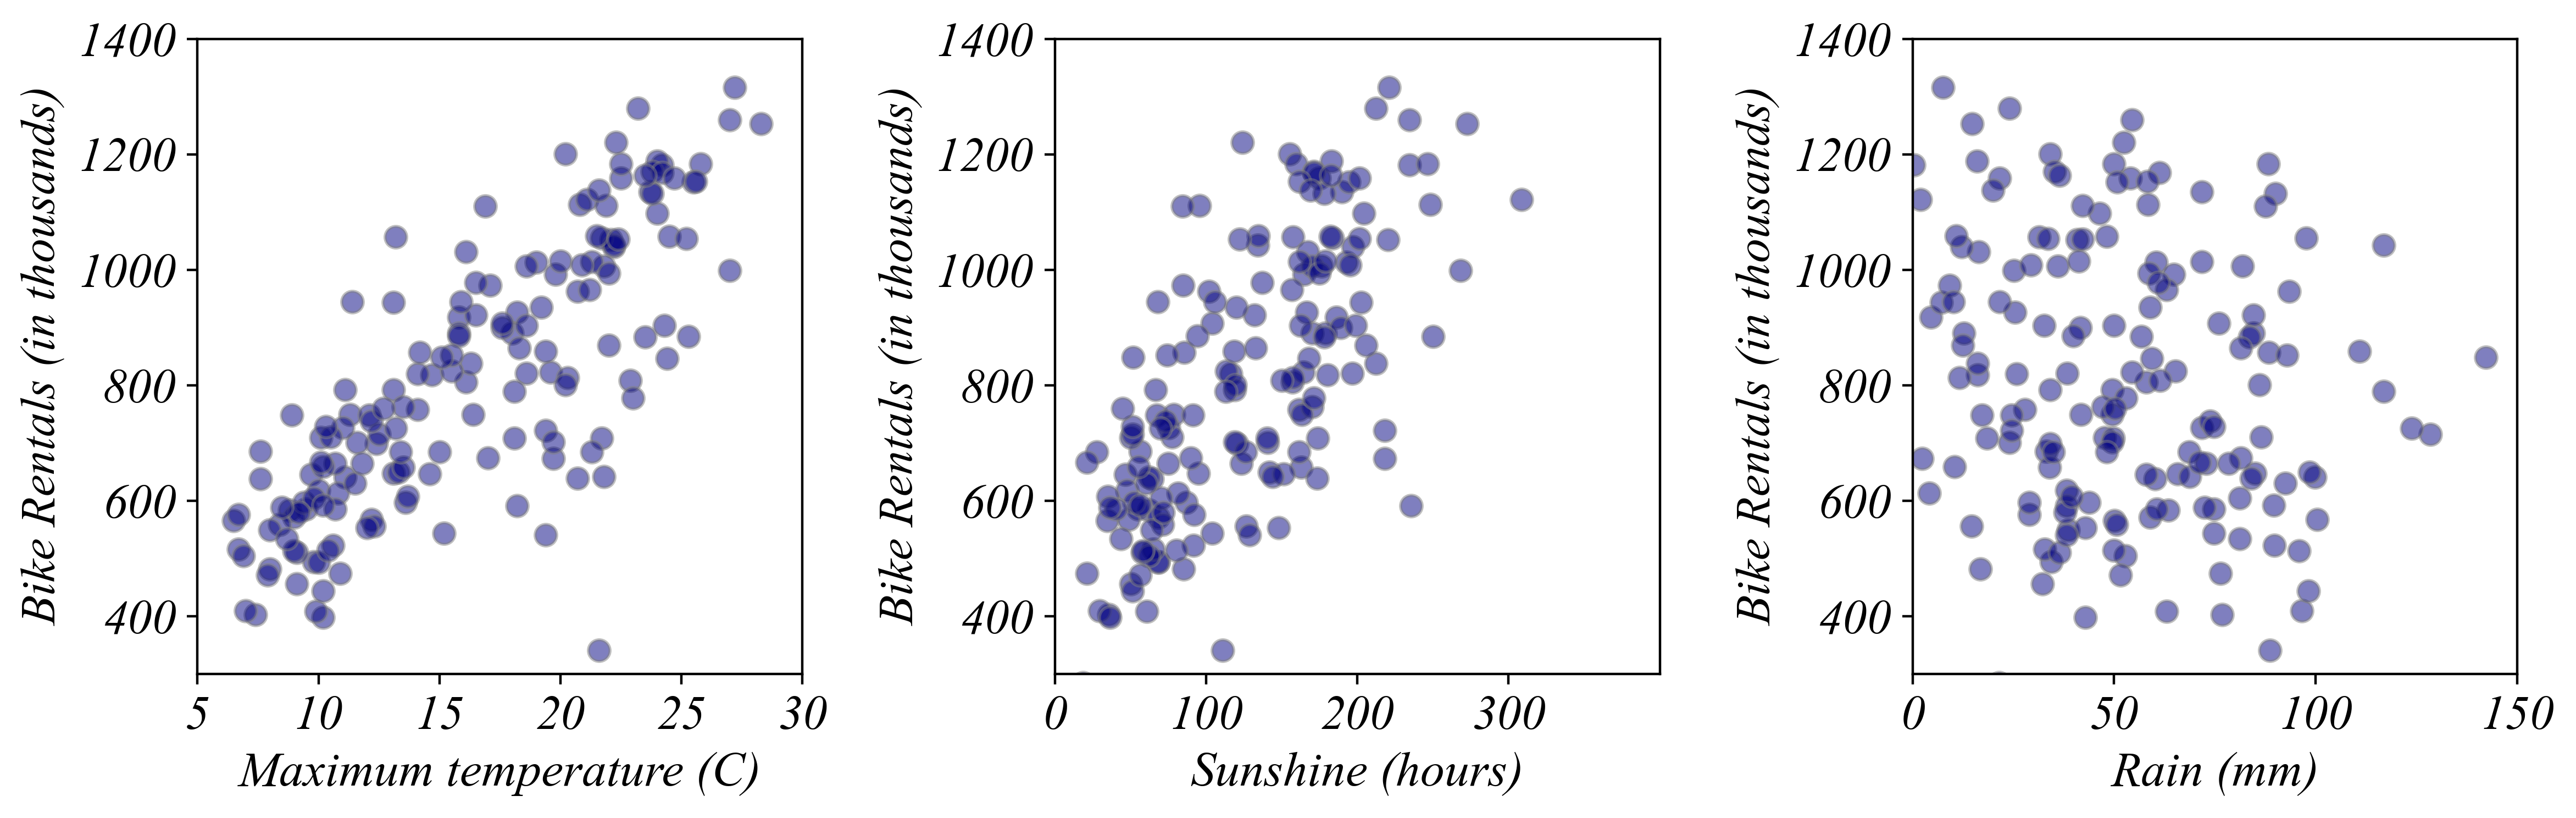

In [9]:
# Load Data
data = pd.read_csv('data/Bike_Weather.csv')

# Figure
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=400, gridspec_kw={'width_ratios': [1,1, 1]})
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.05) # Adjust the space around the subplots

# Left subplot
ax = axs[0]
ax.scatter(data['tmax'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

# Styling
ax.set_xlabel('Maximum temperature (C)')
ax.set_xticks([5,10,15,20,25,30])
ax.set_xlim(5,30)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

# Middle subplot
ax = axs[1]
ax.scatter(data['sun'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

# Styling
ax.set_xlabel('Sunshine (hours)')
ax.set_xticks([0,100,200,300])
ax.set_xlim(0,400)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

# Right subplot
ax = axs[2]
ax.scatter(data['rain'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

# Stlying
ax.set_xlabel('Rain (mm)')
ax.set_xticks([0,50,100,150])
ax.set_xlim(0,150)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

# Save Figure
plt.tight_layout()
plt.savefig('i/hw_01.png', bbox_inches='tight')